In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import pprint

In [ ]:
df = pd.read_csv("../../amazon_reviews_us_Grocery_v1_00.tsv.gz", sep='\t', quoting=3)

In [ ]:
df

In [4]:
bad_words = df.dropna().query('review_body.str.contains("disgusting")', engine="python")
bad_words

marketplace  customer_id       review_id  product_id  product_parent  \
974              US     38112659   RQKFZU0N3QQXR  B00112ILZM        82023917   
1128             US     49505903  R2TXJUQJ8CSP2B  B00I471NQQ       527085959   
1247             US     46357672  R1VZHXA5CBDIPE  B00VR3J33E        67706485   
2453             US     10075607  R3M9XOJ4ZJ1K8U  B000EML7DS       371617349   
2998             US     11948574  R2PR7CG7U7WCM4  B001IZ60S2       210053485   
...             ...          ...             ...         ...             ...   
2400827          US     51867752  R39RIQQ6ZFUFQ3  B0000D15YQ       454960017   
2401062          US     49955677  R179R3Q4TOVAV1  B0002EXSZS       373547282   
2401666          US     48740301  R1O9PP7L30EMUW  B0000T15OG       538995716   
2401789          US     37662499  R2HPD38OJDGHOZ  B0000V40Y6       947136068   
2401830          US     51658353  R3AM75GPWGAZG9  B0000WKXDW       329875455   

                                             product_title product_category  \
974                          Amazing Grass Green Superfood          Grocery   
1128                                 Popchips Potato Chips          Grocery   
1247     Beech-Nut Just Organic Stage 2 Purees - Just A...          Grocery   
2453     Just the Cheese Mini Round Snacks, 0.5-Ounce B...          Grocery   
2998     Matiz Gallego Sardines in Olive Oil, 4.2-Ounce...          Grocery   
...                                                    ...              ...   
2400827                                         Bitter Red          Grocery   
2401062              Bertie Bott's 10 Flavor Discovery Box          Grocery   
2401666          Harry Potter Bertie Bott's Beans Gift Box          Grocery   
2401789    Old Fashioned Candy Sticks Horehound [80CT Box]          Grocery   
2401830                   Sugar Free Cherry Licorice Bites          Grocery   

         star_rating  helpful_votes  total_votes vine verified_purchase  \
974                1              0            1    N                 Y   
1128               1              1            1    N                 Y   
1247               5              0            0    N                 N   
2453               2              0            1    N                 Y   
2998               5              0            0    N                 Y   
...              ...            ...          ...  ...               ...   
2400827            1             10           16    N                 N   
2401062            5             15           16    N                 N   
2401666            5              6            7    N                 N   
2401789            1              0            0    N                 N   
2401830            1             15           16    N                 Y   

                                           review_headline  \
974                                               One Star   
1128     I loved the bbq pop chips but the sea salt and...   
1247                                       Down the hatch!   
2453                            but these were disgusting.   
2998     I think sardines are disgusting, but my husban...   
...                                                    ...   
2400827                                                gah   
2401062                     Every Flavor...good and bad...   
2401666              Amazingly Accurately Flavoured  Beans   
2401789                                              Gross   
2401830                         Tastless &amp; Disgusting!   

                                               review_body review_date  
974      Tastes SO disgusting!!!! Will never purchase a...  2015-08-31  
1128     I loved the bbq pop chips but the sea salt and...  2015-08-31  
1247     I am one of those Moms that likes to know exac...  2015-08-31  
2453                     Sorry, but these were disgusting.  2015-08-31  
2998     Personally, I think sardines are disgusting, b...  2015-08-31  
...           

In [5]:
sentence = df.loc[500,"review_body"]

In [6]:
from nltk.tokenize import word_tokenize
tokens=word_tokenize(sentence)
print(tokens)

['I', 'have', 'been', 'using', 'these', 'for', 'years', 'as', 'my', 'favorite', 'spice', 'right', 'behind', 'lemon', 'pepper', '.', 'I', 'do', "n't", 'cook', 'much', 'of', 'anything', 'without', 'using', 'this', '.', 'Hard', 'to', 'find', 'at', 'local', 'stores.', '?', '?', 'Not', 'sure', 'why', '?']


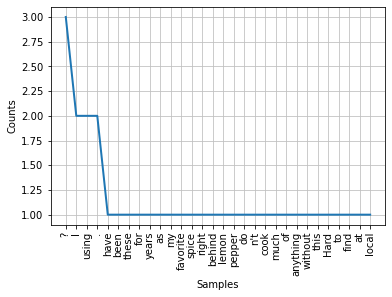

In [7]:
from nltk.probability import FreqDist
fdist = FreqDist(tokens)
fdist.plot(30,cumulative=False)
plt.show()

In [8]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

filtered=[]
for w in tokens:
    if w not in stop_words:
        filtered.append(w)
print("Tokenised Sentence:",tokens, '\n')
print("Filterd Sentence:",filtered)

Tokenised Sentence: ['I', 'have', 'been', 'using', 'these', 'for', 'years', 'as', 'my', 'favorite', 'spice', 'right', 'behind', 'lemon', 'pepper', '.', 'I', 'do', "n't", 'cook', 'much', 'of', 'anything', 'without', 'using', 'this', '.', 'Hard', 'to', 'find', 'at', 'local', 'stores.', '?', '?', 'Not', 'sure', 'why', '?'] 

Filterd Sentence: ['I', 'using', 'years', 'favorite', 'spice', 'right', 'behind', 'lemon', 'pepper', '.', 'I', "n't", 'cook', 'much', 'anything', 'without', 'using', '.', 'Hard', 'find', 'local', 'stores.', '?', '?', 'Not', 'sure', '?']


In [43]:
nums = {}
sentences = df.dropna()[["review_id", "review_body"]].head(100000)
sentences = list(sentences.to_records(index=False))

for (rev_id, sents) in sentences:
    tokens=np.array(word_tokenize(sents))
    num = (tokens == '!').sum()
    nums.update({rev_id: num})

pprint.pprint(nums)
    

{'R1001QVCT92TJG': 0,
 'R1001U0U7SR54P': 0,
 'R1003YBW8G1XCH': 0,
 'R1005VOV8TNHUB': 0,
 'R100C7P6YTBZ3X': 0,
 'R100C9WJSEH7NB': 1,
 'R100F24Y1O4RD6': 0,
 'R100F4WYK7SKCL': 0,
 'R100FV5WNJI97V': 1,
 'R100HFVFH2SL3O': 0,
 'R100I3CY6TBUF1': 0,
 'R100IW3BTCE6B2': 0,
 'R100K1BOKMM8B6': 2,
 'R100MWPE3A4CAR': 0,
 'R100RWRQ1WXFZU': 0,
 'R100TKO2MVAR87': 0,
 'R100Y4KC34YBUN': 2,
 'R100YRQCB2LQYC': 1,
 'R100Z1MR2K6EIO': 0,
 'R100Z47GYY5S1H': 0,
 'R1011OEXDOJ5R4': 2,
 'R1011OHR1FFGEN': 0,
 'R1015DGLXKEFXA': 0,
 'R10190DWJPLY19': 0,
 'R1019APOLA5EPH': 2,
 'R101FO5C3WZX5I': 8,
 'R101K1E7CKPZFB': 1,
 'R101LU2NFP2ET9': 2,
 'R101O2U4419DAE': 0,
 'R101O5XB2IW1LG': 1,
 'R101OH1JM3L08F': 0,
 'R101QD2RDFAWJM': 0,
 'R101TIJRGSLT8L': 0,
 'R101UXBDO91IQ1': 0,
 'R101V1HC6SUG7R': 1,
 'R101WI0J3ODM9P': 6,
 'R101X22QCANB6V': 0,
 'R101ZUVWYD7YBZ': 1,
 'R10212NAMP6S3Y': 1,
 'R10214OW0NLOAH': 1,
 'R1023JW9A8S5IV': 0,
 'R1024NLBLCL7I0': 1,
 'R1026KPLT1KJIS': 0,
 'R1026WDCQAEEFJ': 0,
 'R1028087FMASAY': 0,
 'R1029R2R

 'R11BEH0MCLU9S9': 0,
 'R11BGZ9PYFB3IL': 1,
 'R11BJ7IBX58GX3': 1,
 'R11BJXTUJ41XO8': 2,
 'R11BKVC6RRTDX4': 0,
 'R11BO558VXZK3O': 0,
 'R11BPEVUDBU5YB': 0,
 'R11BPPFX0DEZ3Q': 1,
 'R11BR7NIRZS0AC': 2,
 'R11BVC89PXI961': 0,
 'R11BVHIKIJB0J': 0,
 'R11BWURDTEKDZQ': 0,
 'R11BZRD6IYEIN7': 0,
 'R11C24JAVYV2XP': 5,
 'R11C2W9HMJ8FG1': 1,
 'R11C7C7WMUDGR6': 0,
 'R11C9AH1S1552G': 0,
 'R11CADAQZ8IBNC': 1,
 'R11CBO4LQYFRIS': 0,
 'R11CIOX7PNZMJ9': 0,
 'R11CJJHWMHS0N2': 0,
 'R11CKRWRYYK154': 0,
 'R11CM1CJ1ZFNID': 0,
 'R11CMK8IIVJPJ5': 2,
 'R11CNC2EZHMB17': 0,
 'R11COG6J8SUYC6': 0,
 'R11CRL43I5VM02': 0,
 'R11CSSQ0D6BLP': 0,
 'R11CU3IVV4F2PZ': 0,
 'R11CX3XER7YWGR': 0,
 'R11CX98BLVGN7': 0,
 'R11CXCX2N7X8Z3': 0,
 'R11CXZMMZ8BY2T': 0,
 'R11CZ755KPJPX4': 0,
 'R11D08V6H5AD7W': 4,
 'R11D0UA9NAXD4I': 0,
 'R11D2HQJPAY34V': 0,
 'R11D3NXC2AC213': 1,
 'R11D4W18O535U9': 0,
 'R11D6FI14CQGPY': 1,
 'R11D746PYXMWA0': 0,
 'R11D9D1ZTAWURQ': 0,
 'R11D9OA2U799IA': 0,
 'R11DDY9XVXTIM0': 1,
 'R11DHUO6UPVZJY': 1,
 'R11DIH3VHLK

 'R12H58GY6OKHD7': 0,
 'R12H5KH30WM76': 0,
 'R12H73WIW6U9U4': 0,
 'R12H8X9HTYNB6N': 0,
 'R12HAL0LEWC3IQ': 3,
 'R12HLTK0DMDJUN': 1,
 'R12HMS10ELEVK2': 1,
 'R12HN88E3RAYWU': 0,
 'R12HNEZ2LKV8QJ': 2,
 'R12HPESEQZFUKM': 0,
 'R12HQCI68NODP2': 0,
 'R12HQI2CDDTK8F': 0,
 'R12HS77ZCID4ZW': 0,
 'R12HSEFLMRRZMD': 0,
 'R12HSZMOL7E1N7': 0,
 'R12HYA6DU8M9FG': 0,
 'R12HYVU31H9YAS': 0,
 'R12HYZRMAADKHJ': 0,
 'R12HZN2L9QMR1J': 1,
 'R12I0XWFGS33C6': 1,
 'R12I24LOFI3QK2': 1,
 'R12I4UMM1W2AY7': 0,
 'R12I6N2ZUNVT3M': 1,
 'R12I7BURJ6Y8T5': 1,
 'R12I7CKHL9K6BH': 0,
 'R12IAL5G9B5WLD': 1,
 'R12ICENR4V6UU9': 0,
 'R12II6TILJ822O': 1,
 'R12IIHMVKLGJAG': 0,
 'R12INGS950Q0MK': 0,
 'R12IP8PVDOB7A2': 0,
 'R12IQVZ9ESU36D': 4,
 'R12ISDKN1EX97T': 0,
 'R12ISH6GD7DSO': 0,
 'R12ITBG8SOLMZI': 1,
 'R12IU5N3W00RSH': 3,
 'R12IXKVF1JHQND': 0,
 'R12J1XFFV08C0L': 0,
 'R12J2U6B269729': 0,
 'R12J2VJX6ZSAUW': 1,
 'R12J3ZRUHII9NL': 0,
 'R12J4QBU0V0KQN': 0,
 'R12J4QBYLIONSD': 0,
 'R12JAFW5J55OFB': 0,
 'R12JB3EOIMR9GF': 0,
 'R12JBTOBAK

 'R13QVHZM55Y0KX': 0,
 'R13R0Y80HEHQE8': 0,
 'R13R1E4JJ64DE8': 0,
 'R13R1X28KPOXV': 2,
 'R13R2TL6D1DZSE': 0,
 'R13R3E9PEU0IOC': 0,
 'R13R3YE1NQAQ0R': 0,
 'R13R4OVW0LKRBK': 0,
 'R13R5XHYZOL0WG': 1,
 'R13REJCGJQ50VR': 0,
 'R13RG79Y286K02': 0,
 'R13RH3WSHVTBX2': 10,
 'R13RH794MA1WGS': 0,
 'R13RHBOBO4HZYN': 0,
 'R13RJHS66GMIOG': 0,
 'R13RJM1EYSW7ZR': 1,
 'R13RL6DVNEY6P1': 0,
 'R13RSEZTEY9BLZ': 0,
 'R13RSO7R8XQ3H': 0,
 'R13RUETZ5JS96V': 0,
 'R13RZ8R3JPC0ZG': 0,
 'R13S0ITGA8TK7M': 2,
 'R13S0SC8SZ14LA': 0,
 'R13S3HOOZFX6V5': 0,
 'R13S4R20ZYY4OV': 0,
 'R13S6030MJ32X6': 0,
 'R13S6AD2T1J2Z5': 0,
 'R13S8P0FRLNUNY': 1,
 'R13SE4UREH1D8F': 0,
 'R13SI513VH622': 0,
 'R13SJ5E2MN1DJH': 0,
 'R13SJBWDG2CYGJ': 2,
 'R13SJJM96T40ZM': 1,
 'R13SLLG0JQ6W63': 5,
 'R13SMN4ULBNA8H': 0,
 'R13SOK5JB5D9G9': 0,
 'R13SR3WA11XMTR': 0,
 'R13SRAWJP726TS': 1,
 'R13SUYNGFVK4FA': 1,
 'R13SV50KLXLHIG': 0,
 'R13SWOHESAPRNY': 0,
 'R13SZC6L0YZY76': 0,
 'R13T09DCASGIKG': 0,
 'R13T0G4RI0QW73': 1,
 'R13T0Z37124JLZ': 0,
 'R13T1DQTZI

 'R1539GNKKJCKH5': 2,
 'R1539LZZPKZSCF': 0,
 'R1539RNB5X3VDD': 0,
 'R1539YKWHO4VD7': 1,
 'R153ANF5KN1MF4': 1,
 'R153DC0YGRCFI6': 0,
 'R153F1ABX5PXF2': 0,
 'R153MRQDSP57F1': 1,
 'R153PANXNQU458': 1,
 'R153RDUQXS6XN7': 1,
 'R153SGLKKN0RIS': 2,
 'R153T8GSMT4OA1': 0,
 'R153TPN1UIHM5U': 3,
 'R153UMYKBGVQSW': 0,
 'R153WLSL1NOQ70': 0,
 'R15404MKTE6L2P': 1,
 'R1543RYW0ANBCF': 0,
 'R15447VEI3MXG4': 0,
 'R1544K1LE9FZ1': 0,
 'R154510LZ7MUIN': 0,
 'R154B0T8KJ0XDZ': 0,
 'R154BFXGPLYPOD': 1,
 'R154BHEGKBTQFB': 1,
 'R154BQKV255SMI': 0,
 'R154DK24RJLQR0': 0,
 'R154E3W3EJ9P76': 0,
 'R154FX1XHQO1OX': 0,
 'R154GYFMXGYT22': 0,
 'R154KOYSIVG3V8': 0,
 'R154KWSOPBE4XY': 1,
 'R154MEM3VZNNXB': 0,
 'R154MMQJBM2OAF': 0,
 'R154MTOCLV4E5M': 0,
 'R154NXM834UNLY': 0,
 'R154QP7CWM8AST': 0,
 'R154QPCQNQRS6U': 3,
 'R154S9VP72KP2K': 0,
 'R154UF3ME94CYF': 1,
 'R154UILY7WAIVV': 1,
 'R154V57FPW6NTM': 1,
 'R154W7MJTU2BV8': 0,
 'R154WH72TT6D9M': 1,
 'R154XF3PKVAWLU': 0,
 'R154Y04IXRPQK0': 0,
 'R154ZCUZGA9XZL': 0,
 'R154ZJTGH

 'R16FMNW5KTU8L5': 0,
 'R16FN2TIOM92BL': 0,
 'R16FO697OOPTXR': 0,
 'R16FQEES4L43YR': 0,
 'R16FR6BOO2I18M': 1,
 'R16FSEFDAE89G9': 1,
 'R16FT1THCAPTC1': 1,
 'R16FU54APP3124': 0,
 'R16FVQSLDBCN2N': 3,
 'R16FX35DLKGUD1': 0,
 'R16FYFRLLLEQYQ': 0,
 'R16FZZ865OH78Z': 0,
 'R16G1K7UR1LKO4': 4,
 'R16G2G49WUHLHD': 1,
 'R16G2W3VFLC16M': 0,
 'R16G5WS9U1ZMR0': 6,
 'R16G6V5KYJ65V6': 0,
 'R16G71OMLOG9BG': 6,
 'R16G8S4KQVP5BW': 3,
 'R16GBE0J5X0A7': 1,
 'R16GBOMVST7E8Y': 0,
 'R16GDGM3X1J7GY': 0,
 'R16GE4I6R1RGVG': 0,
 'R16GGGWPYNIZTS': 0,
 'R16GH9GGZT7ZO1': 0,
 'R16GHN79CPDXO4': 0,
 'R16GHYP20FHED0': 2,
 'R16GLCSJF70E6L': 0,
 'R16GOA25TKDR1X': 1,
 'R16GOQOJYS27YF': 0,
 'R16GPTGKC7LD0U': 0,
 'R16GQH1QWHYMUJ': 1,
 'R16GSABKWGRVYD': 0,
 'R16GUWWF50DKTG': 0,
 'R16GVRPF08XDZG': 0,
 'R16GWXRBWOA1CA': 0,
 'R16GX5OI9WDN6U': 0,
 'R16H1NJ6LLR8YH': 1,
 'R16H4J6S1VP6YB': 0,
 'R16H7LRZN3ZMQ3': 0,
 'R16H8C9Z9RG4S5': 0,
 'R16HAM9U2FTCIM': 0,
 'R16HCA08S9KJF5': 1,
 'R16HCQ87EC6CLC': 0,
 'R16HDDKTTV28WP': 0,
 'R16HE2R1E

 'R17OTCISSFFQ7A': 0,
 'R17OU9PY2737KE': 0,
 'R17OWIZHFHX867': 0,
 'R17OXPJ4JVUHV0': 1,
 'R17P0FB4SYP8U0': 6,
 'R17P0WXG5EG7P1': 0,
 'R17P1AQULF8LJP': 0,
 'R17P1AU77JQLF7': 0,
 'R17P29SMOHZWH8': 1,
 'R17P2M6EKC0QLD': 0,
 'R17P2Q36ACUBQ0': 0,
 'R17P492TAQBSK4': 0,
 'R17P7U5BCF4PTR': 0,
 'R17P9BLB08F5JC': 0,
 'R17PAV7ZDX7IFE': 0,
 'R17PD12MYRWPT9': 0,
 'R17PG2271HY0ND': 0,
 'R17PHW9MZLJ0V3': 0,
 'R17PJMVV9JHPVR': 0,
 'R17PORD4SKAQWV': 4,
 'R17PUP4DXCZLR3': 0,
 'R17PVA1RO9WNBU': 0,
 'R17PVFR2BY74AL': 0,
 'R17PVKC2XMD8ES': 0,
 'R17PWOF72MRHTP': 0,
 'R17PXSBC160R44': 0,
 'R17PY18ACNSMYN': 0,
 'R17PZ8NAKZQOTI': 1,
 'R17PZO872UN55K': 0,
 'R17Q0UM0BJ81JS': 0,
 'R17Q10GOPPWVS9': 2,
 'R17Q2VHWVMFWUF': 0,
 'R17Q76AQ4ANDN': 0,
 'R17Q90UYP9IV7Q': 1,
 'R17QEXN58CFC8C': 0,
 'R17QMCDM8YOJ5E': 0,
 'R17QNJAOKPVVP0': 0,
 'R17QOF374DQ7OA': 0,
 'R17QOW1SOMI7P1': 1,
 'R17QPU4BYFBTMN': 1,
 'R17QQBCTDV3WAV': 0,
 'R17QRB76KUEV74': 0,
 'R17QRCCX3BACW4': 0,
 'R17QU8JX4B2YZJ': 1,
 'R17QVGWLYNG3SJ': 0,
 'R17QXOCEK

 'R19061F9L13B29': 0,
 'R190ACYWPLY0J2': 1,
 'R190B1THR33SJG': 0,
 'R190CV1BYG9JCM': 0,
 'R190FXBRDYQ6GZ': 0,
 'R190G683XTBDN0': 0,
 'R190GGTMLGHJQ7': 1,
 'R190HBOKIRUZK4': 2,
 'R190J9BEIHNGL7': 0,
 'R190JGPQ6ZLUX0': 0,
 'R190K8DGFFWQDX': 1,
 'R190N6V7BP02Q6': 0,
 'R190NKGTZTK37P': 0,
 'R190QO1J5YP219': 0,
 'R190RDTJJ6L7TX': 1,
 'R190ROL9L0SWMR': 1,
 'R190TR04YNVYAL': 1,
 'R190U4UVF9HGF9': 0,
 'R190UCKUQUT5YV': 0,
 'R190US15DWWYJU': 0,
 'R190V3G0O08Y8J': 0,
 'R190W9J12T5FNT': 0,
 'R190WBKD69TCB7': 0,
 'R190XJMO674JYH': 0,
 'R190XUC12UQ39I': 0,
 'R190ZHMKR9U21M': 1,
 'R1910OAC5PEGSJ': 0,
 'R1914O4M77GP2M': 1,
 'R19157IDOJL29M': 1,
 'R1915DHJJWHCOI': 1,
 'R1918RUULXQVY1': 1,
 'R19192PI6XVLMA': 0,
 'R191A44CQVHJ94': 0,
 'R191E3GXAU50HZ': 0,
 'R191GUGVCKABSE': 0,
 'R191HN8M10O0RY': 8,
 'R191JZPWMEAM11': 0,
 'R191KKPJXRBXGO': 1,
 'R191LBN16YMDQU': 2,
 'R191R27KHFPLV8': 6,
 'R191SO1LNXLJ85': 2,
 'R191XSVFCZ8Z1R': 0,
 'R191XXG7QWZ71R': 0,
 'R191Z9YU655GGO': 0,
 'R191ZBSFDCP41Q': 0,
 'R1921ALP

 'R1ACO8I5HU82P9': 0,
 'R1ACRJ92ZLQ4QL': 1,
 'R1ACRPHR0YOIBX': 0,
 'R1ACU5A95Z0Q4L': 0,
 'R1ACUNKZA97L9R': 0,
 'R1ACUVYX0PH7R': 0,
 'R1ACWZ218D04XQ': 0,
 'R1ACY8N7ISJP2R': 0,
 'R1ACYYMCM456ML': 0,
 'R1AD0VBNA38WQI': 0,
 'R1AD15BAGEJ5QY': 0,
 'R1AD1V4GB7IEO1': 0,
 'R1AD41V3F30A68': 2,
 'R1AD5GO8GGE4M2': 0,
 'R1AD621XUN997Y': 0,
 'R1AD8QUH5RZVRQ': 0,
 'R1AD9IIUBWQXHT': 0,
 'R1ADD8FJ7CTCDM': 0,
 'R1ADE6DFYZ8WCO': 0,
 'R1ADHI6RWMI9RS': 1,
 'R1ADKFL4PQE2R7': 0,
 'R1ADLRQNYQ5KGY': 0,
 'R1ADMGQTNWOKPF': 1,
 'R1ADMW7B4RR36L': 0,
 'R1ADOOOUKV69OY': 1,
 'R1ADOUM7EG5Q8L': 0,
 'R1ADSC1WNYZQ0A': 1,
 'R1ADW19LEDY1QD': 1,
 'R1ADX20ZULIVFU': 0,
 'R1AE1EO9KLS9FA': 1,
 'R1AE1M5CORI43M': 1,
 'R1AE3E17KUCTR5': 0,
 'R1AE4FZ0CZZDH8': 1,
 'R1AE8J4YAVLL9I': 1,
 'R1AE9RNSDY2M4S': 3,
 'R1AEB58I0EO7G9': 1,
 'R1AECG4XVODYV9': 1,
 'R1AEF8HPFYPA': 0,
 'R1AEJUR84BRKYO': 0,
 'R1AEJXI2CP839N': 1,
 'R1AEK0K1Q6MAUQ': 0,
 'R1AEK682PSFVO8': 0,
 'R1AEL13BIZFY6F': 1,
 'R1AELNH7TFOOQI': 0,
 'R1AEOT6EV7EL4N': 2,
 'R1AEQ62Z1QS

 'R1BVUUW6V265WM': 0,
 'R1BVWIEAMKNS99': 0,
 'R1BW0ENJ63S3O0': 0,
 'R1BW2EQ2WBY6H8': 0,
 'R1BWBGZMH28B7Q': 0,
 'R1BWBNQTXZ12GB': 2,
 'R1BWFH5UESXGIT': 0,
 'R1BWFOESV4YS5V': 2,
 'R1BWKVI4RAYD3R': 0,
 'R1BWLH0CVKRXEF': 0,
 'R1BWPNZL38ZZL': 4,
 'R1BWQCODA18UUH': 1,
 'R1BWSV2X04J5TW': 0,
 'R1BWXTBQ06IEUT': 1,
 'R1BWY5QNBEA9JK': 0,
 'R1BX4H7OP2UJIM': 0,
 'R1BX4KEHXTQ6FN': 0,
 'R1BX9DQY7AH3TU': 1,
 'R1BXCE53SKVOWR': 3,
 'R1BXE47DFF5D3Y': 0,
 'R1BXIOF9JMKC4': 0,
 'R1BXL4P0UA8C88': 1,
 'R1BXLH9PHUAYJU': 0,
 'R1BXMP172CSP6J': 3,
 'R1BXMWU393YG35': 2,
 'R1BXNHUFHKN4QS': 0,
 'R1BXRKFYENBQNJ': 0,
 'R1BXS1JQ2HHVQR': 0,
 'R1BXSUVHSMNAL5': 0,
 'R1BXVXEDWT0D4J': 0,
 'R1BXWODV6CJ355': 0,
 'R1BXX8J9PNB5JN': 0,
 'R1BY4YLCZRVDCF': 0,
 'R1BY5PEWJB3ZPS': 0,
 'R1BY7377DFWYIQ': 4,
 'R1BY99F7A514WT': 0,
 'R1BYAHUNTE3PVG': 2,
 'R1BYBHHN2ICSL0': 0,
 'R1BYCJ5IQPFPB8': 0,
 'R1BYER49UBAQD1': 0,
 'R1BYF7K9L147SZ': 0,
 'R1BYIFNJFLV2CV': 0,
 'R1BYKEF24VZI27': 0,
 'R1BYNA4GV9PZHI': 1,
 'R1BYNISYF21H4H': 0,
 'R1BYWPXXDG

 'R1D1V2F7ZW6LMD': 0,
 'R1D1W9AJE3990M': 2,
 'R1D1XJV8AZNZ2D': 3,
 'R1D234KGR5AH7I': 0,
 'R1D2A7B95O1EX0': 0,
 'R1D2BAX4B8S07M': 0,
 'R1D2EPB19A2V70': 0,
 'R1D2F46Z57VXT7': 0,
 'R1D2FJLZ1MMM7': 5,
 'R1D2FVWMY15KGW': 0,
 'R1D2FXZZKDBJG6': 5,
 'R1D2JU68DLYASE': 0,
 'R1D2M69PAPFKEO': 0,
 'R1D2RVDH027GED': 1,
 'R1D2S945ZTH8XE': 0,
 'R1D2T5Y2W4CI7A': 0,
 'R1D2UGDWKN0FJY': 0,
 'R1D2VV5G5D7YDP': 0,
 'R1D33HIL1MD9Q2': 0,
 'R1D35YFMQNNQ9': 2,
 'R1D372Z8S2LW1Q': 0,
 'R1D37H7A1ACFLR': 0,
 'R1D395OQBLT4YW': 1,
 'R1D3CE2LX7JB0F': 0,
 'R1D3DDY1MN98DU': 1,
 'R1D3EG6T396Z9W': 0,
 'R1D3GPTD6DXWDN': 0,
 'R1D3HFU11TCOYO': 0,
 'R1D3N6WXBU7XAK': 0,
 'R1D3NUFYUKLZDX': 0,
 'R1D3PB5HJWBCUE': 0,
 'R1D3SC998KY6RG': 0,
 'R1D3SM10FM9QK8': 0,
 'R1D3W76IIBUJZG': 0,
 'R1D3ZF6IOT767J': 0,
 'R1D40CD46M80VB': 0,
 'R1D41NS080HESQ': 1,
 'R1D422CN7EQAPI': 4,
 'R1D451HW3E73NG': 0,
 'R1D47W1XOTOGQR': 0,
 'R1D4ASIP884GBM': 0,
 'R1D4C46Z5B8HV4': 0,
 'R1D4CCIZPBAWLX': 1,
 'R1D4F7IUW7PL7Y': 3,
 'R1D4FZR6U1JXYM': 0,
 'R1D4G8TSNI

 'R1EDKJSLGGEQMJ': 0,
 'R1EDL6BC1LZ3CP': 0,
 'R1EDNXB37DCXJC': 1,
 'R1EDOFZQG9954Y': 0,
 'R1EDRQ22L653D7': 0,
 'R1EDULZ10GLJPQ': 1,
 'R1EDW1BXCJ23M': 0,
 'R1EDWAA483H96G': 0,
 'R1EDZ5B51ZS3XP': 0,
 'R1EE31H9XW3XI4': 0,
 'R1EE4JBHO0TUGQ': 1,
 'R1EE4PPWHIANAO': 3,
 'R1EE6CG0UT5SB2': 0,
 'R1EE6WN7EZYDIX': 0,
 'R1EE7UYCKRUX6Q': 0,
 'R1EE9OH9RWUUVR': 1,
 'R1EEATR2CMBHTV': 0,
 'R1EEAVRLJ1GQN1': 0,
 'R1EEAXIBFBK28S': 1,
 'R1EEB6HQ3UKTUF': 0,
 'R1EEBGELQ8X4IA': 0,
 'R1EECLE0R7A3Z3': 0,
 'R1EEDA46A3TOUN': 0,
 'R1EEDP2BPSEAB0': 0,
 'R1EEG0BXTJZ0AM': 0,
 'R1EEGHL5T6VI24': 1,
 'R1EEI83784N0ZK': 0,
 'R1EEKXI7735XUH': 1,
 'R1EEQVZOT8IU0U': 0,
 'R1EESTHK538U6G': 0,
 'R1EEUCLR669C7Q': 0,
 'R1EEXMN1W98UJ3': 0,
 'R1EEY7XTUWS15O': 0,
 'R1EF0TYNKQLPN4': 0,
 'R1EF2AYJETO27K': 2,
 'R1EF2F0X0KC23B': 1,
 'R1EF37KDM5FE1T': 1,
 'R1EF6I91YZ4WFW': 0,
 'R1EF7XZHJ5Z9ZP': 0,
 'R1EF8QL5ONXOLN': 0,
 'R1EF97AP0QYYLR': 0,
 'R1EF9QEHEO4YN6': 0,
 'R1EFGFW8GV8QXV': 4,
 'R1EFI77NEP4MEV': 0,
 'R1EFLP8YQBTXID': 0,
 'R1EFM4Y6R

 'R1FQ0BJP788FF4': 0,
 'R1FQ1RV8MRT0OD': 0,
 'R1FQ73TJDB7XL6': 3,
 'R1FQ7NVTIKQC5B': 0,
 'R1FQ8MYNRRHZUX': 0,
 'R1FQAYDUV1PA5D': 1,
 'R1FQDVWN3VL6QH': 0,
 'R1FQHYML6JE84A': 2,
 'R1FQKG874GYYC1': 2,
 'R1FQLR880RNT95': 2,
 'R1FQMPUCJC13DA': 0,
 'R1FQQSF3HQXCOY': 0,
 'R1FQROFDX200H4': 0,
 'R1FQSPWAHFOUIH': 4,
 'R1FQTTBBE7HYS1': 0,
 'R1FQW0NR903E1U': 0,
 'R1FQWQ46ONEJUZ': 0,
 'R1FQX7L9HW0VFH': 0,
 'R1FR016JGOKZ0T': 0,
 'R1FR13R6ONDXJ6': 0,
 'R1FR27H0XHBCA2': 6,
 'R1FR3KSR25OE7Y': 0,
 'R1FR5UTOCL2D5B': 0,
 'R1FR75GTWBI5AY': 0,
 'R1FR7JHDVL6O7Y': 0,
 'R1FRB8ZW42RD0U': 2,
 'R1FRDE0OIA546B': 0,
 'R1FRE9VK7KB3OC': 1,
 'R1FREWFXQHXAT9': 1,
 'R1FRGAGNRJ0SOK': 1,
 'R1FRHK1R3016N2': 1,
 'R1FRHVUAG8IJBE': 0,
 'R1FRHZKVQNSGA': 0,
 'R1FRJK4MMGSDMZ': 1,
 'R1FRJN8WN7BUDC': 1,
 'R1FRM2SC72SH1R': 1,
 'R1FRMRBSF7PO1Z': 1,
 'R1FRNQ23CYJ5L2': 0,
 'R1FRNRX5KRDPQZ': 1,
 'R1FRNWYEPA7MJL': 1,
 'R1FRUFU4JGPEQ3': 0,
 'R1FRXS9H1URZH6': 0,
 'R1FRYZBOIEYQ2C': 2,
 'R1FS02EDJIX23A': 0,
 'R1FS0PW4NORLG5': 1,
 'R1FS0RIWN

 'R1GWMJJOQ34KDE': 1,
 'R1GWQ900YIVO4G': 0,
 'R1GWQEIGYXUBZP': 0,
 'R1GWXCHYJRO06C': 0,
 'R1GWZUARUS9EML': 0,
 'R1GX248FY0MYK1': 0,
 'R1GX282CRC6GM9': 4,
 'R1GX3Q3ECXNCW1': 0,
 'R1GX4FJNW09JXH': 0,
 'R1GX6MTZ46AARE': 0,
 'R1GX77ZKWAWDDT': 0,
 'R1GXA0L6RVDOER': 0,
 'R1GXA9TPNCW1F5': 0,
 'R1GXAICIH8DQH6': 0,
 'R1GXB3ALMUVPEF': 0,
 'R1GXC0AVWSLZE0': 0,
 'R1GXDVZD2MCJTA': 0,
 'R1GXE5JBW41NRE': 0,
 'R1GXFLHQR46C4L': 0,
 'R1GXG227U06KH4': 0,
 'R1GXGZWCLF3EDF': 1,
 'R1GXH4EED2MGO4': 1,
 'R1GXH5RUJ8U9J2': 2,
 'R1GXIZEOOYNT9B': 0,
 'R1GXLWHZYBV16B': 1,
 'R1GXMQXWISY5HS': 0,
 'R1GXPK10KSYBB': 0,
 'R1GXPNHEGEJIE': 0,
 'R1GXPWRH6O6KFP': 1,
 'R1GXWO88ED4QK2': 0,
 'R1GXYM2FVMT30V': 4,
 'R1GXZFDG3DXST6': 1,
 'R1GY4NEN05725F': 3,
 'R1GY9S8AOLOC4V': 6,
 'R1GYB6LRR2VJW8': 2,
 'R1GYC8MQ5IZL0M': 1,
 'R1GYCA62O10MVY': 0,
 'R1GYDS7CIXXAW7': 0,
 'R1GYI7DT1GYRNS': 0,
 'R1GYIZ3EO20GO8': 0,
 'R1GYLD3IJU02RF': 0,
 'R1GYMTPKN2QHBT': 5,
 'R1GYNPOQNPQ1E8': 0,
 'R1GYO082B5ACA0': 2,
 'R1GYO0ZJQH8ZWB': 0,
 'R1GYORU6C9

 'R1I1TZYZTSUHSN': 0,
 'R1I1XM1KXSENEH': 0,
 'R1I1ZF26QAIN7Y': 0,
 'R1I23UA2W6RZYP': 0,
 'R1I27C87DT0EM2': 1,
 'R1I285RP6U7CEM': 0,
 'R1I28F1BIIC09A': 0,
 'R1I28QQYI6ODK': 0,
 'R1I2A4BX1U8A26': 0,
 'R1I2AS8219NK8Q': 1,
 'R1I2DRDHRHZE4J': 2,
 'R1I2EY62HNSHOS': 0,
 'R1I2FAM69ECGEH': 0,
 'R1I2JIV14PW1FU': 0,
 'R1I2KUCPNZT58L': 1,
 'R1I2L8908G00AL': 0,
 'R1I2MCVVOQ9X7Y': 0,
 'R1I2NE14M52WNO': 0,
 'R1I2NU02TEI4S2': 0,
 'R1I2P7TOAY8JIK': 1,
 'R1I2PJEXIXR9U1': 2,
 'R1I2RO8CHR5H31': 0,
 'R1I2U7775C9JPT': 6,
 'R1I2WBY5G0DYNK': 1,
 'R1I2ZPN4MQCOKF': 0,
 'R1I2ZPZ85OTUEO': 1,
 'R1I3010AWKR8NZ': 0,
 'R1I32MV6J1M71P': 4,
 'R1I32XK40T0GW6': 1,
 'R1I34OP8532DDM': 0,
 'R1I36XTKEZZ2NE': 1,
 'R1I37J6HF7VD0J': 0,
 'R1I38UW00539SG': 0,
 'R1I3B714JWM79C': 0,
 'R1I3H40EPT8RAG': 1,
 'R1I3I3DT8CZZN': 0,
 'R1I3NCSUVU17X': 1,
 'R1I3OGLBZYN59A': 1,
 'R1I3PG2RZDJJPV': 0,
 'R1I3SQJEICP1EF': 0,
 'R1I3TQ3YQOKZ60': 0,
 'R1I41BFAV4GE1V': 0,
 'R1I43BFYRAZCVX': 0,
 'R1I47NGMLJOCAV': 1,
 'R1I4AA38QWCIXE': 0,
 'R1I4ALJVLUS

 'R1JEY76EQW1MB3': 7,
 'R1JF18IEVEBSVK': 0,
 'R1JF1KA401BHXD': 0,
 'R1JF1MQXKBIDNC': 0,
 'R1JF4ADKGO6LKF': 0,
 'R1JF5GP2J3QLS5': 0,
 'R1JF67XSHPRJ67': 1,
 'R1JF7R1Z1TG5UT': 0,
 'R1JF7Z0THI4ZCO': 0,
 'R1JF7Z4RKUQ1WA': 4,
 'R1JFAFD5V1U549': 0,
 'R1JFD7KXDJYJ3I': 1,
 'R1JFE4G7Z8FSHZ': 0,
 'R1JFETU66WNTR1': 1,
 'R1JFHY0T9NV0DW': 0,
 'R1JFJMUBV1GNNY': 0,
 'R1JFQWDT8LX9D7': 1,
 'R1JFRSX8OM366G': 0,
 'R1JFVYH5B71DYD': 2,
 'R1JFWRJDSG7NTI': 0,
 'R1JFXAQHLZX4PM': 0,
 'R1JFY2N9FQS8HE': 0,
 'R1JG1G88HX1WHU': 0,
 'R1JG5EUMY1TXS4': 0,
 'R1JG5ND5GW0X59': 0,
 'R1JG7NN06R814J': 0,
 'R1JG8CMR67W5PP': 0,
 'R1JG9A9D88SE44': 0,
 'R1JG9XSTEM7TX4': 0,
 'R1JGBHJY2I3B0O': 1,
 'R1JGDC9M59DA02': 0,
 'R1JGFBIG4GROAF': 1,
 'R1JGFL11A6LJSH': 0,
 'R1JGFPXN6MR3O7': 0,
 'R1JGG4GGYCFEOQ': 0,
 'R1JGM9R69V8VE2': 2,
 'R1JGNSC6LVK3LC': 0,
 'R1JGQFQYZV1ULQ': 1,
 'R1JGSJHD3G1BFA': 0,
 'R1JGT6HA6S4ABV': 3,
 'R1JGU76OCEZHHL': 0,
 'R1JGX4D75C7E3Y': 1,
 'R1JGYUOVN2AHIK': 3,
 'R1JGZU9WJH3JTJ': 0,
 'R1JH11HWTVXVRE': 0,
 'R1JH2X6X

 'R1KTV2WFA9YSM1': 0,
 'R1KTVJFDVWPJPL': 0,
 'R1KTXD2CN0SZOY': 3,
 'R1KU07A8GWCQSU': 3,
 'R1KU3Y501E0QM7': 1,
 'R1KU4LAUHIME6I': 1,
 'R1KU56NZM26HEP': 0,
 'R1KU67NA5DT5P5': 0,
 'R1KU6RDZ1CN68P': 0,
 'R1KU8WCTSXYRR0': 0,
 'R1KU9Z9D6FAMH6': 1,
 'R1KUFL71PCF7SH': 0,
 'R1KUG5OABVG7HU': 0,
 'R1KUIZL6B4GTS1': 2,
 'R1KUJ0SACCS2PC': 0,
 'R1KUNSGY7NF3PB': 0,
 'R1KUNWDT2EDL67': 3,
 'R1KUP6ATFATFLY': 1,
 'R1KUP6B2RXWW7W': 0,
 'R1KUQEE7IY6WZZ': 1,
 'R1KURE80SK8V5S': 0,
 'R1KUSN6SMMK54U': 0,
 'R1KUSQWN4P3RUK': 0,
 'R1KUYR1UHBRDAD': 0,
 'R1KV07YU13ZXBQ': 0,
 'R1KV3ZMZP12SB5': 1,
 'R1KV456MMPBHH2': 0,
 'R1KV4YY7WQY129': 3,
 'R1KV6D8RIMIKQZ': 0,
 'R1KV93B0KF3F1Z': 0,
 'R1KV95H6UQTZHY': 0,
 'R1KV9Y4WF1T0GF': 2,
 'R1KVEJ1FEMW3TK': 0,
 'R1KVINO21CQL7H': 0,
 'R1KVJ757NX01U3': 0,
 'R1KVJ917AP8PPP': 4,
 'R1KVLCI13IR7VP': 1,
 'R1KVP04K2WZBSV': 0,
 'R1KVQAS4V3MGTS': 0,
 'R1KVSIKWR38OZY': 0,
 'R1KVTJPKMRGVCX': 2,
 'R1KVW44NTPJMO9': 0,
 'R1KW0VJIPHE7GU': 1,
 'R1KW4317GSON3G': 0,
 'R1KW4P9VI5O6V5': 3,
 'R1KW84FC

 'R1M80TUZRTU3KO': 0,
 'R1M80XADUZZ46S': 0,
 'R1M81AJR6WYQ78': 0,
 'R1M81LA64ABAN7': 1,
 'R1M89P2B1WN5HK': 3,
 'R1M8B0TCA5RNJ7': 2,
 'R1M8EZVYQP7FME': 0,
 'R1M8G6DTJBXBS8': 0,
 'R1M8G9Y5YE9J1V': 0,
 'R1M8GZQROMXQCO': 1,
 'R1M8H0JMVXKUJ6': 0,
 'R1M8HAQAUHJ2LC': 0,
 'R1M8HWFSMXBR5Z': 1,
 'R1M8ILC25WA733': 0,
 'R1M8KW5UPTT96A': 3,
 'R1M8LELWAN7YAF': 1,
 'R1M8MNKEO2JGV1': 1,
 'R1M8MZWAHN8NSV': 1,
 'R1M8O6CU90T335': 0,
 'R1M8OF9BPFK5QI': 0,
 'R1M8QELU1BR6NV': 0,
 'R1M8QNV55EYV84': 0,
 'R1M8RQJ7ZUWIXV': 0,
 'R1M8TYEX7AIEBY': 0,
 'R1M8VO5JGU4ROC': 0,
 'R1M8X1C31BGRYB': 0,
 'R1M8Y8BJ2S1QJB': 2,
 'R1M8YE1IDRDB0B': 0,
 'R1M91CUAUHAHMR': 0,
 'R1M93IRG69ZI42': 2,
 'R1M97IYZAYE1W8': 0,
 'R1M98N10C0MH4N': 0,
 'R1M990WG8WHZHC': 0,
 'R1M9FEJVTAOIK6': 0,
 'R1M9GO4SWIQ3W0': 0,
 'R1M9GXW50LTOT': 0,
 'R1M9HV928VEMRY': 0,
 'R1M9JF4QTV1PBR': 1,
 'R1M9N8H9NJ1U18': 1,
 'R1M9NG2FV7DSNS': 0,
 'R1M9NL9GK4YB84': 0,
 'R1M9OC24YIPHR6': 5,
 'R1M9PCT3D9E17R': 0,
 'R1M9PXNUREQR71': 0,
 'R1M9SRQ5RK0VFM': 0,
 'R1M9UR834

 'R1NLJRDPLPAX51': 0,
 'R1NLMMGEQ2BM46': 3,
 'R1NLNISUEHW6OT': 0,
 'R1NLNK0NPZVA71': 0,
 'R1NLOR9PYPJ7N5': 0,
 'R1NLU3GXTH7TD3': 1,
 'R1NLU42O1D2KBN': 0,
 'R1NLU74OCUON5M': 1,
 'R1NLUG2HDD2AK3': 2,
 'R1NLWM4X7EY5R': 5,
 'R1NLX8BKRTBJJG': 3,
 'R1NM0L7W7E2TJV': 1,
 'R1NM1FE5HXJBKM': 0,
 'R1NM2OTOOAMU1Q': 1,
 'R1NM322JB7ZN3Q': 0,
 'R1NM3AWFBQFJCD': 0,
 'R1NM4TVPRBT940': 0,
 'R1NM5V1CI3FL6U': 0,
 'R1NM6QM25ZNKWY': 0,
 'R1NMA4ALV6RE5Z': 0,
 'R1NMCBHB1OG94Z': 0,
 'R1NMHX9FGD8OUK': 0,
 'R1NMJQ4E9G1KOZ': 2,
 'R1NMJVYVT4GS0M': 0,
 'R1NMK3DDIMFQRZ': 0,
 'R1NMKF8NQZRH7X': 4,
 'R1NMML791XP9KL': 1,
 'R1NMO0YXHNV2RU': 0,
 'R1NMO4P811G5HJ': 1,
 'R1NMOKRXE5Q0D2': 0,
 'R1NMOYLOJZXFKM': 0,
 'R1NMTQDL2Q934P': 0,
 'R1NMU2VE0ZB5FZ': 0,
 'R1NMU47BS9F48B': 0,
 'R1NMV0EV7DLFSE': 0,
 'R1NMVJ35WQ9QM7': 0,
 'R1NMVP7XMOXF1K': 0,
 'R1NMZ5H3NXFKFD': 0,
 'R1NN0EK25O1HUU': 1,
 'R1NN0IZ6Q6A08G': 0,
 'R1NN2VXUX1L9Q4': 0,
 'R1NN4IAKY2G7NX': 1,
 'R1NN8QW3025QE9': 0,
 'R1NNGLQLI2GSH': 0,
 'R1NNH9EON69FKS': 0,
 'R1NNHMJOEJ

 'R1OL8UT52JH3R8': 0,
 'R1OL9XL43YEFE0': 0,
 'R1OLD30FK360ZP': 0,
 'R1OLD90YNMPKQI': 0,
 'R1OLDU692N5D2V': 0,
 'R1OLHEOU89HBBO': 0,
 'R1OLHUQVE3J2VF': 0,
 'R1OLJCZSGEP3QO': 1,
 'R1OLKS2X0ZEOB2': 5,
 'R1OLQLG4ZYSEG7': 0,
 'R1OLR5Z660QDA0': 0,
 'R1OLRHZP1PMUY0': 0,
 'R1OLS0AZS0RICI': 0,
 'R1OLUNEXBITIDO': 1,
 'R1OLVUKTND70DA': 0,
 'R1OLWR2V1GSJO6': 0,
 'R1OLZVP3WTBE8C': 0,
 'R1OM29VNWZZ30Q': 1,
 'R1OM7XX5SX3GP7': 0,
 'R1OM9UP83FAT09': 0,
 'R1OMASTLFNBCNS': 0,
 'R1OMK6TNUJOYH8': 0,
 'R1OMLEGQCN3UTR': 7,
 'R1OMLNW72TZ3NT': 0,
 'R1OMONPL07P8MK': 1,
 'R1OMSAVZOBL0DJ': 0,
 'R1OMVKRCGVE5CQ': 0,
 'R1OMVLZ28RVXRC': 0,
 'R1OMW6QTXZZGKW': 0,
 'R1OMYXMPYUTCR8': 1,
 'R1OMZRZG99A6D9': 1,
 'R1ON0SEZUFF3AH': 0,
 'R1ON2AG0BW19B0': 2,
 'R1ON3POV3NAQYZ': 0,
 'R1ON7WXIIHBYMK': 3,
 'R1ON886BFBSB29': 1,
 'R1ON8SB3LWI46C': 0,
 'R1ON8Y3BWAWDS4': 1,
 'R1ON9O76I3OUAX': 0,
 'R1ON9X3RH8Y2HH': 0,
 'R1ONBBFG9I1PTV': 1,
 'R1ONCT45G5ELYL': 0,
 'R1ONJ1PX45JP8Z': 0,
 'R1ONK3UGQESMXI': 1,
 'R1ONLF311X0QY': 1,
 'R1ONQBB43

 'R1Q6OAO2D6DO9L': 1,
 'R1Q6ODHBTRB9BA': 2,
 'R1Q6P1FNAT7G1': 0,
 'R1Q6RPA8UM79U5': 1,
 'R1Q6RXKQ9DURUR': 0,
 'R1Q6V17MMFFCC5': 7,
 'R1Q6VDO59HBEEE': 0,
 'R1Q6W42ZF5DY95': 0,
 'R1Q6XA6RKFMN2M': 1,
 'R1Q71LO60HU2RI': 0,
 'R1Q72U03PZTZ56': 0,
 'R1Q72ZZYBJX86T': 0,
 'R1Q74APDKBJAEN': 3,
 'R1Q75N7I8BAQT0': 0,
 'R1Q76UD5FVCFSB': 0,
 'R1Q77XG366MUH5': 0,
 'R1Q7AI8LU1UQF3': 3,
 'R1Q7B6TI6S0TKM': 0,
 'R1Q7FHNC7VJ7E0': 0,
 'R1Q7JDBBNQUDZR': 0,
 'R1Q7MIXC5K9INN': 0,
 'R1Q7OHA4V807LL': 0,
 'R1Q7TWT36JWA6F': 0,
 'R1Q7U27D5AQP4I': 0,
 'R1Q7VMS0XT7QZ8': 0,
 'R1Q7Z2CJATY8C4': 0,
 'R1Q8057QNNTV6L': 0,
 'R1Q80K8LIMHWE4': 0,
 'R1Q829A2FIIKWW': 1,
 'R1Q838C1ZBDGGJ': 0,
 'R1Q849UIXJ33VC': 1,
 'R1Q84MBRCXJRZR': 0,
 'R1Q84VLDMDSRGI': 1,
 'R1Q85OQ5II7RV0': 0,
 'R1Q85QEWOCLTQ9': 0,
 'R1Q89T31H35LJ9': 0,
 'R1Q8AC8TJGGOJ3': 1,
 'R1Q8AV3XVLXDXX': 0,
 'R1Q8BRY5SO0DA4': 0,
 'R1Q8HRVL9ZEQ49': 0,
 'R1Q8I7JQAT7KB1': 0,
 'R1Q8IA1ERZ2EXE': 0,
 'R1Q8KFZ4WSDNZJ': 0,
 'R1Q8TDA7I9DXHH': 0,
 'R1Q8U7AHNT2F1A': 0,
 'R1Q8VBVT6

 'R1RGTPK9AZBQHZ': 4,
 'R1RGUAOMSQMKTL': 0,
 'R1RGV0ET381EDA': 2,
 'R1RGXJDLH09XW9': 0,
 'R1RGXOWEJOAOCG': 0,
 'R1RH0AG99T73H8': 0,
 'R1RH1VMGTTOUNS': 0,
 'R1RH2ABTF0GO3X': 0,
 'R1RH3AVCGCK48H': 4,
 'R1RHAK9N5C93ES': 0,
 'R1RHC3IDCNYCRV': 0,
 'R1RHE0E8DLUB7F': 0,
 'R1RHFOZRNJ85X3': 0,
 'R1RHH35K8NYAH0': 1,
 'R1RHH4U1QRZZJW': 0,
 'R1RHHY7J00Z7QQ': 0,
 'R1RHQMRP442E0F': 2,
 'R1RHTLQ2THI6YZ': 0,
 'R1RHU12IC58SK1': 3,
 'R1RHW818WYH0IS': 1,
 'R1RHYA3KG81NPD': 0,
 'R1RHYHWH7VZBR8': 0,
 'R1RHZ62LPHTNPS': 1,
 'R1RI16SQJ9LKU9': 0,
 'R1RI3955KHI8FX': 0,
 'R1RI4007X5QZ5B': 0,
 'R1RI9ABIGDG80P': 0,
 'R1RIA2JD4KP5': 0,
 'R1RIAZNLFCWW7O': 0,
 'R1RICE8CJ90IJU': 1,
 'R1RIFXY6JTHDW4': 1,
 'R1RIHUKTXQRF3B': 1,
 'R1RILXUL4W8E41': 0,
 'R1RIOHRZFS6NPR': 6,
 'R1RIQ3AW4IF65Y': 0,
 'R1RIRHKIOI8FGR': 0,
 'R1RISK4OPF2F9S': 2,
 'R1RIW34NJGECOW': 0,
 'R1RIZAB06ORYVJ': 0,
 'R1RJ0BFC4QEVUS': 4,
 'R1RJ1SOUWXNS1': 0,
 'R1RJ2B9OFQTE2H': 0,
 'R1RJ45LGJKL0WN': 1,
 'R1RJ4NC6LR98UB': 0,
 'R1RJ4X5LK2FF7K': 0,
 'R1RJ54V7TJ1

 'R1SS6VHD8LDZ3G': 0,
 'R1SS88F8GH3CHH': 1,
 'R1SSB9WWLRXCL0': 0,
 'R1SSBNL58E9RKP': 0,
 'R1SSCB2VSS8O4T': 0,
 'R1SSIF8Z6EFGV5': 0,
 'R1SSJD1M6TCQC4': 0,
 'R1SSJVK2TRNKO7': 0,
 'R1SSKI3B7WKVXB': 0,
 'R1SSON5WU32280': 2,
 'R1SSRM4BA3MEV9': 1,
 'R1SSSCWCZ1UNPS': 0,
 'R1SSTPV2IR2ZJS': 1,
 'R1SSX96V6T2STO': 0,
 'R1SSY5V93UXXW8': 0,
 'R1ST3KYRRIWLPS': 0,
 'R1ST5GZHFFTCAQ': 0,
 'R1ST5YLEOPKMCM': 1,
 'R1ST6D13O6HT80': 0,
 'R1ST76HRO59YAS': 0,
 'R1ST8LORZV29W1': 0,
 'R1ST91RJIJS56D': 0,
 'R1STAI3QP8P0UP': 1,
 'R1STBMBYOX0QG5': 0,
 'R1STBZ1PABL4TT': 0,
 'R1STCR9D14C7U1': 0,
 'R1STCXT53WJ9Y3': 1,
 'R1STDJWPC3ZM17': 0,
 'R1STDULMFHMWZP': 0,
 'R1STEV86FP3A3L': 1,
 'R1STGSJKYJLPGC': 0,
 'R1STL5Y3T5JT7F': 0,
 'R1STOS7I8AB0FG': 0,
 'R1STTYY2D9DFJN': 0,
 'R1STZLUK7RXBTK': 0,
 'R1STZOP0CPXLPE': 3,
 'R1SU4FO02I63PO': 2,
 'R1SU68T2N3XPXP': 0,
 'R1SU6LMUU81NZ3': 1,
 'R1SU7ELZ4KTVJ3': 0,
 'R1SUAPV0O0S0N3': 0,
 'R1SUGPVWT646YU': 2,
 'R1SUIXX2GW4ONY': 1,
 'R1SUQ6NCSZQQKQ': 0,
 'R1SUT6KD6GB9P5': 1,
 'R1SUXLT4

 'R1U64XDVK2SFV4': 3,
 'R1U64Z7UFIV1GL': 1,
 'R1U65QXUCLM9D4': 1,
 'R1U65YGTCVH05O': 0,
 'R1U69P5UNNXZSQ': 0,
 'R1U6AOR9E75PLF': 0,
 'R1U6AZ6YP2OF6J': 0,
 'R1U6BDXND7EHF0': 0,
 'R1U6CEAM7RYE9I': 0,
 'R1U6FD2F9NSPC4': 0,
 'R1U6FMMRH1KBD6': 1,
 'R1U6G0O5L6ZVTZ': 0,
 'R1U6GB2BKYZ737': 1,
 'R1U6H2RXH770LK': 1,
 'R1U6HJZUN3PZT3': 0,
 'R1U6IU8WNXZ6Y1': 0,
 'R1U6L2MI9TU7DS': 0,
 'R1U6L98FX8900U': 0,
 'R1U6MGZ89NXZ8I': 1,
 'R1U6MYZTOMWGE0': 0,
 'R1U6OCHVR3W7BK': 0,
 'R1U6RHQKV4FZ8Y': 0,
 'R1U6VYRN17XOJF': 0,
 'R1U6YE679DJ324': 0,
 'R1U6YY3EL8GF3D': 0,
 'R1U6Z1D3SOKBWO': 5,
 'R1U72K3HYU9HW3': 0,
 'R1U738HNVFPUOA': 0,
 'R1U73AK6R1RKA4': 1,
 'R1U76I9C8B2VMY': 4,
 'R1U7ACQWFKDZNC': 1,
 'R1U7AF6290SMHY': 0,
 'R1U7B9X5ZAG0X7': 2,
 'R1U7BK3SJPTBSF': 0,
 'R1U7FT8H4BJBPA': 0,
 'R1U7J8ORUDQ3RC': 0,
 'R1U7O17HBWRSKU': 0,
 'R1U7PGSP2Y8SDV': 2,
 'R1U7QXK9JH20P7': 0,
 'R1U7SFWZNO8I5S': 2,
 'R1U7T2V4ITD6WF': 0,
 'R1U7T3NE7EXJ3X': 0,
 'R1U7UZ7QRUH32A': 2,
 'R1U7V33IG1AHQO': 1,
 'R1U7VALJAY5V47': 0,
 'R1U84EGX

 'R1VH2OP9F3SM58': 2,
 'R1VH6DG77UVPOV': 0,
 'R1VH98L0C1YOUS': 0,
 'R1VHA9GAQ7P8LM': 2,
 'R1VHC0KLLZ8I50': 2,
 'R1VHC4JYF2MRN1': 0,
 'R1VHF8FCWPHIHC': 0,
 'R1VHNNSQP2SYT5': 0,
 'R1VHV8HH06LNQN': 7,
 'R1VHVYQKTI6UF0': 1,
 'R1VHXCJ393CPWD': 0,
 'R1VHYAGYK7L1V7': 0,
 'R1VHYOL944ZH6U': 1,
 'R1VI0XCCL3TNG0': 3,
 'R1VI3BPIKZHWZM': 1,
 'R1VI3CVDXJ9S3S': 0,
 'R1VI4XRBW4ESLD': 5,
 'R1VI5F38MTIOLZ': 1,
 'R1VIDVDWP35WKD': 0,
 'R1VIG0L18HFV3C': 1,
 'R1VIJZAUI7GGK3': 0,
 'R1VINCTXF19F7M': 0,
 'R1VIOJO3KR0LSQ': 0,
 'R1VIQUPAJ2LLD3': 3,
 'R1VIT7Z41Z0MTN': 0,
 'R1VITJOODBOXQ9': 0,
 'R1VIX0FFFEI69J': 0,
 'R1VIXA7ZDRGSMK': 0,
 'R1VIYKLLQ4WQQA': 0,
 'R1VIZ2RP4YHWIY': 1,
 'R1VJ05ZWXMF6ZD': 1,
 'R1VJ0G573ZRN7X': 0,
 'R1VJ0II6861E5Z': 2,
 'R1VJ0KRN7FMGMU': 2,
 'R1VJ1H6HXR5VZR': 1,
 'R1VJ26WV1SENE': 0,
 'R1VJ2BC5WW0DK4': 0,
 'R1VJ3WTXX8OMRJ': 0,
 'R1VJ5HCKY7Y3XX': 1,
 'R1VJ74254D5YHF': 0,
 'R1VJ8G1WB536FP': 0,
 'R1VJ9SWRMDAQCB': 0,
 'R1VJA98EE0F1US': 0,
 'R1VJAY7U0R8GGJ': 0,
 'R1VJEVIUQVYXD': 2,
 'R1VJH72V6L

 'R1WJQ3FEFPNS61': 0,
 'R1WJQWD2318SSY': 0,
 'R1WJXSMUFGKH6A': 0,
 'R1WK1FP110SLS5': 1,
 'R1WK1ONFP2T684': 1,
 'R1WK3UWAHF1SJV': 0,
 'R1WK6SU6VMI5E4': 0,
 'R1WK72E4UREBKE': 0,
 'R1WKC84FKDJIPM': 1,
 'R1WKD4HJ0UAV6V': 0,
 'R1WKIVYVTCL750': 0,
 'R1WKKWB96GSS3P': 3,
 'R1WKLCCPYN5JK5': 0,
 'R1WKLJR2K7DUFG': 0,
 'R1WKN53I4A96PV': 0,
 'R1WKSLAMI59L9H': 0,
 'R1WKT1BP2BC2ES': 0,
 'R1WKVFBESVCR5U': 0,
 'R1WKY37EQKHFI1': 0,
 'R1WKZQIC43ZB40': 0,
 'R1WL0OEPGMB0BD': 0,
 'R1WL0R4PLEUD4S': 1,
 'R1WL15V6YVFK6C': 0,
 'R1WL6T0UREXREY': 2,
 'R1WL73MGL1625Q': 0,
 'R1WL7JGN6EFR9O': 0,
 'R1WL87QTV93O7K': 2,
 'R1WL9N88OV0JIF': 0,
 'R1WLCJT2JP6TE3': 0,
 'R1WLD4DPQQHEED': 1,
 'R1WLEMCBWHZ1RO': 1,
 'R1WLIW2AZEOQ77': 0,
 'R1WLJ7OAXAXU0N': 0,
 'R1WLMYCXX7D6RW': 1,
 'R1WLPGZ42X8VI0': 0,
 'R1WLQMCORAR6VJ': 0,
 'R1WLRJODTI6UON': 0,
 'R1WLWBH7C7P448': 0,
 'R1WM18OQ5FSZSR': 0,
 'R1WM2RIPE4WTSN': 1,
 'R1WM5KWZDG89R1': 2,
 'R1WM66IPQMCCUP': 5,
 'R1WM9MC41JYF2S': 0,
 'R1WMA4BK7PCDBQ': 0,
 'R1WMDV5C3ZJTRM': 0,
 'R1WMFNOF

 'R1XTFV3Q7TKT6L': 1,
 'R1XTG8PC3H30OE': 0,
 'R1XTHKCKEKFQK5': 0,
 'R1XTI2P2OAJQSA': 2,
 'R1XTIKRQ5NFI4W': 0,
 'R1XTIWQKROKBK9': 0,
 'R1XTLMPVXS1Z0R': 0,
 'R1XTMYFVVTKMB3': 0,
 'R1XTPDJQIRGQYG': 0,
 'R1XTQI4VEPOGW9': 0,
 'R1XTS70GBHVGH7': 0,
 'R1XTZMNC3241FY': 1,
 'R1XU00ERUKTMXO': 0,
 'R1XU0BPNYYUVXD': 0,
 'R1XU1RRZAE9M0H': 1,
 'R1XU22ECIIY49Y': 0,
 'R1XU2E31GLR6DJ': 0,
 'R1XU2Y5BGJ9BZK': 0,
 'R1XU6RFDO2NDK0': 0,
 'R1XU7C1SZ7OSW5': 1,
 'R1XU8D2DRB3BDQ': 0,
 'R1XUBVTIUWAZYO': 1,
 'R1XUDVNI9EPSZG': 0,
 'R1XUE2B2VU2DC3': 0,
 'R1XUHBI8O2VI5B': 0,
 'R1XUHV4FUWCDBV': 0,
 'R1XUJLTYWXA31X': 0,
 'R1XUMGDNT9SOKY': 0,
 'R1XUMHT5Q43SY8': 2,
 'R1XUNR3KFR3S84': 1,
 'R1XUO9YJFMDA4O': 0,
 'R1XURKX2XRTZY9': 0,
 'R1XV3RS5BXD6Z2': 3,
 'R1XV415X7HKK6M': 1,
 'R1XV9LAY23A69B': 0,
 'R1XV9UGAZXYR28': 0,
 'R1XVAMRYSVLENY': 0,
 'R1XVBY2IPJPTHY': 0,
 'R1XVC1MPOSKEQL': 0,
 'R1XVCMZ9JVUEGB': 0,
 'R1XVDQTVXD67FW': 0,
 'R1XVI0S6CZ4M3Q': 0,
 'R1XVM6J59KG8LN': 1,
 'R1XVMDMS3RNCAU': 2,
 'R1XVMHEO3CW6SI': 0,
 'R1XVMKVR

 'R1Z4LNV7O85XK0': 1,
 'R1Z4OX3JBN0Z83': 0,
 'R1Z4Q51IKVX0OB': 0,
 'R1Z4S0Z53M38LB': 0,
 'R1Z4WHPDAXBXQX': 0,
 'R1Z4WSUSLF2SN': 0,
 'R1Z4X6EH74CCC2': 0,
 'R1Z4YZQJBTN0JO': 1,
 'R1Z4ZWM0J7LU2R': 0,
 'R1Z4ZXSTWOU0EV': 3,
 'R1Z54X5JVDF4JZ': 0,
 'R1Z55F62U44450': 0,
 'R1Z55P7D3RYBCD': 0,
 'R1Z58WQH3UP20V': 0,
 'R1Z59JJLX77PO5': 0,
 'R1Z5A9DTYB8LWW': 0,
 'R1Z5BQOMXW988P': 0,
 'R1Z5F8KC72HSI0': 0,
 'R1Z5FGI8A2G8F': 1,
 'R1Z5FNUXA5ITKN': 0,
 'R1Z5G3MEB59Y5P': 16,
 'R1Z5GMLLVNTZ0T': 2,
 'R1Z5IYFXAKZ4E5': 1,
 'R1Z5JCR2ETKXJ3': 1,
 'R1Z5L5XD7JF015': 1,
 'R1Z5PB78CY9HZ': 0,
 'R1Z5R60LDSBNBM': 0,
 'R1Z5R7SD2GZAXB': 1,
 'R1Z5SRL2U8MWCW': 0,
 'R1Z5ZXQ89YLNCX': 0,
 'R1Z602X3LHETSP': 0,
 'R1Z60AQ2UVNSOI': 1,
 'R1Z60U0N42MK9A': 2,
 'R1Z63C6HTTRFSS': 0,
 'R1Z649NSKW37YS': 0,
 'R1Z66TL58164Z0': 0,
 'R1Z676YHVKM0MF': 1,
 'R1Z68GZNIXOFTK': 0,
 'R1Z68POUCTUL8J': 0,
 'R1Z68QRNHJWRX': 0,
 'R1Z6C9TG6XMW89': 0,
 'R1Z6F3HTCBUWYK': 0,
 'R1Z6GNU0Y952E6': 0,
 'R1Z6LKX5VANYF': 1,
 'R1Z6M35CKLEVG9': 0,
 'R1Z6NMJGRYZ6

 'R20C35IWRCU6FB': 0,
 'R20C3NAX7U1KNQ': 1,
 'R20C6JLFOLQXOT': 0,
 'R20C6OEDH8YAI3': 1,
 'R20C7L6APX222N': 2,
 'R20CB3YWSITXU8': 3,
 'R20CD49ZVB7E09': 0,
 'R20CDH2E210ZHI': 0,
 'R20CDVXHHRW0MO': 0,
 'R20CGKXBVBMKMN': 2,
 'R20CGVUDA5PFUM': 1,
 'R20CIDAEXN8L82': 0,
 'R20CK7JJD4QQRF': 0,
 'R20CNXR30M7INB': 1,
 'R20CO77D7WU85Q': 0,
 'R20COY7FK3187M': 3,
 'R20CQ9AI35HRN0': 0,
 'R20CS1PKJ3UJO6': 2,
 'R20CTQT6ZLO239': 1,
 'R20CUU24WRAUKG': 0,
 'R20CWLJ7ZZHLPK': 0,
 'R20CWW51Z8G4SB': 0,
 'R20D000D5P8Y59': 0,
 'R20D2FU4Y695WY': 0,
 'R20D33TRCSB574': 0,
 'R20D3ACUV69L4X': 1,
 'R20D3FQVYM7T5': 1,
 'R20D3W69YCPHWQ': 0,
 'R20D42HF8JHB3L': 0,
 'R20D7LM8S3FHMM': 0,
 'R20D94VP0GTXKH': 0,
 'R20D9GIXK12BCB': 0,
 'R20DB2RRMSZK80': 0,
 'R20DDNCVFKKJQK': 6,
 'R20DE7DXXX8DUF': 0,
 'R20DEN4D2GPQIX': 1,
 'R20DH0LAD6OMKJ': 1,
 'R20DHA2V1SHTXE': 0,
 'R20DI41EI6KVQ2': 0,
 'R20DJJ0WMFW82X': 0,
 'R20DJYPBNV5E72': 0,
 'R20DN35MZJ5MPB': 0,
 'R20DPPBE4PG7GB': 4,
 'R20DRPIKWQ1UM2': 0,
 'R20DSYUN9WGPXS': 0,
 'R20DT76MS

 'R21KE2NS2NSK38': 0,
 'R21KFZ67T5SGH8': 0,
 'R21KJ1ZEJAMX54': 1,
 'R21KJQ3BFSWF54': 0,
 'R21KKITBZ5KO2S': 1,
 'R21KPQNZV573ZL': 1,
 'R21KS7GJWIUVWH': 0,
 'R21KSZSCQVFCW0': 1,
 'R21KWSWBI229DC': 0,
 'R21KYR9ETIPZ34': 0,
 'R21L0Z1Q4UZ53M': 0,
 'R21L3B9LOOTNQ2': 0,
 'R21L4C25PU76CY': 0,
 'R21L4OSYMNULS1': 0,
 'R21L82GNL3LSJM': 0,
 'R21L8NVXM1LU42': 0,
 'R21L9EV8KV3UE8': 1,
 'R21LBP7RWB81TR': 3,
 'R21LC8D0BPQIBA': 0,
 'R21LDLX57UUT3B': 0,
 'R21LGX8V9UNCN5': 0,
 'R21LHWEU18BV0F': 0,
 'R21LLNH418TD48': 0,
 'R21LMLUSY0Y2TH': 1,
 'R21LNZKDKZKCDL': 1,
 'R21LW87LYIUAJP': 0,
 'R21M03T6AO11RV': 2,
 'R21M21Q5R7EQYT': 1,
 'R21M2VKS4IC6M0': 0,
 'R21M2WRE9LD3QB': 1,
 'R21M3UMUCKUUXC': 0,
 'R21M6V83LHSSD4': 1,
 'R21M8QVI3ENWAJ': 1,
 'R21M9NP2X9XBMH': 1,
 'R21MAC4QM3AO4O': 3,
 'R21MAXWG7DD3V': 0,
 'R21MAZ98MQ1PZG': 1,
 'R21MB2FFYLP7C4': 1,
 'R21MBS8DBU67VJ': 0,
 'R21MDY6EUY1PRI': 1,
 'R21MEWW9VW7J5V': 2,
 'R21MFF3ODA286A': 1,
 'R21MGNVD828GXN': 0,
 'R21MHF4H01LT5L': 1,
 'R21MK0VVD3C2H8': 0,
 'R21MMGHUS

 'R22TNM107A8UQB': 0,
 'R22TO83MGSPM61': 0,
 'R22TPCLW90F18F': 0,
 'R22TT05ZBJQCU1': 0,
 'R22TT5UMV9A50Q': 3,
 'R22TU89RUQDDPZ': 0,
 'R22TUC4N3IT5GW': 0,
 'R22TW88ZFLE0RH': 1,
 'R22TZ7KENBKHR6': 0,
 'R22TZOFZ7PO7B9': 0,
 'R22U2W0AAMJXO4': 1,
 'R22U4TYBU7X1UQ': 0,
 'R22U9RB3NGBE4T': 2,
 'R22UBGWIP5G37F': 1,
 'R22UBSLOBNPA04': 1,
 'R22UDN3JMC75AB': 1,
 'R22UE8TDQJH7CN': 0,
 'R22UGKDLP4EL4O': 0,
 'R22UGMWCZTV4VR': 0,
 'R22UGO1WK7VG7R': 0,
 'R22UHT6COXO7DZ': 1,
 'R22UJIONZIRLZI': 0,
 'R22UJVMMMYP5Q4': 0,
 'R22UJXWG4DLB0A': 0,
 'R22UNMO2M7PIA6': 0,
 'R22UNPVZBTPGPL': 0,
 'R22UOVV3Y0FD4B': 0,
 'R22UQGH13KT0SD': 2,
 'R22UR0KIYX6E4S': 0,
 'R22US598YFEHW2': 1,
 'R22UUU8J6LKIMY': 0,
 'R22UXR2CNLS8HK': 0,
 'R22UZJ1J5M6CBP': 0,
 'R22V6NFWBEIWZJ': 0,
 'R22VAF2YVD3W22': 0,
 'R22VGQ5GDW4POG': 4,
 'R22VGSK01ZX9Z3': 0,
 'R22VJGFY61GNV4': 0,
 'R22VJWI58HFFW0': 0,
 'R22VN8JNJRS8XS': 1,
 'R22VRLXA4A9D4V': 0,
 'R22VSJUXSIP1NW': 0,
 'R22VTU8YK14XMV': 0,
 'R22VWSOIOH1TLU': 0,
 'R22VXESZWRBOXR': 0,
 'R22VXF5L

 'R23ZPXMW3EL6NR': 3,
 'R23ZR5TV3A1PT8': 0,
 'R23ZVQNTWBXMY7': 1,
 'R23ZXW98BB8OED': 0,
 'R24028XYJ0RV4G': 1,
 'R2402SSZCCW7JE': 6,
 'R24066FG3BT9D9': 1,
 'R2406B6HRAH0JQ': 1,
 'R2406U6ZZ4HJGB': 0,
 'R2407PTNT5L4CX': 0,
 'R2407QBIGOG05': 2,
 'R2408BTTA3MEZF': 0,
 'R240AFDLAQKTBZ': 0,
 'R240AZLA642KAP': 1,
 'R240BR9MJV0QA1': 1,
 'R240FTLA3ERP9I': 0,
 'R240G77U015YJH': 0,
 'R240LICX1FRO76': 1,
 'R240MOXSO4BYC3': 1,
 'R240PP3P6OKDR': 0,
 'R240QCFL5GMVEO': 0,
 'R240RUR0UCZZRE': 0,
 'R240VBI6TET4A5': 1,
 'R240X9E65H5SF1': 0,
 'R240Y2QH7Z7BZ6': 0,
 'R240YNDE29ZE1O': 0,
 'R240YZFJ1FZ7E': 0,
 'R240Z9LDHROTOF': 0,
 'R240ZIV34J17JZ': 1,
 'R2411X5DTHSQB1': 0,
 'R2413B9OJ6EI9Y': 0,
 'R2413NRCZAK9B9': 0,
 'R24142MLNO9LY4': 0,
 'R2419PFIAT0J9P': 0,
 'R241B59P0U0FJK': 0,
 'R241BDBE4PA9E8': 1,
 'R241C93VVGH1D9': 0,
 'R241COUKPGO4MD': 0,
 'R241DWKV80YXKP': 1,
 'R241F32YNFENHP': 0,
 'R241F68VCCAMQ5': 1,
 'R241FJBWZEPLLF': 0,
 'R241H4EQMOY7HQ': 1,
 'R241L81AF614PD': 0,
 'R241MNAPSSWWIB': 1,
 'R241OVYJHSB

 'R25A37YU2JHX6Y': 0,
 'R25A4DE7L9HETN': 1,
 'R25A4KIT6CBT59': 0,
 'R25A8PT3Z4BRFJ': 0,
 'R25A8SNJYJ7VKC': 0,
 'R25A922F3CMO11': 0,
 'R25AB0UN54HUIK': 8,
 'R25AEOUUPOS9SN': 0,
 'R25AFA997LDWS4': 4,
 'R25AG46BTWCGV9': 0,
 'R25AG7J52XXJH9': 2,
 'R25AGFNJF3FVEO': 0,
 'R25AGXBOYJZNK3': 1,
 'R25AL4XW1D071A': 0,
 'R25ALF5T4LOPCM': 0,
 'R25AOER74U6B7Z': 2,
 'R25ASXYJGOQ9OI': 0,
 'R25AYE1VAZKDNT': 0,
 'R25AYRP46W9VIB': 1,
 'R25B4D9VBUNYZK': 1,
 'R25B91KUXOAKV7': 0,
 'R25BBQHN55XZJV': 1,
 'R25BBUMK46HXXL': 0,
 'R25BCQ2E29Q0XD': 0,
 'R25BDZW4V9R9XQ': 0,
 'R25BJ34TBPCZFD': 0,
 'R25BL962AG1LLF': 1,
 'R25BMPVRKFWM0I': 0,
 'R25BNAJOGPH2JD': 0,
 'R25BNYNVSCAMX2': 0,
 'R25BSVQWBP3XMT': 0,
 'R25BSZGRVEYE88': 0,
 'R25BVKSQVNZWC4': 1,
 'R25BVZPPS4JJ2O': 0,
 'R25BWIDCHW57N9': 1,
 'R25BWQGN1T8XGD': 1,
 'R25BWWDB6G56Y9': 0,
 'R25BX5T886I93C': 0,
 'R25BYFN6FY6RC5': 0,
 'R25C0P6TGTZUR7': 1,
 'R25C29OLF3VKPO': 1,
 'R25C4780GU2TZG': 0,
 'R25CDJC8S7GNUC': 1,
 'R25CHFEHJRQAEB': 0,
 'R25CHWJTML7L0T': 0,
 'R25CKB68

 'R26TPGFVJA9EZZ': 0,
 'R26TVMCU1ITJZJ': 0,
 'R26TY82W29Q8R1': 0,
 'R26TZ9RZL6G3X0': 0,
 'R26U3SR1MGBHII': 0,
 'R26U85OKAEL2W': 0,
 'R26UB1CVXB9DE2': 8,
 'R26UCU7HND6FYH': 1,
 'R26UEB4EQR5VHC': 0,
 'R26UFXLLQ2N0CR': 0,
 'R26UIQVBM7VXVR': 2,
 'R26UKZFQKPGR1U': 1,
 'R26UPGASVJ1HRF': 0,
 'R26UTLA3GK9XD3': 2,
 'R26UW07869RAX6': 0,
 'R26V3FR9Q5RFSS': 0,
 'R26V3HP03S2XYU': 0,
 'R26V3TQ1D15CP': 1,
 'R26V6JXMG7ZPIP': 0,
 'R26V8YF4T71DT': 1,
 'R26V95LXGYZ9LI': 0,
 'R26VDB61IFWA1N': 0,
 'R26VFU184KII2C': 0,
 'R26VGNT2UFGQ29': 0,
 'R26VIRDX82IG74': 0,
 'R26VJN1XPDB4QB': 2,
 'R26VM4W6GRIDKC': 0,
 'R26VNPQ7S3D17O': 2,
 'R26VR0BWHDNZJ8': 1,
 'R26VV3YB049IDG': 0,
 'R26VVSO28DGOFB': 0,
 'R26VYDTL8CSR3F': 0,
 'R26VYV950YX3DT': 0,
 'R26W1F9Q1SC6BR': 1,
 'R26W2RK9UP1LAV': 0,
 'R26W3PPT9YXATR': 2,
 'R26W3T9UNLQI6T': 1,
 'R26W4L10JINJPG': 0,
 'R26W5RASB8XZCP': 0,
 'R26W6M16H5KRHN': 0,
 'R26W7GCQVUQHRC': 0,
 'R26WFVUX8FXK5L': 0,
 'R26WJ03UHQFRJV': 0,
 'R26WK61R919HVY': 0,
 'R26WMZZUJFFCD7': 0,
 'R26WN8GCQN7

 'R284IBBF0DDY05': 0,
 'R284JIRS6Q0C7Y': 1,
 'R284MMA6H1K92I': 0,
 'R2850OM50O865Y': 0,
 'R2850PYQM1C5E8': 0,
 'R2852MYBJKOY21': 0,
 'R28541RAHQ8X25': 1,
 'R2854M271YH0AG': 0,
 'R2854S19JYW3NR': 0,
 'R2855HN0HE4VNU': 1,
 'R2855ITKE6275U': 0,
 'R2858B772HOQBN': 0,
 'R2858KR875CM5O': 0,
 'R2859A14RBDT9Y': 0,
 'R285CDXD8058NX': 0,
 'R285CIGZN1AF7O': 1,
 'R285CUVO7R07GO': 1,
 'R285DAM7TYVOZ7': 0,
 'R285DIW4U3Y1S8': 0,
 'R285ETX0IEABZ4': 1,
 'R285EYRJ6LI049': 4,
 'R285HQH4R8YPL6': 1,
 'R285I440CXUT4K': 1,
 'R285KV5MGSBWVQ': 0,
 'R285N3YII9OBU3': 0,
 'R285N5UZNACQNZ': 0,
 'R285P0NB9TK2FO': 0,
 'R285RMMNWJJKU8': 0,
 'R285TX5IEDRD3P': 0,
 'R285UD9VIYEPX0': 0,
 'R285VVAHD1G3LP': 1,
 'R285WCHDSYF0X9': 2,
 'R285X8QP9R0XC7': 2,
 'R2860YWI17WCM8': 0,
 'R2861NO5CJB3JW': 0,
 'R2865QN1HKDMR2': 0,
 'R2868R4XYEOQX4': 0,
 'R286CIKUDT0F23': 0,
 'R286DEDX6VTTC2': 0,
 'R286F568KIMTN3': 2,
 'R286K4P3WQSJ02': 1,
 'R286L3UGXT3IJW': 1,
 'R286LFP8356D70': 0,
 'R286O4LJUQI3NZ': 0,
 'R286ODW1QT64T5': 2,
 'R286OKBG

 'R29JWI7Z7IJUT3': 0,
 'R29JY3O7BEJN39': 1,
 'R29K1Y8WPSRBAC': 0,
 'R29K4H0U6PV5ER': 0,
 'R29K8Z8YREXUAF': 0,
 'R29K9DZQUPAGJ5': 5,
 'R29KB9VERAUPDW': 0,
 'R29KBB6HKJVSAW': 1,
 'R29KBZGFY2WA5Q': 0,
 'R29KD8QJBGYNFV': 3,
 'R29KG9GYNT1J1P': 0,
 'R29KKUIVRBMOGB': 0,
 'R29KM62QMZL4O2': 3,
 'R29KMPPMY8O1E6': 0,
 'R29KSJU5IZ1IB7': 0,
 'R29KTIVG6R5IGK': 0,
 'R29KY5Y2SWAO7D': 1,
 'R29L12LRS7RGUZ': 1,
 'R29L1XQJEL6P90': 0,
 'R29L2WQGJC35QP': 0,
 'R29L3EVRCKQ7FH': 0,
 'R29L6HZCM13P5S': 0,
 'R29LAGJAJCIAIC': 0,
 'R29LBEUKB3G2TI': 1,
 'R29LBUQT9GC9H8': 0,
 'R29LCDZ9UOWS6H': 1,
 'R29LCQ1QNKE0SB': 2,
 'R29LCZRDXSPB0L': 1,
 'R29LE866XLDTL4': 0,
 'R29LEYIBKCS565': 0,
 'R29LGEUDNAW6EW': 0,
 'R29LHYWGY4PNC2': 1,
 'R29LJ9G6PHVMVH': 0,
 'R29LK6O3SNNF5N': 2,
 'R29LM7R3M9C3C5': 0,
 'R29LMWXOKDMC2M': 0,
 'R29LPVRMC1Y0D5': 0,
 'R29LR2NJ55AXAJ': 0,
 'R29LRB5S2SSBME': 0,
 'R29LRIDX9CAG2R': 0,
 'R29LS7R5P8KMZ': 0,
 'R29LXMOS9Q4EO': 3,
 'R29M2P6LG9O62X': 1,
 'R29M4LF0N2Q8MK': 0,
 'R29M4ZWXNI19AL': 0,
 'R29M57ZEE0

 'R2AH00S2O2DURU': 0,
 'R2AH2JNUE8F1A7': 0,
 'R2AH2LT8ZX6HJZ': 0,
 'R2AH2NRD94N3KZ': 1,
 'R2AH37ZQ4PFQD2': 1,
 'R2AH3CF0ILBD21': 0,
 'R2AH7P7CY4SIQ2': 0,
 'R2AH89K8XSICCQ': 0,
 'R2AH9THJY0VRXI': 0,
 'R2AHBJUCDWE1QP': 0,
 'R2AHEZEX3AWR5L': 0,
 'R2AHH1HFA9PUWL': 0,
 'R2AHH5ATVP2B3M': 0,
 'R2AHI4A4E0B4SJ': 3,
 'R2AHI5AD6QPDH2': 0,
 'R2AHIR5E20IZI5': 0,
 'R2AHM8UZED4EVM': 0,
 'R2AHOBMBZRD6LL': 0,
 'R2AHPM7LV48DV5': 5,
 'R2AHQZ75TOEE1H': 1,
 'R2AHUJKWW6JJXV': 0,
 'R2AI3I7FBTXIBK': 0,
 'R2AI4O4VWC573T': 0,
 'R2AI5VTX1LYT3N': 1,
 'R2AI78J3NFIX24': 1,
 'R2AI8LMIP5ZJCA': 0,
 'R2AICXVYYTSTCF': 1,
 'R2AIFBIV948523': 0,
 'R2AILMSE2NXBCS': 0,
 'R2AISR3ALWASIA': 0,
 'R2AIXCGUZRRBUB': 3,
 'R2AIXHK9YGGZII': 0,
 'R2AIXU79NE8N3Y': 0,
 'R2AIXZV94Z7JCL': 2,
 'R2AIY6S8GW3UGZ': 0,
 'R2AIYDUT3LXAYD': 2,
 'R2AJ09HKA2E901': 0,
 'R2AJ1LPZOYDNYT': 2,
 'R2AJ1S0JFVBA31': 2,
 'R2AJ1U48JLLWUP': 0,
 'R2AJ2UIV1GAINE': 1,
 'R2AJ5CC264SIFA': 0,
 'R2AJ78VN7CO2IZ': 1,
 'R2AJCIO4D3DVPJ': 0,
 'R2AJDJ6R0YA0GI': 0,
 'R2AJK8A0

 'R2BXOR0H2ATHSM': 0,
 'R2BXQ188AIG6DT': 1,
 'R2BXVTQNAGXDVU': 0,
 'R2BXWQG8NSXUDS': 0,
 'R2BY02IZ67J8KI': 0,
 'R2BY2XL2V1UB23': 0,
 'R2BY3QWJPE76DW': 0,
 'R2BY7H5Q5K7HA5': 0,
 'R2BY85QP0JQWU1': 1,
 'R2BY8MPALHQC76': 0,
 'R2BY9WKXLWNYDY': 3,
 'R2BYB91PQW251T': 0,
 'R2BYBJ62TDF2GU': 1,
 'R2BYD3MKESLCDR': 0,
 'R2BYD781E5R2CA': 1,
 'R2BYGCHKI73LSA': 7,
 'R2BYLDK8ZBOVVT': 0,
 'R2BYO902R1YNFS': 5,
 'R2BYSCD3XHY4UY': 0,
 'R2BYT91T5DDD96': 0,
 'R2BYTA4T84D8H1': 0,
 'R2BYTBO00X2IA5': 2,
 'R2BYU0707Y7X16': 1,
 'R2BYVNO6VZKRZE': 0,
 'R2BYXLVTRUGUJU': 0,
 'R2BZ2EWAKWOXBL': 1,
 'R2BZ2FKVWAZVBX': 0,
 'R2BZ3PMB2Y9K2Q': 0,
 'R2BZ5FA7EE6WHK': 2,
 'R2BZ5OCY9DKQA': 1,
 'R2BZ6LYI6261T3': 0,
 'R2BZ71IB64HZK2': 2,
 'R2BZ8DAJI0YOEX': 0,
 'R2BZ9CV9FHI5G': 0,
 'R2BZC6D8EZ34TU': 0,
 'R2BZCXGAHP71N6': 3,
 'R2BZDOXNKMU6AV': 0,
 'R2BZF3CFYE6BO4': 0,
 'R2BZG34FLEC8DJ': 0,
 'R2BZGJC1TA1MT': 0,
 'R2BZP46RD82AAT': 0,
 'R2BZPIQ7IVUVU4': 1,
 'R2BZQN7AWP0DIM': 0,
 'R2BZU12PT1B4FC': 0,
 'R2BZVSU5T4OTE': 0,
 'R2BZWTKSS6OB

 'R2D39N3ZNCFLKD': 0,
 'R2D39V9XCMWCLY': 4,
 'R2D3A6FU3BI9FR': 0,
 'R2D3AUAL9V1TFV': 0,
 'R2D3KMK7B10Z3U': 0,
 'R2D3LEHJ96IHNH': 0,
 'R2D3LLPTAMR3CW': 3,
 'R2D3MMTAPQGRZI': 0,
 'R2D3OCAGXDUZX1': 0,
 'R2D3QAFGVE4BII': 0,
 'R2D3VV28XUPDO9': 1,
 'R2D3YCSINCHZIQ': 0,
 'R2D43NZITLWFRF': 0,
 'R2D43WQX9LZ2JC': 0,
 'R2D446SIPE46YX': 1,
 'R2D45SFFKUVZ3O': 0,
 'R2D47G173Z8FAH': 0,
 'R2D49748Y26HXV': 0,
 'R2D4A2EW0PFJA': 0,
 'R2D4C8NDBGVCY8': 0,
 'R2D4FGNGPU0LKR': 1,
 'R2D4G91K56DMQU': 0,
 'R2D4IM0M52CFYT': 1,
 'R2D4NG4WJKA9EL': 1,
 'R2D4TE9Y81YJ4N': 0,
 'R2D4THFG3JKC6Q': 0,
 'R2D4W9Y8TGPXG1': 0,
 'R2D4YU5X6YOSTK': 1,
 'R2D51LPSU387RO': 0,
 'R2D52GGMYEMMQ9': 0,
 'R2D53QB5ZUX962': 2,
 'R2D54I5YESVXZ8': 0,
 'R2D569J0B0ESO7': 2,
 'R2D56JNUOBYJA1': 1,
 'R2D572LUURAMFE': 0,
 'R2D587KGNVV7NN': 0,
 'R2D58NJ1OK4GAZ': 1,
 'R2D58SFGCB70GZ': 1,
 'R2D5A5KA8HA4AI': 1,
 'R2D5C4CHXQZ6R1': 2,
 'R2D5DY19R9CLE3': 0,
 'R2D5MJGWOXLF9Y': 0,
 'R2D5N6OUOPSP23': 1,
 'R2D5NV9I133BI7': 2,
 'R2D5OYDHARWAPQ': 0,
 'R2D5PAT8R

 'R2EE22EM9CJCX': 1,
 'R2EE33GMRG8CTQ': 0,
 'R2EE41JTS2W5ZY': 0,
 'R2EE8IKR1CULBQ': 1,
 'R2EE8U32KNXEOK': 1,
 'R2EEBQNIDIGZTW': 0,
 'R2EEE073IUWAW1': 0,
 'R2EEGQ2Q0ZJVKB': 1,
 'R2EEHOPCYN4TCK': 4,
 'R2EEHOSGMW9XRQ': 0,
 'R2EEL0VO5OHRXN': 1,
 'R2EENMFKC2PJFC': 0,
 'R2EEQGRUIOAYLD': 0,
 'R2EESQ9PIP9DQ7': 0,
 'R2EEVVFTZOUGX2': 0,
 'R2EF25GNDQTNHV': 0,
 'R2EF2681OYL8PB': 0,
 'R2EF51X7HHWUFH': 0,
 'R2EF7ZVSB6C2SP': 1,
 'R2EF8EVJM50O2E': 0,
 'R2EFDSCZAQS666': 0,
 'R2EFGF01I8CWWM': 1,
 'R2EFHU1XPNOT99': 0,
 'R2EFJPU8PIY4M': 1,
 'R2EFJQLQX9K1AU': 2,
 'R2EFKQVJKUY7YX': 1,
 'R2EFKZ7ZYYX4GM': 0,
 'R2EFN50FXSF8XR': 0,
 'R2EFNGUZ6U9DZN': 0,
 'R2EFPSGEX0KSIA': 0,
 'R2EFQE5BDQJ7OZ': 1,
 'R2EFQSL6UF28VU': 0,
 'R2EFRR78C6TR79': 2,
 'R2EFTXCDJUF4NO': 0,
 'R2EFU2QTQ9K734': 0,
 'R2EG0VLCXG4MSH': 0,
 'R2EG1LJ4AOBA5A': 0,
 'R2EG1Q0TI0YRUD': 0,
 'R2EG5Y22B0CHRL': 0,
 'R2EG74Z0Q3FJUQ': 0,
 'R2EG75O58K1RB5': 1,
 'R2EG8F6SRSZ91J': 0,
 'R2EGB08WT27CKE': 0,
 'R2EGE2N6ERWBAV': 0,
 'R2EGEFGV20E1UW': 0,
 'R2EGEVPAQR

 'R2FRSG6V0DY273': 0,
 'R2FRT429G71V9M': 0,
 'R2FRTWC2B8WLL2': 1,
 'R2FRU3TNJG0JFY': 0,
 'R2FRV518HHK112': 0,
 'R2FRV9I7TTNI9I': 0,
 'R2FRXAZHOKR0LH': 0,
 'R2FS0ZWFC0SOAC': 0,
 'R2FS1KGW5FUE2S': 0,
 'R2FS1VQRZ6R9TQ': 1,
 'R2FS4GW5SIVUMJ': 2,
 'R2FS4PJ2835YA5': 0,
 'R2FS5WT3TMJIDQ': 3,
 'R2FS5Y7TD8BX67': 0,
 'R2FS6HWWIET9BC': 0,
 'R2FS7B2NX355BB': 0,
 'R2FSBFQYO5AG65': 0,
 'R2FSFQKNPSFFUE': 0,
 'R2FSIA0JAHG8EW': 2,
 'R2FSKC763K3VY0': 1,
 'R2FSPLFVA5OPH5': 2,
 'R2FSR6990FJJYI': 0,
 'R2FSRMAFD2ZZNK': 0,
 'R2FSTX5FVPK7OK': 1,
 'R2FSWMNVXSW6YT': 0,
 'R2FSYW78ORC8EJ': 0,
 'R2FT13X8E4QAEN': 0,
 'R2FT1AGEXEZ3BQ': 1,
 'R2FT4XM0Z1M43L': 0,
 'R2FT58WOWOHF7O': 0,
 'R2FT7G5DSMBIHW': 0,
 'R2FT7MKKY9IN7G': 2,
 'R2FTBWJJVZYPQ': 1,
 'R2FTGGGW84AG6G': 1,
 'R2FTHL7H4FTV57': 0,
 'R2FTKUWU6KW8DK': 0,
 'R2FTRFW3G50QRZ': 1,
 'R2FTSRVDQRDOQE': 0,
 'R2FTTW7YGQOE90': 0,
 'R2FTU1HDA9YUCA': 0,
 'R2FTVYRYN1BEVQ': 2,
 'R2FTW41C5Q2WSN': 1,
 'R2FU1A788XVJSQ': 0,
 'R2FU31KC8Q1AAU': 1,
 'R2FU6HZ75OXLMP': 0,
 'R2FUBYO0Z

 'R2GTR4E4UGFTCB': 0,
 'R2GTU5JJWMN28D': 0,
 'R2GTULXICR8VZH': 0,
 'R2GTVHZBHPXVFT': 0,
 'R2GTWLJOMJLTGC': 0,
 'R2GTWWGEN0SCF6': 1,
 'R2GTXH33USM7OI': 2,
 'R2GTY3S4Y4PE10': 0,
 'R2GTYQSXZV5UWX': 0,
 'R2GU0IL8Y4382T': 0,
 'R2GU3H00C5NX30': 0,
 'R2GU9BBS46MNIM': 0,
 'R2GUB45W2UIDWR': 0,
 'R2GUBPMCM9WJW3': 1,
 'R2GUDUI7KA4ULA': 0,
 'R2GUJDH8G8TPC3': 2,
 'R2GUK5PD0WLBTC': 1,
 'R2GUKK13KXWC8P': 0,
 'R2GUN4Q0ILNT06': 0,
 'R2GUNCMVJ60S19': 0,
 'R2GUOJBGYHTOZ3': 0,
 'R2GUOWTSXW9SDT': 0,
 'R2GUQQFTSSD74M': 5,
 'R2GUSVCBEAM61N': 0,
 'R2GUUBWNG9HEMJ': 0,
 'R2GUUJ11DQ1H4T': 1,
 'R2GUW89QCYC3C8': 0,
 'R2GUYEMU5U72IF': 0,
 'R2GUZ6FT04WZUP': 0,
 'R2GUZTZ1L4WKPO': 0,
 'R2GV2FVM71PV6': 0,
 'R2GV2JL6ZO90G1': 0,
 'R2GV50LBNL68QK': 1,
 'R2GV5ZIS8PZFEJ': 1,
 'R2GV6Q09415B20': 0,
 'R2GV70YYY5LMAR': 0,
 'R2GV7KR0VN4PRG': 1,
 'R2GV9R4OC7HAP5': 0,
 'R2GV9VN41TGBZS': 0,
 'R2GVDDVD9H3VZ3': 0,
 'R2GVH74J4535GN': 0,
 'R2GVH8JQNXZ9J1': 1,
 'R2GVJLG3WZ9CDT': 0,
 'R2GVJM3VPU0SNB': 0,
 'R2GVKGX8MC477G': 0,
 'R2GVKNVYM

 'R2I15U0HUCHNV8': 0,
 'R2I16XGI2HYK93': 0,
 'R2I17485WQLZ3F': 0,
 'R2I18TZ9BG7489': 0,
 'R2I1A0LVISETSR': 1,
 'R2I1G00YG0K3FU': 0,
 'R2I1G5DG4QSQMF': 1,
 'R2I1H8XK0DBWHS': 0,
 'R2I1JTN41A0YAK': 1,
 'R2I1K300HWJHVE': 0,
 'R2I1LMWUM1V96S': 1,
 'R2I1PC6ZY6KD4G': 3,
 'R2I1RIZ4X4DVAK': 0,
 'R2I1RJ1D37PJ2': 0,
 'R2I1U5UNF99LPX': 1,
 'R2I1UDAP1A97GV': 0,
 'R2I1UY3U9HTHR3': 0,
 'R2I1VM890WECKP': 0,
 'R2I1W5ITL1T09H': 0,
 'R2I1WONIDCKG7Q': 0,
 'R2I1XBVJAIRL7G': 0,
 'R2I22GRNB9UWXP': 0,
 'R2I24VVQ03YWSH': 0,
 'R2I27WM3B9SVGV': 0,
 'R2I2BEXQEW4CDH': 0,
 'R2I2HC5CXNDPKX': 0,
 'R2I2I1HJQ3N5LB': 1,
 'R2I2MORXXLKN4E': 0,
 'R2I2ONC35C6YW6': 1,
 'R2I2P81E738FFF': 0,
 'R2I2QLI3OS4IQM': 1,
 'R2I2RWL55JAL7X': 0,
 'R2I2SPX43JOU9C': 0,
 'R2I2T0ER396M05': 3,
 'R2I2UE4NJFKFFF': 0,
 'R2I2W9WFU13MVH': 0,
 'R2I2WMSDSFS1HP': 0,
 'R2I2X4XRUME7LE': 0,
 'R2I31YUG2LB1A1': 0,
 'R2I33ZNV3LDW6C': 1,
 'R2I345Y8IP4FA8': 1,
 'R2I34KGSXGNPIP': 0,
 'R2I376W9S2KF8': 1,
 'R2I3C7YUHOQGW8': 0,
 'R2I3CSN1U5K62Z': 0,
 'R2I3G21SEC

 'R2J9AK9EN2F1YT': 3,
 'R2J9BE1SP90ZMU': 1,
 'R2J9C1ICKK8301': 0,
 'R2J9C3LM1JQ7SO': 1,
 'R2J9DIBCPFXKA9': 1,
 'R2J9DIUBUD5DDU': 0,
 'R2J9FCWMWNO5PA': 0,
 'R2J9H16IL0PVYR': 0,
 'R2J9K5Y87P7PLG': 0,
 'R2J9L5Z6HBT7XU': 0,
 'R2J9QRF93EJN79': 0,
 'R2J9RCAZFOF4GK': 0,
 'R2J9RNBPSITR3M': 1,
 'R2J9WMP9UCE4BC': 2,
 'R2J9WUEFIAGSKT': 0,
 'R2J9XW11IKQ0H9': 0,
 'R2J9ZNR25FLM6K': 0,
 'R2J9ZPMLP9MJPK': 1,
 'R2JA07Y8M530JX': 0,
 'R2JA21SK7O2NLG': 0,
 'R2JA3A6NJ5NW4C': 0,
 'R2JA3XWFV2EIRK': 2,
 'R2JA5BPKCE5408': 0,
 'R2JA6X09AFGW0X': 1,
 'R2JA857J55MKQ2': 1,
 'R2JA9HFZWWWROP': 0,
 'R2JA9IHVIFD3ZH': 0,
 'R2JAA74G0QZPRV': 2,
 'R2JAD7JI41NR9O': 0,
 'R2JAECAF3IVCY4': 1,
 'R2JAGGCD1MSEVO': 0,
 'R2JAJOB7RG2CTD': 2,
 'R2JAK2SGQYRALT': 0,
 'R2JAL4T00B2OUP': 1,
 'R2JALVLC33MG3A': 1,
 'R2JAMQ80KJ6L0I': 0,
 'R2JANSSJMAL916': 0,
 'R2JAPL1IAU6FRL': 3,
 'R2JATFJHEM3IAQ': 0,
 'R2JATMGUHH8CDV': 2,
 'R2JB3GI2AV0MTO': 0,
 'R2JB46PWHEAANY': 0,
 'R2JB4DXX02NBVK': 8,
 'R2JB4GHRV8S721': 0,
 'R2JB5X69YTQDJ9': 0,
 'R2JB6XAD

 'R2KW45XMQ04IX': 0,
 'R2KW4KWLPVBPH7': 0,
 'R2KW5JRR65MLT': 2,
 'R2KWBGG8U65MI6': 0,
 'R2KWE0SZKRI58F': 1,
 'R2KWMXP0T9YZTX': 0,
 'R2KWPV0FMQ7HJE': 0,
 'R2KWRUJUSDOEGI': 0,
 'R2KWRVA5S5AO2G': 0,
 'R2KWSV1B1BI9P': 1,
 'R2KWWG89T0AKPZ': 0,
 'R2KWWK8TF0GCQI': 0,
 'R2KX1R6G18ZJB2': 0,
 'R2KX2TU5HTK6GN': 0,
 'R2KX4W3PMT38CR': 0,
 'R2KX4YMLZWYZFX': 0,
 'R2KX8UJ0J7SU9Y': 0,
 'R2KX9XY2M2TAJS': 1,
 'R2KXBIJ75UQ8XM': 1,
 'R2KXCZXPJ4JMCE': 0,
 'R2KXDIZZHNMV0X': 0,
 'R2KXFFUI584HWO': 0,
 'R2KXGPNOHIJBOP': 0,
 'R2KXH5ZAU0JG9L': 0,
 'R2KXHNRLE3152W': 1,
 'R2KXJ1F5066BDT': 0,
 'R2KXJF348DMRYZ': 1,
 'R2KXJXWLKZC2CY': 0,
 'R2KXKUJANJ54U8': 0,
 'R2KXMKMZEBI8N9': 0,
 'R2KXMUHFRAC7LT': 1,
 'R2KXORQAJ40RUO': 0,
 'R2KXRTNDQS0FIW': 0,
 'R2KXT08L7YWDFT': 0,
 'R2KXT8N6LN929C': 0,
 'R2KXV1AE4U1VW0': 0,
 'R2KXVXR1JLB18D': 0,
 'R2KXWXAMGKYTQG': 0,
 'R2KXXXU1WHO4KM': 2,
 'R2KXY3W3X2D3UR': 0,
 'R2KY0THNWOAUI3': 1,
 'R2KY1IGJOL1JFB': 0,
 'R2KY44LTV2RH8S': 2,
 'R2KY9VJ74WDJP': 0,
 'R2KYAR8FOX0P3B': 0,
 'R2KYF381PJZ9

 'R2LXBG804RHKOT': 0,
 'R2LXFEJKF3QTFA': 2,
 'R2LXFM3H0UM4E5': 0,
 'R2LXI9IU9Z6A5S': 0,
 'R2LXJTYNLKLDHA': 0,
 'R2LXK8QVOG21KF': 0,
 'R2LXM6YZ2V4OS5': 0,
 'R2LXR2NZ0R8LRF': 1,
 'R2LXR8ASAEGEGW': 0,
 'R2LXU365BN9I20': 0,
 'R2LXVEBQDDT6I9': 0,
 'R2LXYF2OZ0H52M': 0,
 'R2LY6J9ZLCX4CM': 0,
 'R2LY7GFNRT1REE': 2,
 'R2LY7VNIRZBVKP': 0,
 'R2LY8W5H1SAM4N': 0,
 'R2LYEYDXHHVTK7': 0,
 'R2LYJM6EIKCF23': 0,
 'R2LYO7AAQ2TUUT': 0,
 'R2LYP59EI2G2I5': 0,
 'R2LYT9G4ZYF2XD': 0,
 'R2LYU6CYCBGAPZ': 1,
 'R2LZ02NKJ6V3P7': 0,
 'R2LZ3ML4KLN0TC': 3,
 'R2LZ3NF7F7OW2G': 0,
 'R2LZ4T4J84LMFX': 0,
 'R2LZ9BGS3L87UT': 0,
 'R2LZALA83YJBDC': 0,
 'R2LZAMS2E58RTF': 0,
 'R2LZB7ZPYPFD8A': 0,
 'R2LZCOE4XF59I8': 0,
 'R2LZCSRUJHG6JH': 0,
 'R2LZD0U3CJXK3G': 0,
 'R2LZG65XNXRQGE': 0,
 'R2LZG7E2QQFK2F': 2,
 'R2LZH5QQNCQ745': 1,
 'R2LZJC9725NPEK': 0,
 'R2LZKJ2P2VWX6M': 0,
 'R2LZKMN4WPDQTY': 0,
 'R2LZLSDHZLVCJE': 0,
 'R2LZMUSH9PDVQ7': 4,
 'R2LZNFEE4AIN9U': 0,
 'R2LZNGSK03XSRT': 0,
 'R2LZP2R7Q1IXLY': 0,
 'R2LZTJ38YK48V3': 0,
 'R2LZTOZY

 'R2NB0PJTMHYATJ': 0,
 'R2NB3CXJIUUWD2': 1,
 'R2NB4J29RIY7R9': 0,
 'R2NB4NJ5WDBCFW': 0,
 'R2NB7M7MGA73NS': 3,
 'R2NB9HDF2XTYG': 0,
 'R2NBB26EPYYD1N': 0,
 'R2NBD2QP3Q5H74': 1,
 'R2NBEDVPP2YEFG': 0,
 'R2NBF0Z6B9A850': 1,
 'R2NBILJVA1NM8X': 1,
 'R2NBJ3BER649TL': 0,
 'R2NBNIKH8IZEY6': 0,
 'R2NBP8L13U4W27': 0,
 'R2NBPZQ0JFIPR6': 0,
 'R2NBRFOSLWDNMG': 1,
 'R2NBTSSS56FUGQ': 2,
 'R2NBVOLT35D7E': 0,
 'R2NBVXELT2813C': 1,
 'R2NC1A81TIQ814': 0,
 'R2NC63W1SAINJY': 0,
 'R2NC8QX71RVSIM': 0,
 'R2NC8WAY5GYDYU': 0,
 'R2NCB65FLOE16Z': 0,
 'R2NCBNXJYDZ8L1': 3,
 'R2NCCNP1L8CR28': 1,
 'R2NCE2CZBBXB90': 0,
 'R2NCE2D8OKBHYY': 0,
 'R2NCHGWI85N8UB': 4,
 'R2NCI6BI1LOEOK': 0,
 'R2NCIPRU83ZAJU': 1,
 'R2NCMXXG44EC9P': 0,
 'R2NCN6A2M6QZAI': 0,
 'R2NCNWYZH9LQB1': 2,
 'R2NCNYHRO168UF': 0,
 'R2NCOFOQHH4AJW': 0,
 'R2NCSQ2H4MJF8': 2,
 'R2NCWFBRK7Q2FD': 1,
 'R2NCWM4CTDSB9R': 0,
 'R2NCWS56OSDL5R': 0,
 'R2NCY2BB1D9Z6Z': 0,
 'R2ND39FQ75ZV04': 0,
 'R2ND9MYFC9RMK3': 0,
 'R2NDB0JAHPXIJH': 0,
 'R2NDCWMROGCI87': 0,
 'R2NDDWHC86E

 'R2OLLI9N1R1LI3': 0,
 'R2OLNJZ9ZQL5FU': 0,
 'R2OLOMR3BP8UN2': 0,
 'R2OLPYDD1Y136T': 0,
 'R2OLQ83OSAE8DI': 0,
 'R2OLRRS9NSON1M': 0,
 'R2OLTAMF5D41Y': 2,
 'R2OLU8TSABU8PL': 1,
 'R2OLXK1P1VFYF2': 0,
 'R2OLXTPPEKJREM': 0,
 'R2OM2BUX50ZKIQ': 0,
 'R2OM7MP8OQ8E97': 0,
 'R2OM8AYZVNFACW': 0,
 'R2OM8VID8WSOP9': 1,
 'R2OM9CIFMMKBJR': 0,
 'R2OMANBB8IBROX': 0,
 'R2OMBBBRV0D5EW': 0,
 'R2OMELXOXISYI6': 0,
 'R2OMHZ5BXNKR91': 1,
 'R2OMIBOGKRSTNV': 0,
 'R2OMJ98SAGK4ZL': 1,
 'R2OMKJ4BYRNYQP': 0,
 'R2OMQ1XWOH9D6J': 0,
 'R2OMRHTTAZ41FV': 2,
 'R2OMVOXVD5QX1Q': 0,
 'R2OMXCS2MQ5L8J': 0,
 'R2OMYXK4IESNBU': 0,
 'R2ON08PLTETPKE': 2,
 'R2ON0F1FBAAHVY': 0,
 'R2ON1YQSTPUZGU': 0,
 'R2ON489H8YJC6M': 3,
 'R2ON64L49BDJD9': 0,
 'R2ON6PEK08HM09': 0,
 'R2ON9FR8I2OJ1F': 0,
 'R2ONAHJMU4OQCX': 0,
 'R2ONBF06ISRFKG': 1,
 'R2ONCZVU76FR4D': 0,
 'R2ONIVBSYH2ERG': 0,
 'R2ONKFB6447DJF': 0,
 'R2ONRCJEO96CCQ': 0,
 'R2ONSZUJ8RKOWU': 0,
 'R2ONVKMTMUZLJQ': 0,
 'R2ONVZG8LA3XN4': 0,
 'R2ONXRU3IFA3N': 1,
 'R2ONYX4DIZZZNS': 3,
 'R2ONZEJFMM

 'R2PS59GVP79AFB': 0,
 'R2PS5VDO5MJ4R': 0,
 'R2PS657WHXK5YW': 0,
 'R2PS8WIHP0DKSA': 0,
 'R2PS8XFZCOIAMT': 0,
 'R2PS9QW0N859WV': 3,
 'R2PS9T15UVSYSU': 3,
 'R2PSBR5OPRB7HB': 0,
 'R2PSDPJZP5UYR6': 0,
 'R2PSE60BOPMETJ': 1,
 'R2PSI057RSOMWM': 29,
 'R2PSMP7AG2VCRG': 0,
 'R2PSMUU19HYDDF': 0,
 'R2PSQT7ANG6IMW': 0,
 'R2PSU9Q2DN3AXC': 0,
 'R2PSWSU7RGP5YW': 0,
 'R2PSY3QED7NJ1O': 0,
 'R2PSZFV0GY4C78': 0,
 'R2PT0WP2MG3PVE': 0,
 'R2PT1Q6BD5H13T': 0,
 'R2PT3ICUZ0OXBF': 0,
 'R2PT4LVRN2B3KM': 0,
 'R2PT971V3EURSI': 0,
 'R2PTATQYQWT4FA': 2,
 'R2PTCZU3YDGGV3': 0,
 'R2PTE5EJSCDX4W': 0,
 'R2PTF9FSGNB17A': 3,
 'R2PTG9OIG7Q1KX': 3,
 'R2PTGEGDNXI5H9': 0,
 'R2PTH7PGDM3SMJ': 0,
 'R2PTJ3UPIIFXSW': 1,
 'R2PTJ56WH0DAW0': 0,
 'R2PTJPR3GQFSBQ': 0,
 'R2PTNB13KJU8KX': 0,
 'R2PTOL69M0P803': 1,
 'R2PTP2DY6ZEBK4': 1,
 'R2PTPFNKYDFSU0': 0,
 'R2PTQOYRMKG8GQ': 0,
 'R2PTR3MT52HKII': 0,
 'R2PTV5LEICBR42': 0,
 'R2PTV8X7VBKNJ3': 0,
 'R2PTZ0S41CVSYW': 0,
 'R2PU0X6BWPJEYT': 0,
 'R2PU1RQQS4XTTQ': 3,
 'R2PU24DCD51FQK': 1,
 'R2PU3B7R

 'R2RABISM7GXP3E': 0,
 'R2RAF2000V9TUZ': 1,
 'R2RAH1FR0SKATS': 0,
 'R2RAJATPSP23LY': 0,
 'R2RAJG6PNGS024': 0,
 'R2RAJWL5ACVNDG': 0,
 'R2RAN6IL5A7YC8': 0,
 'R2RAV1D8K9909N': 3,
 'R2RAV8OICL7VOF': 0,
 'R2RAXFNIJRHCC0': 0,
 'R2RAZOUEIKZU01': 1,
 'R2RB5GXJ4QG0D6': 0,
 'R2RB8T4FFG290Q': 0,
 'R2RB9595P2TOVE': 0,
 'R2RBAOLLUV0OOK': 1,
 'R2RBEE15I9A07T': 0,
 'R2RBEKTGR7VAP1': 0,
 'R2RBFFI1HECLVR': 1,
 'R2RBFH3LM6CMSD': 1,
 'R2RBLWTQVZGWI0': 1,
 'R2RBPH5A438VR6': 0,
 'R2RBVD2H64UI68': 0,
 'R2RBYOJ6PK96ZY': 1,
 'R2RBZ1I3UHQ0UL': 3,
 'R2RC1A9HKJGYS5': 0,
 'R2RC2OQTDBH3CX': 0,
 'R2RC42UX2OGF8M': 0,
 'R2RC6PXOJE03JI': 0,
 'R2RC7A7NSN49Q9': 0,
 'R2RC9FYMMUA8E9': 0,
 'R2RC9HXE2LQ1JO': 0,
 'R2RCFKD85L94ZZ': 0,
 'R2RCFLSZPE9NN6': 0,
 'R2RCGWRGFL1BHN': 0,
 'R2RCHCFSFUSI95': 0,
 'R2RCI5EW3D3RU5': 0,
 'R2RCIP6XFRN544': 0,
 'R2RCM35Z6MHW5O': 2,
 'R2RCNCVEXMLULE': 0,
 'R2RCNR5VBCJ7C8': 0,
 'R2RCS89ZFQILPQ': 1,
 'R2RCT050SNFRJU': 1,
 'R2RCUCS294YF6U': 3,
 'R2RCWZ4DHEHVRY': 1,
 'R2RCXSFIEH3NNQ': 0,
 'R2RCYGII

 'R2SM823X43DW9C': 0,
 'R2SM9J144WYS40': 0,
 'R2SMB0Y7T8F905': 0,
 'R2SMDFV24Z102C': 0,
 'R2SMKKHWHLICKD': 0,
 'R2SML1OJ9DLHL5': 0,
 'R2SMLE2JQNZWNY': 1,
 'R2SMM5EK3B9LCZ': 0,
 'R2SMMYW992J71V': 7,
 'R2SMPQVNV30OAX': 7,
 'R2SMQ98AESR9G2': 0,
 'R2SMR3UE2TS2ZQ': 0,
 'R2SMTBS4BBSVJZ': 0,
 'R2SMV85O90H2NI': 0,
 'R2SMVIPOUL04NG': 0,
 'R2SMVYTIEUTPQ3': 0,
 'R2SN0JM3VBOW61': 6,
 'R2SN2BX53PFZUD': 0,
 'R2SN2P06Q38KV0': 0,
 'R2SN5KP45G97GZ': 1,
 'R2SN96B5VO3O7X': 0,
 'R2SNA5DXLPL34Z': 0,
 'R2SNF0D5HY675N': 0,
 'R2SNG0UUMVMYUE': 1,
 'R2SNG9PUW9TVCC': 0,
 'R2SNGBCW1UKCD6': 2,
 'R2SNHG0C3QXF9Y': 0,
 'R2SNK9WFQNQKJQ': 2,
 'R2SNKN0YERS8YF': 2,
 'R2SNLU4OA2FQIK': 0,
 'R2SNMRXDT6GEBZ': 0,
 'R2SNNMY5MQZZL1': 0,
 'R2SNNO37TF71VR': 0,
 'R2SNPCJ1L3P1BM': 1,
 'R2SNQY8TVLL948': 0,
 'R2SNT3V6PLBB8M': 3,
 'R2SNXUC1UIYHYK': 0,
 'R2SNY443QJX8WZ': 0,
 'R2SNY5W7VLM83T': 1,
 'R2SO29AKUKS3VY': 0,
 'R2SO3UMIPYK3WJ': 0,
 'R2SO3VEFI6RWGA': 0,
 'R2SO8488BMKT8W': 0,
 'R2SO9U3ENGTPGG': 0,
 'R2SOBZTOI764GF': 0,
 'R2SOCS9S

 'R2TSTJVUP9E0VD': 0,
 'R2TSU7HDV8YTCO': 0,
 'R2TT9UH3ZEFCOA': 0,
 'R2TT9X847JGP8G': 0,
 'R2TTBOR8H5GQCI': 0,
 'R2TTC0Q6ZIAG7R': 1,
 'R2TTCHB9B066OX': 0,
 'R2TTD4PK4OY1IR': 0,
 'R2TTEG1G9MSF5S': 0,
 'R2TTFYXNM5IESJ': 0,
 'R2TTG421FVWTB2': 0,
 'R2TTI259G9RYB0': 1,
 'R2TTILDS9GIKBG': 0,
 'R2TTJ1M7QUDJJ2': 0,
 'R2TTKKB6XHGFA2': 1,
 'R2TTLFIREVBO1U': 1,
 'R2TTM41BDAO7AI': 0,
 'R2TTP5R8G7FNI8': 1,
 'R2TTRYKX17EHPP': 0,
 'R2TTT5OR52KHG3': 3,
 'R2TTV1RRE1OXU0': 2,
 'R2TTVRGCB5BL3C': 1,
 'R2TTVTUYHKRBHK': 0,
 'R2TTXHAWENUPAW': 0,
 'R2TTZ2C0XHOUKM': 0,
 'R2TTZEN05HEW9A': 1,
 'R2TU7MPA8TGWP1': 0,
 'R2TU8U65KYK4V6': 0,
 'R2TUB6P8I2CY1J': 0,
 'R2TUE01PKCPU13': 1,
 'R2TUGOKGNW71MC': 0,
 'R2TUJ05DDD8OB8': 0,
 'R2TUJ0I8S1095O': 1,
 'R2TUOO2IZ1L1KF': 1,
 'R2TUPSWZXI9YG4': 0,
 'R2TURAKA5AEIJV': 0,
 'R2TUS2KGCCPISP': 1,
 'R2TUU8WOX5APXI': 0,
 'R2TUWBHKZJXS89': 0,
 'R2TUWLR1OW67VL': 0,
 'R2TV05YGZA5VPP': 0,
 'R2TV76GVT7IDU1': 0,
 'R2TV7SUVAU4BIB': 0,
 'R2TV82DZGMP4OJ': 0,
 'R2TV8U26WS2HMO': 0,
 'R2TV8WCS

 'R2UVP2TU9UGA0': 2,
 'R2UVPYD8XC8KPR': 1,
 'R2UVW6F21AAK2T': 2,
 'R2UVXJW6NBX0C0': 0,
 'R2UW1A6EQPD3DE': 0,
 'R2UW1DUVOIK785': 1,
 'R2UW27FFZPCJRG': 0,
 'R2UW2G3SF62ER2': 0,
 'R2UW3EFRTFKAFF': 1,
 'R2UW4RZYMZWEZO': 2,
 'R2UW5L8T8WZAHS': 0,
 'R2UW78OODMP1QX': 1,
 'R2UWAK9KGXYOBW': 0,
 'R2UWBL1KNNBZ0I': 0,
 'R2UWCPOCHFBYP6': 1,
 'R2UWCV81CP0Y5Q': 0,
 'R2UWE8VURP6PAS': 0,
 'R2UWFJF9TK554D': 0,
 'R2UWK45M1H2M28': 0,
 'R2UWK9DQ041R0Y': 3,
 'R2UWKW3DU4U1G4': 1,
 'R2UWL6SWTLO1ZJ': 0,
 'R2UWPBJAPVA49R': 1,
 'R2UWRR1CR8D6SV': 0,
 'R2UWW0RI56H1BG': 0,
 'R2UX0SQOZ3JI3F': 1,
 'R2UX2C3RP8O2J': 1,
 'R2UX2PJA1KW9DS': 0,
 'R2UX5DS5UX10IH': 1,
 'R2UX5U9DSRHJKB': 1,
 'R2UX6H3IEGCD7A': 1,
 'R2UX8IAP5YDLKS': 1,
 'R2UX9IELJSN12U': 1,
 'R2UXAL9215DTZX': 0,
 'R2UXB2YZJA2OKX': 1,
 'R2UXEHJ7XFFO88': 2,
 'R2UXIXFI59C26J': 0,
 'R2UXJPSIXMMD63': 0,
 'R2UXLJTHZTXHLC': 0,
 'R2UXMSMA5CAC20': 0,
 'R2UXVR8DLWHK6P': 0,
 'R2UXW3406FSBY5': 0,
 'R2UXWGU56SPHLK': 1,
 'R2UXWZHHIYQLZ4': 0,
 'R2UXYEMJYK6K8W': 0,
 'R2UY014KNA

 'R2W4TV5Z6DED52': 1,
 'R2W4WE97PL0QOI': 1,
 'R2W51CI6UTQYNK': 1,
 'R2W52DPSO3AHJI': 0,
 'R2W538RC5W6B9I': 0,
 'R2W53VAG80D5XI': 0,
 'R2W53XEJMLCIJN': 5,
 'R2W56GJFB6AO8J': 5,
 'R2W57J5XLDI85H': 0,
 'R2W58JBXCW8NFO': 3,
 'R2W5BUR4BRP3W9': 0,
 'R2W5G6128Z01R2': 2,
 'R2W5IIT4DGX4K9': 0,
 'R2W5JE1DDHPTFW': 0,
 'R2W5JRBCU6FKR2': 0,
 'R2W5KT6KE4FX5R': 0,
 'R2W5MJLD49Y0BM': 1,
 'R2W5O68ECLPZS': 0,
 'R2W5QWCQCLG1BR': 0,
 'R2W5RHMDKYMFZR': 0,
 'R2W5STPEU2FNFM': 1,
 'R2W5XKO3EIL51J': 0,
 'R2W5XSHPSIBXJ8': 0,
 'R2W60ENVG2VP0T': 0,
 'R2W62739LD0A0R': 0,
 'R2W62KYLUMADYZ': 0,
 'R2W65S1BB97J9J': 0,
 'R2W66CZ56S9I3N': 0,
 'R2W68AWU8R93VD': 8,
 'R2W6AUKOXYF51Y': 0,
 'R2W6FDJ9GCHVI9': 3,
 'R2W6GGXNH7AKHG': 0,
 'R2W6HJ0ARUSLLX': 0,
 'R2W6J14LJL7XNC': 1,
 'R2W6J8RDIZDY2E': 0,
 'R2W6MK6GNU3PO1': 0,
 'R2W6TDX4Y825CT': 1,
 'R2W6X4UGV751G': 0,
 'R2W740XEVULCNF': 1,
 'R2W773W6Y6RWA3': 0,
 'R2W77XHTY3W65': 1,
 'R2W79Y2B9K4OZ': 0,
 'R2W7BMRDFTUBVE': 0,
 'R2W7BWDYSY7B29': 0,
 'R2W7CW1SRC1COY': 0,
 'R2W7DW55SIWV

 'R2XFH2B1QAN9T1': 0,
 'R2XFHQON86QETA': 0,
 'R2XFJCBAWN22A7': 11,
 'R2XFR7W18BV7E3': 0,
 'R2XFTX6N64RQG6': 0,
 'R2XFXZY6JZLK0W': 0,
 'R2XFY5C2N3NQEQ': 0,
 'R2XFYZWWG3FGOJ': 0,
 'R2XG02J82749FV': 0,
 'R2XG1B9UVZ7O7G': 0,
 'R2XG1FEZLISSNS': 0,
 'R2XG510FCSVAIH': 0,
 'R2XG6SCC1626DZ': 4,
 'R2XG9R34KRZNC2': 0,
 'R2XG9U2T5S1NK5': 0,
 'R2XGCVG93DYM50': 0,
 'R2XGDFS2LO8BHB': 0,
 'R2XGF2D7FS6X7P': 0,
 'R2XGFAGT7TWYPO': 0,
 'R2XGGDGY6TY36T': 0,
 'R2XGIJOQL3E0ZJ': 0,
 'R2XGIYVUIMDTO1': 0,
 'R2XGJ7NGN1NXFQ': 1,
 'R2XGLESVB8YEO7': 0,
 'R2XGM9CATOHNMZ': 0,
 'R2XGMLS28HX7LJ': 2,
 'R2XGON6UYHTIC7': 0,
 'R2XGP7CC6NDWVL': 0,
 'R2XGQ7D6WVG7Q9': 0,
 'R2XGSLBOD06TPE': 0,
 'R2XGTPJ9UDB1Z1': 2,
 'R2XGU9L5YYVTFT': 0,
 'R2XGVC9AEB421D': 0,
 'R2XGVH1JFU1XJ6': 0,
 'R2XGVPJ9J43LHH': 0,
 'R2XGVYW0X5C62V': 0,
 'R2XGX9E1VYLZJ0': 1,
 'R2XGZDHFYA1D97': 1,
 'R2XGZSFI7MXD5F': 0,
 'R2XH0S8XDU2EZF': 1,
 'R2XH200WDXQ43Z': 0,
 'R2XH2CR76OPOF6': 1,
 'R2XH31HRTU3ECQ': 0,
 'R2XH4QBEA7XQXY': 0,
 'R2XH5G85LR0CTZ': 0,
 'R2XH68Q

 'R2YUR3ILDL1ZSO': 4,
 'R2YUTMC64UBH05': 1,
 'R2YUV0YEFGRAP': 3,
 'R2YUZ2MAJTWJM3': 1,
 'R2YV1CSVOFHQWL': 1,
 'R2YV1ZPPMDLXGL': 0,
 'R2YV4XJGJ3S6UV': 0,
 'R2YV5Y1CQIBIS5': 0,
 'R2YV6V7L5L42FI': 0,
 'R2YV7L6Q8EM0RL': 2,
 'R2YVBFH4KK1NRW': 0,
 'R2YVDU2GQ7WEED': 4,
 'R2YVDYDWZ0R7M9': 0,
 'R2YVEEK98CC9VJ': 2,
 'R2YVELH6U5VEEI': 0,
 'R2YVEQMJ88PEJN': 0,
 'R2YVHYHPYPQTRU': 0,
 'R2YVKL3SA4DPRW': 0,
 'R2YVLFQ6VYQDHM': 0,
 'R2YVMDX27YNYYP': 0,
 'R2YVTBXH2231NO': 2,
 'R2YVYH7O6FUHPZ': 1,
 'R2YW04OV5J3R9O': 0,
 'R2YW1AWOF0TL1B': 2,
 'R2YW56XLCPUU8B': 0,
 'R2YW5KUI1CVQPM': 0,
 'R2YW5PSFX30LB': 0,
 'R2YW7WHKZEJK52': 0,
 'R2YWBEPMZT5S0E': 0,
 'R2YWCYUR3TSOSV': 0,
 'R2YWD727IXXY8K': 0,
 'R2YWD7PEG5RAZQ': 0,
 'R2YWDG6O1N6HOZ': 0,
 'R2YWIM2X8X4RMP': 0,
 'R2YWJZZ4273Z21': 0,
 'R2YWM7G5ZWRZSU': 0,
 'R2YWOUDIOX4AGY': 0,
 'R2YWOZMTM2VQ1I': 0,
 'R2YWPCXJFL8M56': 0,
 'R2YWQQAQYV2A3C': 0,
 'R2YWXMA88S11KW': 1,
 'R2YX10K59UXHCR': 5,
 'R2YX1ZZDQU91IV': 0,
 'R2YX2SCT303FYZ': 1,
 'R2YX3NK2PG3ULM': 1,
 'R2YX4Q42NO

 'R30C5V6R6WAU72': 1,
 'R30C7A7HN8Z0QF': 0,
 'R30C829JGRSB6I': 0,
 'R30C8CEDGN0ZK6': 0,
 'R30C9MQLDPBP1A': 0,
 'R30CBWUJW8X418': 4,
 'R30CC3ZCAHJGN3': 0,
 'R30CIRAMINMH7G': 0,
 'R30CJ75F10S2AI': 0,
 'R30CULOKN67R07': 0,
 'R30CXP1QTVPTTH': 1,
 'R30CZMRF7B3YZD': 0,
 'R30D0ARIVCTETI': 0,
 'R30D2HNH2HV5K1': 4,
 'R30D3RHVWZOIGF': 0,
 'R30D3RUNR2E71D': 1,
 'R30D59M1XRJ1UF': 0,
 'R30D6APLRMQAXQ': 0,
 'R30DAGYFGJVMO2': 0,
 'R30DAZ14SK0EYZ': 0,
 'R30DBJB8FD1OME': 0,
 'R30DCT62YFLDGT': 0,
 'R30DE600GUNB0D': 1,
 'R30DG85FPBNVSO': 1,
 'R30DH5ZPMVBWVY': 1,
 'R30DI1TI67ZZHR': 2,
 'R30DIVDLWMUXK4': 1,
 'R30DMABK2E6ION': 1,
 'R30DQ84MV63ZMQ': 0,
 'R30DUGN7AIDUEX': 0,
 'R30DUU5DMQOTXQ': 1,
 'R30DVHNVO0NG7B': 0,
 'R30DW658RHI1HV': 0,
 'R30DWHL5PG24R4': 2,
 'R30DX5BUE69ZAW': 1,
 'R30DXEHRHIT978': 0,
 'R30DZB7UGETB6I': 0,
 'R30DZN7O80W2KM': 0,
 'R30E1R6L5ID6B5': 0,
 'R30E2NZ536AHTY': 0,
 'R30E2Q1H2FUD9H': 0,
 'R30E5OYDG5842X': 1,
 'R30E7LYI6TWWCV': 0,
 'R30E8YL9BLHI22': 0,
 'R30E9PROKVL21': 0,
 'R30EBQ663

 'R31OSJIYUB2HBW': 0,
 'R31OUR1VOM7WI1': 4,
 'R31OUY356AR0GP': 0,
 'R31OXWDSJ78SB3': 1,
 'R31P12J8V4UXIK': 3,
 'R31P1EVQH8GRMS': 2,
 'R31P1IPC88VSIU': 0,
 'R31P84S4QXA7P4': 1,
 'R31PA8LJ9N1W88': 0,
 'R31PF6EG7NFE0E': 3,
 'R31PG327U8ZWCY': 0,
 'R31PGA2UIMU6TG': 0,
 'R31PIBFUJN17FQ': 0,
 'R31PJ6PZDGNT3B': 0,
 'R31PJB280P00K9': 0,
 'R31PMBAT9I0JZZ': 0,
 'R31PO085SNNCVD': 1,
 'R31PPGCZW94Q5': 0,
 'R31PQABSVGFG7J': 1,
 'R31PR8JHNXEWKK': 2,
 'R31PS5BHDG0I3H': 0,
 'R31PZ36TU34LLZ': 1,
 'R31PZ54FH4ZTRL': 0,
 'R31Q0OPF1CIO22': 0,
 'R31Q1O76MW7XBL': 1,
 'R31Q3SU8NFGLS3': 0,
 'R31Q3ZAIX4T1H4': 0,
 'R31QCXC29T03O0': 0,
 'R31QDYPWKGKJ98': 2,
 'R31QFSFYJNAM6V': 0,
 'R31QJHSV8F8Q02': 0,
 'R31QOAFNENEVPR': 0,
 'R31QTBS4XVJNZD': 1,
 'R31QTZ22QRR2MS': 0,
 'R31QU2V65T9O9L': 3,
 'R31QVPVQ9OHNHQ': 0,
 'R31QWCB1PQY6KK': 2,
 'R31QYD1R3T1YBK': 1,
 'R31QYJPSJMZVT1': 0,
 'R31R08UDNOWJ3K': 0,
 'R31R0GB0YP6VPX': 1,
 'R31R0OF685CAFB': 0,
 'R31R0S6BEK6ISH': 0,
 'R31R4VIBL67EGL': 0,
 'R31RCWADODM00E': 1,
 'R31RD26GH

 'R331NM18PLQJKP': 0,
 'R331Q0C9ZUD2XN': 0,
 'R331Q1T5KVHC51': 0,
 'R331QRAV0SAXGY': 2,
 'R331SJ6DFZRYKK': 0,
 'R331W6P2TS5LHE': 0,
 'R3321OBNJKWQRU': 1,
 'R33228RK5YMSVL': 0,
 'R3322CEFHGO9ON': 0,
 'R3323B85W9UEHQ': 0,
 'R3324GMMAJDS5F': 3,
 'R3324U33MZ6XP9': 1,
 'R3325XH4G0U05C': 0,
 'R33278T7XGMNAB': 0,
 'R33287UHHOJ6SQ': 0,
 'R33289OMPO2C63': 0,
 'R3328SS7G79VVW': 0,
 'R332A96RR3YRDN': 0,
 'R332B1RNZ2N158': 0,
 'R332GOONXTSEPY': 0,
 'R332IE9X7FEQH6': 1,
 'R332J1MES1LP6O': 2,
 'R332LCS3WU1YRX': 0,
 'R332QML4ZRCUEY': 0,
 'R332SDQI2BDQDU': 0,
 'R332T7T3K5YEQ9': 1,
 'R332X0NCY119I0': 4,
 'R332ZFCP5MZQAI': 1,
 'R3332NGCUBTXJ5': 0,
 'R3333EMR164MM0': 1,
 'R3333RHZZGTV2E': 0,
 'R3334P97JDF1DW': 0,
 'R3335D56YU917C': 0,
 'R333847IOR6VGP': 0,
 'R3339I407SMF6O': 1,
 'R3339PVP1MGVCR': 2,
 'R333AHCHO19D6U': 2,
 'R333AO9DUHGPX9': 3,
 'R333DSJPFIFFH0': 1,
 'R333E4TDA9R0O': 0,
 'R333ESBVBHXF6': 2,
 'R333FL39AP08F0': 0,
 'R333FXJ2Q0C8FU': 0,
 'R333G1Y8MTNEXY': 0,
 'R333J0FRBYCFGR': 0,
 'R333K006J4

 'R34G3JSLP9AOVN': 1,
 'R34G6VFFNIXYNE': 0,
 'R34G71375AAZU4': 0,
 'R34G8DJOTGA793': 2,
 'R34GABLICZ9P85': 0,
 'R34GBYXWV8T9S3': 0,
 'R34GD0Q0YWINCK': 1,
 'R34GE3H8EF7GDG': 0,
 'R34GFK1ZC005UJ': 0,
 'R34GIZMXZO1XX9': 0,
 'R34GJVBJY5HL04': 0,
 'R34GLMRB2FA4P1': 1,
 'R34GN28690TKR3': 4,
 'R34GND5Q5794GP': 0,
 'R34GNJSKR1Z0M2': 0,
 'R34GP4MWV1F9TE': 0,
 'R34GPO3055H6WU': 0,
 'R34GVKNKUXEF2D': 1,
 'R34GWYIW89K94S': 0,
 'R34GYMOG3U2IGL': 0,
 'R34H0CZEJ7QFSD': 0,
 'R34H7W83OO89WF': 0,
 'R34H98CDLHG8XO': 0,
 'R34HBD8G4AI0S8': 0,
 'R34HC11C0Q5K0V': 0,
 'R34HC3ALWZW6LH': 0,
 'R34HDD3P090KHD': 0,
 'R34HDR4MY46XDE': 0,
 'R34HEOLBLA2TYR': 0,
 'R34HEX9EJRV6C9': 0,
 'R34HFNBUWHX7BI': 0,
 'R34HGPGK74421B': 2,
 'R34HH4E9GO5MAM': 0,
 'R34HKGQA2KAUZC': 0,
 'R34HLF3X2ZS1GB': 0,
 'R34HLJSAS45DYB': 0,
 'R34HLXJC1KEQ8Z': 1,
 'R34HMWOOWFHIGF': 0,
 'R34HVPI5VPDRZS': 0,
 'R34HX0SQ8YGJAN': 0,
 'R34HYQJ00P3UM4': 0,
 'R34HYY2C4VFJB9': 0,
 'R34HZJNVKZCY0J': 0,
 'R34I01DB533DHE': 0,
 'R34I03NI65T3R0': 0,
 'R34I2SI6

 'R35KPX6NZ2RTRG': 1,
 'R35KSF429DLMCN': 1,
 'R35KTYVGXCD84U': 0,
 'R35KW1BV6KP57V': 0,
 'R35KW4DFE8GV83': 0,
 'R35KYQ3PR0VQ9': 0,
 'R35KZWVO15JIX4': 0,
 'R35L20SFRNWCXW': 1,
 'R35L3PWF9BUIKN': 2,
 'R35L6CDJWQKW7P': 0,
 'R35L6VPASI21DD': 0,
 'R35L80FU16J2JA': 0,
 'R35LCVH7O7L3P8': 1,
 'R35LD5X8ALZM11': 0,
 'R35LEWWR143U90': 0,
 'R35LH0TA9435KB': 1,
 'R35LJ2W9Z7BIWR': 0,
 'R35LKESMQE8DKC': 0,
 'R35LMT1MVN5O5R': 0,
 'R35LND0BB16BL0': 0,
 'R35LR3RQALTRTC': 1,
 'R35LRX3A2FNHU2': 0,
 'R35LUS2IZ51XHF': 0,
 'R35LVGA0PWZBNE': 0,
 'R35LXPAIBN9CM8': 0,
 'R35LYXUFV67KKN': 1,
 'R35M083H20SO3H': 1,
 'R35M1166I5DOUE': 0,
 'R35M8JIHKRS8BP': 0,
 'R35M9H1JDHZXAU': 0,
 'R35MAWYG9T06QQ': 2,
 'R35MGFQHYQAQ3D': 0,
 'R35MI6DV6E19XA': 0,
 'R35MIDBZSVID3L': 0,
 'R35MMNJXBYXKD5': 0,
 'R35MOUWJVZCLYB': 3,
 'R35MQACGEWOVC3': 0,
 'R35MQL7FBIU1FN': 5,
 'R35MRQLFLQ8YFC': 1,
 'R35MWO8UIXOA37': 0,
 'R35MX3GEFA5LFS': 0,
 'R35N4EDT801J0B': 0,
 'R35N6WZMLY58G7': 0,
 'R35N9WTM59MQ0Z': 4,
 'R35N9XDNXO9GTI': 0,
 'R35NA3JYT

 'R36UO1IS4GAPEO': 1,
 'R36UQ2KY80C0GV': 0,
 'R36UTCDFR05SAN': 0,
 'R36UTCGZRD049L': 0,
 'R36UVV4UUTSPC5': 0,
 'R36UWCPQB4H7C0': 0,
 'R36UZSS55IJK3S': 1,
 'R36V2POTSX2CA3': 0,
 'R36V34RHDGNMR4': 0,
 'R36V4X3I6CWGK': 0,
 'R36V8M38IVHMJ0': 0,
 'R36V8T49D3YRQC': 0,
 'R36V8TKSIFC00C': 0,
 'R36V9UFOD76X05': 0,
 'R36VAX2LR79DBP': 0,
 'R36VBNBWR6QCL2': 0,
 'R36VBZH7M6WO15': 1,
 'R36VCSD3SAY7Y8': 0,
 'R36VD4IQV84I7': 0,
 'R36VFJ2KZ693KO': 0,
 'R36VI7I2ZGE98S': 0,
 'R36VKK3A60NNJK': 0,
 'R36VL4V9Q3RDDX': 0,
 'R36VMPV8C8WLOZ': 0,
 'R36VOD8O7DS2B3': 0,
 'R36VTKK3ZSPAU2': 0,
 'R36VYNLSBFMQ2R': 0,
 'R36W1UCST8S4Y0': 0,
 'R36W27WA7OKZAZ': 0,
 'R36W5BTPO4VIOL': 0,
 'R36WA8TUEZFWYC': 0,
 'R36WCJYPF6MDB2': 0,
 'R36WDJ1SSCPAQX': 5,
 'R36WG57TOWXBRI': 7,
 'R36WH3DI2YRTWU': 0,
 'R36WJ0M0UB5M71': 0,
 'R36WJV7RID6KVR': 0,
 'R36WK2C8S62NWQ': 6,
 'R36WKCAC6BTU0X': 2,
 'R36WPQA76B8KBL': 3,
 'R36WQEYPI8K939': 0,
 'R36WT0E3VJGID9': 1,
 'R36WTDWL2BULWU': 0,
 'R36WV938V25OCB': 0,
 'R36WW0XAL82YU5': 0,
 'R36WZ67MNI

 'R38HLEEUD6ZMH1': 0,
 'R38HNTAXH5ISMH': 0,
 'R38HOEUTXPRJ8U': 0,
 'R38HPE272FTSZS': 0,
 'R38HTB3CYZI75': 0,
 'R38HUVEJA3GK9M': 0,
 'R38HVOOTIFV026': 0,
 'R38HXQIAYHG3WA': 1,
 'R38I0ZTLJTN1DJ': 0,
 'R38I29YHZSYL1L': 1,
 'R38I33IUUI0VJQ': 2,
 'R38I4BFM45IJUA': 0,
 'R38I4OG0H6VT8N': 0,
 'R38I8SHHVWX0TZ': 0,
 'R38I98RDDRUZCF': 0,
 'R38I9L01V5U4JO': 1,
 'R38IBJ67XLSASX': 0,
 'R38IE386PO59TP': 1,
 'R38IJF0BKL4D4F': 0,
 'R38IL0AXDIF2MC': 1,
 'R38IL4B6C2OQ1Q': 0,
 'R38IMD3QLCXXX1': 0,
 'R38IN5R3G9UOYJ': 0,
 'R38IPSGQVH6VKT': 0,
 'R38IQXIU34VJ31': 0,
 'R38ISMFA87WBEO': 0,
 'R38IU58JLUOUGN': 0,
 'R38IVL6PACHE9N': 2,
 'R38IXAX7CMYAJC': 0,
 'R38IXJWOI64FZL': 0,
 'R38J5727EGRSHJ': 0,
 'R38JA8L9NI860E': 0,
 'R38JDD6W8E8HOP': 0,
 'R38JFZEOQQPG3W': 0,
 'R38JH66VAXSYIY': 0,
 'R38JJ701O6BOMA': 1,
 'R38JL4H4KW1AVQ': 0,
 'R38JL76N6M4YDH': 0,
 'R38JN5SOQKVX9X': 0,
 'R38JNHCIO5NZQU': 0,
 'R38JNVKNNCSKG5': 0,
 'R38JORVF9VT5X': 0,
 'R38JQ507P123NG': 0,
 'R38JRVS5ESO0G6': 0,
 'R38JSSQP71IV1N': 0,
 'R38JUI4H7B

 'R39N1O22L16L1U': 0,
 'R39N3JEZ44KLL3': 2,
 'R39N62V678J9QF': 0,
 'R39NBIQE1BRLCU': 0,
 'R39NBMDB2Y6O6W': 1,
 'R39NDUW0ORSD3': 0,
 'R39NEMNN3C3611': 4,
 'R39NEZ0SY3J1TF': 1,
 'R39NGVCHYMYR5T': 0,
 'R39NI0H3BVOG76': 0,
 'R39NIFWZMNE8TU': 0,
 'R39NJ393UQXEBZ': 0,
 'R39NJTFWW4FBTH': 0,
 'R39NORPOQW2GZV': 1,
 'R39NP0QU2TK0GC': 0,
 'R39NPKMXHVQS1H': 1,
 'R39NTAAKU5V9JH': 0,
 'R39NUDU3BO7NX8': 0,
 'R39NV0P037HQV6': 1,
 'R39NVAWJBUGW1N': 0,
 'R39NVDG2V287BR': 0,
 'R39NW3HG9L65WE': 0,
 'R39NWJL3WE4649': 0,
 'R39NWLY2X3MQ8K': 0,
 'R39NZ25IGD438J': 1,
 'R39NZDVL5WCAUV': 0,
 'R39O28CAR7NPZE': 2,
 'R39O3SRQ3C0VLG': 0,
 'R39O7BH86S8CV8': 0,
 'R39O8BC26TTOZV': 0,
 'R39O8JFTBQIDDO': 0,
 'R39O9N9MWUFDP6': 0,
 'R39OAHB2134IZ7': 0,
 'R39OAP3XGWAGN6': 0,
 'R39OF412DN7MU1': 0,
 'R39OF9YQTPHNPL': 0,
 'R39OG2I7XS69HN': 0,
 'R39OIGDQAEZ16I': 0,
 'R39OJDRPLZUL6W': 0,
 'R39OOAD3QDQTX4': 1,
 'R39OPLPQDGRZXG': 0,
 'R39OPQ5CB911P4': 2,
 'R39OQS84IA6FHE': 0,
 'R39OSGNMKLNDJA': 0,
 'R39OUJIR789LF4': 0,
 'R39OWCH23

 'R3B0Q095NF9POA': 0,
 'R3B0RAIHQVTI93': 1,
 'R3B0SZ3WS6FKJ8': 1,
 'R3B0TVY3VL63DZ': 0,
 'R3B0WXT4HE27Z1': 0,
 'R3B0X2K8UO7RCF': 0,
 'R3B0XZ1K7MI3IW': 0,
 'R3B10Q9Q9LCTQH': 1,
 'R3B10RIQSGXCK5': 0,
 'R3B14UKQG51DFW': 0,
 'R3B160Z2NIH7G8': 0,
 'R3B17C0DO2O6MM': 1,
 'R3B1B9IXRK06IX': 0,
 'R3B1CBC1UCJT20': 0,
 'R3B1J5MXECF9KH': 0,
 'R3B1J7L4X0IWQ9': 2,
 'R3B1KRHQAUKBDR': 0,
 'R3B1M1NQZGRU8R': 0,
 'R3B1M323K5TAPP': 0,
 'R3B1QU2BOVWRMP': 3,
 'R3B1UO0OORELF2': 0,
 'R3B1ZK26TD6SQB': 1,
 'R3B22TOXYY98HL': 0,
 'R3B23OB6S5L9SP': 0,
 'R3B25OP3Q422WN': 0,
 'R3B269FX8PA7QJ': 0,
 'R3B2AEJJ33LS4U': 0,
 'R3B2B3G8T4OQD9': 2,
 'R3B2CM3MB3YNVZ': 0,
 'R3B2F5HBFLC5P9': 0,
 'R3B2FN8V5IC5N5': 0,
 'R3B2FRP5UO61DN': 0,
 'R3B2I0FO4FMNGF': 0,
 'R3B2I681JA52QL': 1,
 'R3B2LE2MAPCTNS': 0,
 'R3B2MLI9BOQL5W': 0,
 'R3B2PLEBSS2ZVB': 1,
 'R3B2S2TRJHYCEE': 0,
 'R3B2TS8FBNUZDL': 2,
 'R3B2VVXS9E9RCB': 1,
 'R3B31ZOTZHVJ2G': 0,
 'R3B32DIELQEDPU': 0,
 'R3B334C80SGNQB': 12,
 'R3B351EAKQYAZB': 4,
 'R3B368CJL176DD': 0,
 'R3B37AH

 'R3CC6433YM8I7K': 3,
 'R3CC7ACJD58O01': 2,
 'R3CC97HZCNGWAF': 1,
 'R3CCDC5HKDYYXR': 0,
 'R3CCETWU5ARV5C': 1,
 'R3CCLYMX6SX3T0': 1,
 'R3CCNYRUDM11SV': 0,
 'R3CCOPKUW7YDCC': 1,
 'R3CCPI4OCE640X': 1,
 'R3CCTQ94VF2X0P': 0,
 'R3CCUTO01FMOHA': 0,
 'R3CD06J1RQPTFN': 0,
 'R3CD2888DXHTCF': 0,
 'R3CD2XX4YL2FO0': 0,
 'R3CD379GA1RLKE': 0,
 'R3CD3EBVWYPBL0': 0,
 'R3CDBAJCLSFZWG': 2,
 'R3CDG5W9B6906S': 1,
 'R3CDGFSZCIVWYI': 0,
 'R3CDGKO7H4SLDW': 0,
 'R3CDI66OHUKX92': 0,
 'R3CDRI8Z7L5S01': 0,
 'R3CDS2F271BJDJ': 0,
 'R3CDSHY1694NBJ': 1,
 'R3CDTK3Q76NS35': 0,
 'R3CDTQ7OBSJ7J5': 0,
 'R3CDUMR8XNY0F4': 0,
 'R3CDUTB1WOXTVK': 0,
 'R3CDXWD7ND9WCB': 1,
 'R3CDYR7ALT7LV8': 0,
 'R3CE07JJYMMTTU': 0,
 'R3CE0VP5ALPBVS': 0,
 'R3CE36WAPQE1BV': 2,
 'R3CE3BPD9IHDP3': 1,
 'R3CE6KUA8YRJUF': 1,
 'R3CE9BT2XK2AVO': 0,
 'R3CEBS0I5R0RSP': 1,
 'R3CECGW7TOEXIJ': 2,
 'R3CEF5K4FGNDBE': 0,
 'R3CEGYSB3GKUXV': 0,
 'R3CEH0GW1WGPDH': 1,
 'R3CEL04YM09V97': 0,
 'R3CEM314ZPL4JO': 1,
 'R3CENXABRSR3LB': 1,
 'R3CEPMPVIMY3KJ': 0,
 'R3CEQZ2F

 'R3DMB6U7YQ4QNP': 0,
 'R3DMBQVV4MNNYM': 0,
 'R3DMBSQ3JAW2TD': 0,
 'R3DMCHCHU3SA5R': 0,
 'R3DMEZRKQY6VID': 1,
 'R3DMFR0XQ5YC91': 0,
 'R3DMG4NMXCCZIP': 1,
 'R3DMGCUTJCC3ZC': 0,
 'R3DMN3R5XVQDI5': 0,
 'R3DMPH1XD729WI': 0,
 'R3DMUDEVZ5WCKE': 1,
 'R3DMVA7CE71FEU': 1,
 'R3DMYXARTYAT0L': 1,
 'R3DN0XCO1BDLU4': 0,
 'R3DN12NJBZAUYB': 0,
 'R3DN28UVHUR5UT': 0,
 'R3DN2TGTCIRKOG': 0,
 'R3DN3UZ9LXDNVD': 2,
 'R3DN6U88ODE8N2': 3,
 'R3DN71BV241OFL': 0,
 'R3DNADK1JPJMBM': 0,
 'R3DNASDWDD907F': 0,
 'R3DNG441KME4QM': 0,
 'R3DNJ7VZR71T3Q': 0,
 'R3DNJFLMNRQ2P': 1,
 'R3DNKJ7BU4EMFD': 0,
 'R3DNKOWHL0P12D': 0,
 'R3DNOGIN98MPKT': 0,
 'R3DNOUZXESIKJ1': 0,
 'R3DNU7K0QZ3LPK': 0,
 'R3DNUE4MG6G92J': 0,
 'R3DNUXOA2G1YFR': 0,
 'R3DO34BZWDM48R': 0,
 'R3DO4DSPBKBOT6': 1,
 'R3DO7RKS9SANU7': 1,
 'R3DO86QQCDGD37': 0,
 'R3DO9GT0P0CWUZ': 0,
 'R3DOB8DGPFE9MU': 0,
 'R3DOCF5EIUG9U0': 5,
 'R3DOG2E251HCHF': 0,
 'R3DOK8BYC1KV79': 0,
 'R3DOKCBQQITG0X': 0,
 'R3DOLXGW0WJJSJ': 0,
 'R3DONMIATI90O3': 0,
 'R3DOP485KNM8DW': 0,
 'R3DOQRTGM

 'R3F0SR1LFFB2VE': 0,
 'R3F0SVXAE6KHF7': 0,
 'R3F0TF2JYOM2QL': 0,
 'R3F0WBUQZMFYNJ': 0,
 'R3F0XU7Z9WLMXF': 0,
 'R3F0Y967QO8KOG': 0,
 'R3F15P51S5GNA5': 0,
 'R3F16L7N0EENWA': 0,
 'R3F17TZYXRSMUA': 0,
 'R3F18QEDSVTPTH': 0,
 'R3F19PJW99WI5Y': 0,
 'R3F1A6DFAQQOUH': 2,
 'R3F1DHKDKS1I8F': 0,
 'R3F1DJJKR12P45': 0,
 'R3F1E6FUTRLL1X': 0,
 'R3F1GYM04DUA7C': 0,
 'R3F1HKJFLD43OZ': 0,
 'R3F1N1KXTYKB2R': 1,
 'R3F1NPIMOMFN2L': 0,
 'R3F1NSZXAQ9EJK': 0,
 'R3F1O71EQ3024D': 0,
 'R3F1QZ47IAGSPM': 0,
 'R3F1R1E5NEG0MP': 0,
 'R3F1R1WAMCSWLR': 1,
 'R3F1T4NGKA53YV': 0,
 'R3F1TRK8KL252C': 0,
 'R3F1YPJ23UX8R': 1,
 'R3F1Z8RRX5V5S9': 0,
 'R3F1ZE9JZXZJD3': 0,
 'R3F22HTUAUGVLZ': 0,
 'R3F22Z2TPUGRXY': 0,
 'R3F235UHAX2B5E': 3,
 'R3F24R1I7QC6SZ': 0,
 'R3F25I136MDOLV': 0,
 'R3F275YA68C43K': 0,
 'R3F29LRFO3OWFJ': 1,
 'R3F2C1UNYAL5DB': 0,
 'R3F2FBIXARCPUD': 1,
 'R3F2G7OTYAT7G1': 0,
 'R3F2I396YK0EM9': 0,
 'R3F2I5LIEJAAL2': 3,
 'R3F2IHN7PDYLN2': 1,
 'R3F2J84F5YDS3P': 0,
 'R3F2K057FTFAY8': 0,
 'R3F2K0C87HQN5Y': 0,
 'R3F2KVSYL

 'R3FYWSJ1Q83KYO': 2,
 'R3FYX24Z1DZY4O': 2,
 'R3FYXKA9DCMW86': 0,
 'R3FYXR9MX09JUM': 0,
 'R3FYYBS8YRI1RR': 2,
 'R3FZ0ZZJ3K0FVI': 0,
 'R3FZ1DSB27TUGR': 1,
 'R3FZ4PU3W5HIYY': 0,
 'R3FZ6XU2QJVN9V': 1,
 'R3FZ9OV772KAHH': 0,
 'R3FZA56WSF0DKA': 0,
 'R3FZIPRFXGEJUJ': 2,
 'R3FZLS0TXV5TYA': 0,
 'R3FZM1KLISODUC': 2,
 'R3FZM548HZW3AO': 1,
 'R3FZMSPQS8MJ6V': 7,
 'R3FZN1GFRFE3OF': 0,
 'R3FZSB3VKI4SMB': 2,
 'R3FZSYR4UL337U': 0,
 'R3FZT51QBGNT1X': 0,
 'R3FZXAPNDKWPAL': 0,
 'R3FZYHQ5ABXAKH': 1,
 'R3G01FDHERC1ZG': 2,
 'R3G01XNVYKF989': 1,
 'R3G02QTBJC2H8V': 0,
 'R3G047KGEPKRZL': 0,
 'R3G04YJRZ7EGIG': 1,
 'R3G05H3KO2KMV6': 0,
 'R3G05L2PIIHSJ9': 0,
 'R3G07S7ZUN9V1F': 0,
 'R3G0BADITWHAT': 0,
 'R3G0CTQGW2OLHG': 0,
 'R3G0DBS60WSPSA': 0,
 'R3G0EE5J4VT38U': 1,
 'R3G0EXN9X0MQU6': 0,
 'R3G0FQ3GQ28L2': 0,
 'R3G0H0JK7AHZ17': 0,
 'R3G0JEYKH02XMS': 1,
 'R3G0LFHW950V80': 0,
 'R3G0LFU5H6PMLF': 0,
 'R3G0NAQJFF9KRO': 2,
 'R3G0OC4UP0CJ0Q': 0,
 'R3G0P8Q8Z975GF': 0,
 'R3G0V1DZ1H19G7': 0,
 'R3G0VGLZCO7BM': 1,
 'R3G0VPLAYLX

 'R3HJJPX8GR27G8': 0,
 'R3HJK6FKM9UEIZ': 0,
 'R3HJMB10SA8HA8': 0,
 'R3HJN849X4C3NA': 0,
 'R3HJNFGQA5TOC4': 1,
 'R3HJS0M8YFA5G2': 0,
 'R3HJS45P4X0PTB': 0,
 'R3HJUI1R5I5QII': 0,
 'R3HJXA0TSWG6DQ': 0,
 'R3HK0JWTCH5RW': 0,
 'R3HK1SANZNMMZF': 0,
 'R3HK3LIDNIOQA1': 0,
 'R3HK4F2CA3HK7L': 0,
 'R3HK6HXEKOSX5A': 0,
 'R3HK8GKW7NKPQ0': 0,
 'R3HKA6V9ONBRNP': 6,
 'R3HKABB4YM6QRH': 0,
 'R3HKAP84WGFPEJ': 0,
 'R3HKEL41TNPIQA': 0,
 'R3HKJ49B03JWID': 1,
 'R3HKK1II07LMFL': 0,
 'R3HKK5O4PS7FWT': 0,
 'R3HKLVRBX9Z8U2': 0,
 'R3HKMCCY67V6X7': 1,
 'R3HKNAYXGJ26CO': 0,
 'R3HKPV92MSO45O': 0,
 'R3HKU8STF0LCPV': 0,
 'R3HKXI91Y8AOU0': 0,
 'R3HKXZ04G6SJGC': 0,
 'R3HL1CJ38MJ3BR': 0,
 'R3HL3WXCE7JM6J': 0,
 'R3HL5TT2SB8XJ0': 1,
 'R3HL6O62QOZ7GV': 0,
 'R3HL907YPL2EB2': 3,
 'R3HL95IKKBU7AC': 0,
 'R3HLA8GUUX6A7I': 1,
 'R3HLAFQY17DI4T': 0,
 'R3HLBC3UEWN6KJ': 0,
 'R3HLDIP5HW06MI': 1,
 'R3HLESPHCCT2J2': 1,
 'R3HLG3XUHZT92': 2,
 'R3HLJS8MHEW08F': 0,
 'R3HLK1LNCZWQ2A': 0,
 'R3HLLQHLSOZIHB': 1,
 'R3HLMMHWMNRY4F': 0,
 'R3HLNG8BM6

 'R3IP9XJ0K68IHM': 0,
 'R3IPBD34X18N7Q': 1,
 'R3IPCTBYOXV3UN': 1,
 'R3IPDB7FR501VE': 0,
 'R3IPFA19O5S51T': 0,
 'R3IPIPFPYHIXPD': 1,
 'R3IPK2K5JUSCSC': 1,
 'R3IPKRHEKH2572': 0,
 'R3IPKX33A6L0ZY': 0,
 'R3IPLLJ8ZQNTAE': 0,
 'R3IPNQQWLSJCBU': 0,
 'R3IPP99MTJ9TSV': 0,
 'R3IPPEBE2I0YN8': 0,
 'R3IPUTYP4UUYEQ': 0,
 'R3IPWHPWU4WOYU': 4,
 'R3IPXJ6K2NEWZY': 0,
 'R3IPXPJD7TPHVA': 0,
 'R3IPXXW2YXWAQI': 0,
 'R3IQ2236D58RIB': 0,
 'R3IQ2KMYXXY36Z': 0,
 'R3IQ3LXPCGI3C3': 1,
 'R3IQ3UQPTLEUDY': 1,
 'R3IQGDZ10B942L': 0,
 'R3IQGRXOT85FP0': 0,
 'R3IQGT6OV46XOW': 0,
 'R3IQGTXY3WY143': 0,
 'R3IQHNNX9ZYN33': 0,
 'R3IQIUZ604L10C': 1,
 'R3IQL66T0ZSS6': 1,
 'R3IQMDDZKGMCHP': 0,
 'R3IQOMCEQS0ZP': 1,
 'R3IQPJNB35BQK2': 0,
 'R3IQPNW320HVQW': 1,
 'R3IQRK50MYCR2W': 0,
 'R3IQSE6Q4IQF42': 0,
 'R3IQSIKIOGA3YD': 0,
 'R3IQV4N0GRQ1U8': 0,
 'R3IQX91PJ8A2PG': 1,
 'R3IQZAX0IDEF0O': 0,
 'R3IR36WD9UL9HQ': 1,
 'R3IR5RTA9TIJRE': 0,
 'R3IR6WANR1LC9W': 0,
 'R3IR7EMQZBUDG7': 0,
 'R3IR7H10BHP9WT': 1,
 'R3IRB4KU9D732H': 1,
 'R3IRDTJ7H8

 'R3JUJE9NLD9Q4F': 0,
 'R3JUM68EP5DGVB': 0,
 'R3JUNGTE5DOP6A': 1,
 'R3JUNJ56BPJEL9': 0,
 'R3JUO3GJOF83M': 0,
 'R3JUROHHVOJ5LF': 0,
 'R3JUTSWX4OE4JE': 0,
 'R3JUXM2OBM0QWI': 1,
 'R3JUXQV03ZTSCV': 1,
 'R3JUXV70G4OJR9': 0,
 'R3JV0GBAZ5OM5E': 1,
 'R3JV0TFDME5RWR': 0,
 'R3JV2UD8MNPL72': 0,
 'R3JV3QAKL6L8MA': 0,
 'R3JV4MP1XTYO9I': 0,
 'R3JV6R8Y9ATUHP': 0,
 'R3JV8D4WEFZ1MJ': 0,
 'R3JV8OW4HT4THH': 0,
 'R3JV8U3TP0HRS4': 0,
 'R3JVC78B59C5XB': 0,
 'R3JVCAUGY2I53B': 0,
 'R3JVEGQYQFH27S': 1,
 'R3JVG2QKJ8DQVP': 1,
 'R3JVHP7ZUPXROK': 2,
 'R3JVHQLAXFIXUS': 0,
 'R3JVIW9P7Q1FHF': 1,
 'R3JVJJMNL3BOKJ': 0,
 'R3JVKQ8T7KT3ZZ': 1,
 'R3JVKSI4QXGERZ': 2,
 'R3JVLLB8PM123H': 0,
 'R3JVN1DWAR6PGJ': 1,
 'R3JVR3PAUY0EAC': 1,
 'R3JVSOQ76KGBIU': 0,
 'R3JVW2XSSSHME8': 1,
 'R3JVYCE2YO8XQB': 0,
 'R3JVZ4UBXUB8SP': 0,
 'R3JVZO09EDTI99': 0,
 'R3JVZQAVHT1MUX': 1,
 'R3JW1HMWYRT76R': 0,
 'R3JW2BD29O31WM': 0,
 'R3JW2HUCCATHU6': 1,
 'R3JW2LEYZ92O0J': 0,
 'R3JW2Z56IZIS33': 0,
 'R3JW3DEWSER7N2': 0,
 'R3JW5RU1AQZTWC': 0,
 'R3JW6UGJH

 'R3L9XQYCAERYCE': 0,
 'R3L9Y2QOQMQFVY': 0,
 'R3L9YIL6WKTPOC': 1,
 'R3L9ZIDNAHEYQX': 0,
 'R3L9ZY3A775N3V': 0,
 'R3LA02AHGTBHFQ': 0,
 'R3LA03UMD56V3P': 0,
 'R3LA04Y440N3E5': 1,
 'R3LA5SLGQHOX0X': 0,
 'R3LA5ZR4M7V2S1': 0,
 'R3LA6EYWFGFO3K': 0,
 'R3LA8Z8Z2A9XLL': 0,
 'R3LAAGR39CTBD9': 3,
 'R3LABETYK26DG1': 0,
 'R3LAGHBJ3QRU26': 0,
 'R3LAHWYA064R89': 0,
 'R3LAIHYDD0P5PR': 0,
 'R3LAJU6WUJA3C7': 0,
 'R3LAKHORJVCTIG': 0,
 'R3LAM3BQ0NHXBD': 1,
 'R3LANBUBTA55P': 0,
 'R3LAR3Y65WPZNG': 0,
 'R3LATVVQCY0CRG': 0,
 'R3LAUBM9GLWHZ7': 0,
 'R3LAX9VOF01MAA': 0,
 'R3LAXDD5B3GWKS': 0,
 'R3LAYXT4QYH7G5': 1,
 'R3LAZ90MINNR0J': 2,
 'R3LAZQ7Y2G3L0W': 1,
 'R3LB308J24SLOC': 0,
 'R3LB3I1SLJ0AR8': 2,
 'R3LB3TDQOY41PB': 0,
 'R3LB50I1EHQOT4': 0,
 'R3LB60WYEH756Z': 0,
 'R3LB6AL6FFR55O': 2,
 'R3LB6ZPAV4S4NJ': 0,
 'R3LB9N7AAIAADR': 0,
 'R3LBBOLKY84ODM': 0,
 'R3LBDOFZ2E0R6': 0,
 'R3LBMAGMLTVDPV': 0,
 'R3LBNK365OESOA': 0,
 'R3LBPUSUL1A8LN': 4,
 'R3LBQ1L9R3MD3C': 0,
 'R3LBRDN1DU59A3': 0,
 'R3LBUD4BRZC7U3': 0,
 'R3LBWWIDNE

 'R3MK2DMC6OV8NY': 0,
 'R3MK2N5KLRXIGP': 1,
 'R3MK3IK4E5M0M8': 0,
 'R3MK3LBW0C4T94': 2,
 'R3MK4V4SEA3ACF': 1,
 'R3MK5S6CZZDHF6': 0,
 'R3MK8KT0SCU2UR': 0,
 'R3MK9ISA3TCKRH': 1,
 'R3MK9QO9CIJCLU': 0,
 'R3MKDACNH87E23': 0,
 'R3MKFIGT28DU0Y': 1,
 'R3MKFIZKAIYMHZ': 0,
 'R3MKGB966OLAB4': 2,
 'R3MKH290VP6RYB': 0,
 'R3MKNDPV47XFWZ': 0,
 'R3MKNR3190ZXWX': 0,
 'R3MKO875WGIEBJ': 9,
 'R3MKQ4952V2NLH': 0,
 'R3MKQF4I28AH3L': 1,
 'R3MKRLA6NMAP9R': 1,
 'R3MKRN5NMYUUYV': 0,
 'R3MKRN7RE02E58': 1,
 'R3MKSMARHC2V7B': 0,
 'R3MKSW4MK958ME': 0,
 'R3MKY0N5QVGGJN': 0,
 'R3MKYVZ91FKAKW': 2,
 'R3MKZGY77HAV4U': 0,
 'R3ML0E2LZ5YNOD': 0,
 'R3ML134JVHZV4A': 0,
 'R3ML2JRIE5A32A': 0,
 'R3ML3LEFXHZHH7': 1,
 'R3ML5NGTKNTPXX': 0,
 'R3ML64ROT8T0HR': 0,
 'R3ML76YMGFIMGY': 0,
 'R3ML9I33VILSZ1': 3,
 'R3MLAED35IG58T': 0,
 'R3MLCC5J3JKEZR': 0,
 'R3MLCO9S3TUQFJ': 2,
 'R3MLDQC3V3JBAJ': 4,
 'R3MLFK61FHSKD2': 0,
 'R3MLK8YUK6SZR6': 0,
 'R3MLKU4XD1OH32': 1,
 'R3MLP4I9LFEW78': 0,
 'R3MLPVLNPXSCPX': 0,
 'R3MLY30B2S40XJ': 0,
 'R3MLZSU1

 'R3NXX7IO93JB4I': 0,
 'R3NXXVTXBX84E5': 0,
 'R3NXZUI37ITTOY': 0,
 'R3NY1HHT1983G6': 1,
 'R3NY42CBZQTXBS': 0,
 'R3NY5PDVH1MSUE': 0,
 'R3NY63KWHEXUBQ': 1,
 'R3NY68T35GXCWV': 0,
 'R3NY7CM302XIZL': 0,
 'R3NYAUY5136UV5': 0,
 'R3NYD3S56VVQ7U': 0,
 'R3NYD53PZZRDAK': 0,
 'R3NYIWN6DZDYJH': 1,
 'R3NYL1PFR6U5RG': 2,
 'R3NYMNLJUIOZF2': 0,
 'R3NYP0U3E1QBCN': 0,
 'R3NYQX2W89ZL0J': 0,
 'R3NYSG9IS2TOD4': 0,
 'R3NYYR900RVXTN': 0,
 'R3NYZDZB08GVFP': 0,
 'R3NZ3D32ZDB9U3': 0,
 'R3NZ5RDH48SC41': 0,
 'R3NZ5RYCGDYKJ1': 0,
 'R3NZ780SFEZJZQ': 2,
 'R3NZ8L5HYQ2G56': 0,
 'R3NZ9MD5IAVEI7': 0,
 'R3NZBUNKHEK2N9': 1,
 'R3NZEJHGEMTBDK': 0,
 'R3NZI1BFEOI8YN': 1,
 'R3NZI1IHW93EN6': 0,
 'R3NZJ0671N39PA': 0,
 'R3NZNLSGC26JCN': 0,
 'R3NZO3YQK0UZS6': 0,
 'R3NZR2G5EG1VW5': 0,
 'R3NZSICLNVJAG9': 0,
 'R3NZUIZHXXVGP1': 1,
 'R3NZWG3IQAOXW6': 1,
 'R3NZXUVXBQ2ZLK': 2,
 'R3NZY90R9E0TYL': 1,
 'R3NZZQL8VLFALY': 2,
 'R3NZZQUIBP4CA9': 0,
 'R3O002XJC0G7C4': 0,
 'R3O01DJIDA1GLG': 1,
 'R3O01QPK7WAYOI': 0,
 'R3O0351W08MW9K': 0,
 'R3O03706

 'R3P5TMI27SMXR9': 0,
 'R3P5USN0C2GQVF': 0,
 'R3P5W2L23W1XUY': 0,
 'R3P5YDRPNTV8FH': 0,
 'R3P5YKZ0HP7Q87': 0,
 'R3P5YUYGFGZP1E': 0,
 'R3P61WIL1AMNVT': 0,
 'R3P624N7QQITHR': 1,
 'R3P64QSK328V4Q': 0,
 'R3P66ZLNIPUJ8Z': 0,
 'R3P69VOW5NJDQ3': 0,
 'R3P6BZC28HIOKX': 4,
 'R3P6CWEEH277YO': 0,
 'R3P6IQ6J5TOYQL': 0,
 'R3P6IUCO0ZS5K5': 0,
 'R3P6OCD3ALQYU9': 2,
 'R3P6PDPBTJ40RE': 1,
 'R3P6POT4EBMTJT': 0,
 'R3P6RUYCAP1LX0': 1,
 'R3P6TVFJV6F8BX': 1,
 'R3P6V7C7KFURNR': 1,
 'R3P6W86UNXF1OD': 0,
 'R3P6XJO1TW5TUE': 0,
 'R3P6Y5YRILE4HR': 1,
 'R3P70MW2HQMD2O': 0,
 'R3P74ROOONFVCK': 0,
 'R3P754WR5ZWRUI': 1,
 'R3P774YJ0GXZMM': 1,
 'R3P77B30KCWZ2X': 2,
 'R3P79NMF2Q5NAR': 0,
 'R3P7AYHGTJRBGH': 0,
 'R3P7CSOG128W27': 0,
 'R3P7E9ISLZH239': 3,
 'R3P7FGLSJLVO4S': 1,
 'R3P7JYYVDFNR9R': 0,
 'R3P7K0P2S25U78': 0,
 'R3P7K33F8YILQS': 0,
 'R3P7KC3Q9MYJA8': 0,
 'R3P7M55L1084QD': 0,
 'R3P7MT59H8HQHV': 1,
 'R3P7OMUXQ0VRM': 2,
 'R3P7PYFHPAY0B2': 0,
 'R3P7R9XZHNTC43': 0,
 'R3P7S7QWV7CCK3': 0,
 'R3P7SVUBA86DLX': 0,
 'R3P7TCBM0

 'R3QFWLPMR2K5JI': 2,
 'R3QFXEAV3OPPQ2': 0,
 'R3QG1CP58YPG3K': 2,
 'R3QG37JDYLJKQI': 0,
 'R3QG5R13UGQVIY': 0,
 'R3QG9KWDE5SCQH': 0,
 'R3QGFCNHE5R7S3': 0,
 'R3QGHMJJKOHHPS': 0,
 'R3QGHMUWMIKC0G': 1,
 'R3QGN1WMHDXPXW': 0,
 'R3QGNE3XXR37CC': 2,
 'R3QGSDE168OVN5': 0,
 'R3QGVT68HV1KDY': 2,
 'R3QGXBFSWZP3T3': 0,
 'R3QGYMGT9IZ2WY': 1,
 'R3QGZCIM434SG5': 1,
 'R3QH1RICUF83N': 0,
 'R3QH1TZCIKINKG': 0,
 'R3QH4K7VF43JBR': 7,
 'R3QH5MZ5ST6KAX': 1,
 'R3QH5TUIUL6XTJ': 0,
 'R3QH8EGP3ZIBI9': 1,
 'R3QH91I5LRYVZZ': 0,
 'R3QH97B2KBTMEF': 1,
 'R3QH9OUDHV33P3': 1,
 'R3QHBX1FHXRUC3': 0,
 'R3QHESWH0XWF43': 0,
 'R3QHF4Q0UWCFNV': 1,
 'R3QHGYHDKKZR5J': 0,
 'R3QHI7EN7MSNEE': 0,
 'R3QHN11CCQU373': 1,
 'R3QHOXHR0WHINB': 0,
 'R3QHPKAOM4GIUM': 0,
 'R3QHULO5UASM64': 1,
 'R3QHW99WL0APFB': 2,
 'R3QHX2GV5BH2UT': 3,
 'R3QHZCRCR5GUD9': 0,
 'R3QHZK4QTH4EKS': 2,
 'R3QI0TS74BY2UZ': 2,
 'R3QI42MKJ22SO9': 0,
 'R3QI4LDQTBJOK7': 2,
 'R3QI6L6JWHD1GG': 1,
 'R3QI6SC44U5CBA': 1,
 'R3QI72CKLXQ20P': 0,
 'R3QIBWY9B1ONI0': 1,
 'R3QICY7KJ

 'R3RNRFXZDC573E': 1,
 'R3RNRJO8UWUC2G': 0,
 'R3RNV0EL58Z81S': 1,
 'R3RNY3XAHL73M3': 0,
 'R3RO0IWKL5IBWI': 2,
 'R3RO2RVSE0C8M8': 0,
 'R3RO8GNZXLH8U7': 1,
 'R3RO9VILLFP3EN': 1,
 'R3ROBZ3NUAAVWD': 0,
 'R3ROEJJJHXWL31': 0,
 'R3ROH85W7CGVXZ': 4,
 'R3ROJCUDI3N1WV': 0,
 'R3ROJT3T9UFGC9': 1,
 'R3ROKYINY2WGPS': 0,
 'R3ROL4V2RBGHCS': 1,
 'R3ROP3YC028314': 0,
 'R3ROPC5NTUQ1N0': 0,
 'R3RORRVIQS9EDK': 0,
 'R3RORTLP000YPZ': 0,
 'R3ROT9E6ZPBKFB': 0,
 'R3ROV1WOINZATK': 1,
 'R3ROZ7YM55LAD6': 0,
 'R3ROZCJ25FCWPJ': 0,
 'R3ROZR0TZP9AAX': 1,
 'R3ROZRL6V3ALLE': 0,
 'R3RP1LF4EUR54D': 0,
 'R3RP1LTHJP32GM': 0,
 'R3RP3KB4NL30FV': 1,
 'R3RP8D87A0D4BL': 0,
 'R3RP8LPIZHGD3D': 0,
 'R3RPAEFM51OEK0': 0,
 'R3RPB9PGV4QXKO': 0,
 'R3RPDRRYR36CK': 0,
 'R3RPG7ZY4BQ8PY': 0,
 'R3RPIYEX503ATK': 0,
 'R3RPK8RV59KTV3': 1,
 'R3RPNOBMWG7UIT': 0,
 'R3RPQ4YU96F7RP': 1,
 'R3RPR5JRJ42OFG': 0,
 'R3RPTVP4WYUUJW': 0,
 'R3RPVA6X87HUSE': 0,
 'R3RPWGSGCUO04': 0,
 'R3RPYF18HKCS3M': 0,
 'R3RPZ63A6Z5KYB': 0,
 'R3RPZ81K8M79NL': 1,
 'R3RPZEF5M1

 'R3SZOA19AFRYJI': 0,
 'R3SZQX4ZB3XOLF': 1,
 'R3SZR719N5AP7': 2,
 'R3SZSP0SQKZLHX': 0,
 'R3SZSXSC673UAG': 0,
 'R3SZU8E7CX98FB': 0,
 'R3SZX0B4S5WCQZ': 0,
 'R3T00TUFEPIN03': 2,
 'R3T01Q4OBSNP77': 2,
 'R3T01W74MUDHTG': 1,
 'R3T025XG69F4RI': 0,
 'R3T058CL9DCE52': 0,
 'R3T062NISA2TCI': 0,
 'R3T078OO3F8ITB': 0,
 'R3T096SRS2JJCU': 4,
 'R3T0A8Y1MZ2BI9': 0,
 'R3T0BL2XE1TO2U': 0,
 'R3T0BVV1PHVJE1': 1,
 'R3T0CC6LLM6CFM': 0,
 'R3T0D9D280LE3D': 0,
 'R3T0KOXU39J9TA': 3,
 'R3T0LUMRV95I93': 1,
 'R3T0NFS0FK1N73': 0,
 'R3T0OTBM5FG28A': 0,
 'R3T0PYAZK6YW70': 1,
 'R3T0Q3OBI9SKM4': 0,
 'R3T0UVDU4SO9Q7': 3,
 'R3T0WQIAX5LIJO': 0,
 'R3T0WQS1OTQWQ6': 0,
 'R3T0YLMLJN7OOL': 1,
 'R3T11OWJQKOOJK': 0,
 'R3T14SOBGR2V4J': 1,
 'R3T16JTZAFKI24': 0,
 'R3T1702ZBTKE35': 0,
 'R3T1C9BWJSVGUB': 0,
 'R3T1CF7E3J7QSO': 0,
 'R3T1CKBTDZG42G': 0,
 'R3T1DXB5DEHYFF': 0,
 'R3T1E08ZGPZT1': 1,
 'R3T1EY731F7MKZ': 0,
 'R3T1HABX2OI4DV': 0,
 'R3T1I9JTG852DA': 1,
 'R3T1JWKO1X6EDL': 0,
 'R3T1KYZH4BT79K': 0,
 'R3T1L73OS4EK1': 0,
 'R3T1LYJOIDZ

 'R3U609PB2YQ7X': 0,
 'R3U65U47PU3FIN': 2,
 'R3U66T4U6TCRRW': 0,
 'R3U688XU8Z1LRH': 1,
 'R3U68D26GLZS73': 3,
 'R3U69V1WMZIQ7D': 0,
 'R3U6BTX3WDJAJ1': 0,
 'R3U6C98V3LPQYW': 0,
 'R3U6CLL0XE5DG2': 0,
 'R3U6CQVTILC845': 1,
 'R3U6EMQE7LKY0A': 0,
 'R3U6FX11DZK5EX': 1,
 'R3U6H19MDNJU4W': 1,
 'R3U6IPW0HQ06TB': 0,
 'R3U6JB1J08MMX2': 0,
 'R3U6JF1MGDJXOR': 0,
 'R3U6KF6X4010A9': 0,
 'R3U6M4HUXLMKGK': 0,
 'R3U6O1267S410T': 0,
 'R3U6OZ72UXGWI6': 0,
 'R3U6PNL047I3GV': 0,
 'R3U6PQP0ZYQ5W2': 0,
 'R3U6RCBMH9F7M3': 0,
 'R3U6TPTWQVYLGP': 0,
 'R3U6UFBUWOIB81': 1,
 'R3U6W3DPHNHXA': 0,
 'R3U6XFG4PTQM2G': 1,
 'R3U6Z9IPQ9Z1AO': 0,
 'R3U72UGEZZTQWS': 0,
 'R3U75KF9B2UNEA': 0,
 'R3U780LKVQA4NJ': 0,
 'R3U7AD8NDOCCXP': 0,
 'R3U7BDW1RRH4O0': 1,
 'R3U7D1EU51UXXU': 0,
 'R3U7ETY026TXD6': 0,
 'R3U7IHR7YL09JE': 0,
 'R3U7IU12HYBO0C': 0,
 'R3U7JTYWJAHLZ2': 0,
 'R3U7P9837W6IGK': 0,
 'R3U7S93QX47V9R': 0,
 'R3U7SIVM12LAXP': 0,
 'R3U7TBA94CCNO9': 0,
 'R3U7XPHXXLPQYB': 0,
 'R3U7XSYC847L96': 0,
 'R3U7ZPA14J36AL': 1,
 'R3U7ZSLJ5G

 'R3VITOAF172X7D': 1,
 'R3VIW8FGZRBC0E': 0,
 'R3VIWJWTF66Y8P': 1,
 'R3VIYBBGGLYONT': 0,
 'R3VIYDKUF6GDJE': 3,
 'R3VJ1CUBUB8FVA': 0,
 'R3VJ1EV6TK18NT': 1,
 'R3VJ3Q4EK9OARL': 0,
 'R3VJ6KUAOL269O': 0,
 'R3VJAQN8NFK2IK': 0,
 'R3VJDXZLIGARIP': 0,
 'R3VJIOEC9HL6VV': 0,
 'R3VJJ25DW02WOK': 1,
 'R3VJMB9SUPREK3': 3,
 'R3VJMF6FLZ5KV4': 0,
 'R3VJNYHHK80A3': 0,
 'R3VJOJF6SZNNL2': 0,
 'R3VJOWGBVEG888': 0,
 'R3VJRJEUNTS1PB': 0,
 'R3VJRNU6OSRBOA': 0,
 'R3VJTMYYWOCDU5': 0,
 'R3VJUGO17BGXPF': 0,
 'R3VJUU7OJRZ01L': 1,
 'R3VJZAZ6HQHXE': 2,
 'R3VJZNTJ10WG6': 0,
 'R3VK1DCV9MSHUT': 0,
 'R3VK3W9UP098PP': 1,
 'R3VK4U760F08YW': 0,
 'R3VK55SMKKLHN8': 0,
 'R3VK6HDT9XCI6F': 0,
 'R3VK8FJSV1GAHR': 0,
 'R3VK9EHA5GE83U': 2,
 'R3VKBI0FC875KS': 0,
 'R3VKDPHIBMCEPN': 1,
 'R3VKE3ZP3YHWTE': 0,
 'R3VKI81LW7PKS9': 1,
 'R3VKOPQUBHHAKO': 0,
 'R3VKRUMYOQ18HB': 0,
 'R3VKUXQ523YFCO': 0,
 'R3VKV0P3O0TTKA': 0,
 'R3VKVKGVYIZ1V8': 0,
 'R3VKWE5AIMZMPD': 0,
 'R3VKY3G28SNP4C': 2,
 'R3VKZAR1AE6TL': 1,
 'R3VKZMNB5ARFQP': 2,
 'R3VL089G97PR

 'R4I8X09DD7WC9': 1,
 'R4I9EKZXGCL40': 0,
 'R4IIJMI5KVR6D': 0,
 'R4IK9T8TCQPJ8': 0,
 'R4INPGAGN5EH7': 1,
 'R4IPBT0C4GDY5': 2,
 'R4IPLS2JJXJ1G': 0,
 'R4IQJ4QDOUMT7': 3,
 'R4IUICA6F548U': 0,
 'R4IW2M936S46X': 0,
 'R4IXMB5TXOJ9C': 0,
 'R4IZAMYBPOVFJ': 0,
 'R4J3HBSJQHP11': 0,
 'R4J3N2RLN9ZDU': 0,
 'R4J67G1MMN4QE': 0,
 'R4J6Z037YA6M3': 8,
 'R4J7FXYR9KUXR': 1,
 'R4J7ZBRL23S34': 0,
 'R4J862LF7IKG2': 0,
 'R4JAOEAYVFD2M': 0,
 'R4JB8NB5DRTNH': 1,
 'R4JEZEIE05OPD': 1,
 'R4JFI8D4CHOUB': 0,
 'R4JG1C1235I7X': 1,
 'R4JG1NTRA1XQF': 0,
 'R4JI1US22NAGP': 0,
 'R4JKNN6ATT6RZ': 0,
 'R4JL6EXE254LW': 1,
 'R4JMK7RCRBLFS': 0,
 'R4JQ3BBGB58NS': 0,
 'R4JSYXZQG0Z3X': 0,
 'R4JW0D9C7OPUO': 0,
 'R4JZC56UEI6JA': 0,
 'R4JZIZGDT99CS': 0,
 'R4K24TXX7YEZD': 1,
 'R4K3LTCHI7R9': 0,
 'R4K4EPPB3CEUK': 0,
 'R4K6RH4W2CVOB': 0,
 'R4K703XM0CYK0': 0,
 'R4KBLG63Z0GIW': 0,
 'R4KCVLSA052NT': 0,
 'R4KDFK5D54CB5': 0,
 'R4KFSW02WQB2L': 0,
 'R4KGNM6IOPURK': 0,
 'R4KIVOXYSJZF9': 0,
 'R4KJYLJ55HPAT': 0,
 'R4KKHXIWEKJIS': 0,
 'R4KKUAC7DZLJ

 'R5VFONU9BNRZF': 0,
 'R5VH0QPPJB6A6': 0,
 'R5VIO5CD06L0U': 0,
 'R5VJCPQSIFY4B': 0,
 'R5VJKRRELKJXI': 1,
 'R5VLRNDK3EJY6': 0,
 'R5VOBTGQILE5A': 0,
 'R5VR769RL4G18': 0,
 'R5VSGL6P7BYTQ': 1,
 'R5VTGECH8RXF1': 0,
 'R5VXKL47I0RJS': 0,
 'R5VXO0HRRAVEX': 1,
 'R5VZSYG2T6ZF7': 1,
 'R5W1B0020TQ6X': 0,
 'R5W60MS46YRRS': 0,
 'R5W8RCU89PLLR': 1,
 'R5W9A5DJR9EJB': 0,
 'R5W9MOLW261Y4': 0,
 'R5WCUN5XHQV4Y': 0,
 'R5WEC1488G6EX': 0,
 'R5WFG6QDGGZZ': 0,
 'R5WFK2J1R4SYB': 0,
 'R5WFNZVMODECF': 0,
 'R5WGTFO2Q3HU2': 0,
 'R5WI1HBS33DUB': 0,
 'R5WIE4BN7WE0': 6,
 'R5WJ6ZRNLPAVB': 0,
 'R5WO9GWMLJJUR': 0,
 'R5WQAYFIIM55K': 1,
 'R5WR7MG17PDOG': 0,
 'R5WRESQWK0OI0': 0,
 'R5WRYZTXHDJBS': 1,
 'R5WSC1T1WZZN5': 4,
 'R5WTTTNL1UYAO': 0,
 'R5WVC9J8IZ0UC': 8,
 'R5WVD7324OLEZ': 0,
 'R5WWG8THT0YCM': 0,
 'R5WZ84Y4601GT': 1,
 'R5X02NF5R9G88': 1,
 'R5X1BOCLWKKV6': 0,
 'R5X2MKL4EPIFG': 0,
 'R5X3MJDHDHCBS': 0,
 'R5X41QVMS52YZ': 0,
 'R5X4IVA7I3LOH': 0,
 'R5X57Y7I2WU3M': 1,
 'R5X7K7S49ZCB2': 0,
 'R5X9XC3ZNGPW8': 0,
 'R5XASE7LVTZ2Y

 'R7718T4V6V8IF': 0,
 'R775DDR2I77K5': 0,
 'R776DU5HSIWP5': 0,
 'R778N1GTJT0VU': 0,
 'R77A6B2BIC6CZ': 0,
 'R77AZGHZLBST': 0,
 'R77FBNKD1L6W9': 0,
 'R77FXKHQMOWZK': 0,
 'R77LHZ43OJ8OY': 0,
 'R77M0ELO16E6A': 0,
 'R77P7HWM7995O': 0,
 'R77RQOHP612KP': 1,
 'R77T0GPPJU979': 0,
 'R77V6376QJ8MC': 0,
 'R77X4KP4D206L': 0,
 'R77YHBF869ULC': 0,
 'R77YKCF51W5EV': 0,
 'R780KSH6KO9MP': 0,
 'R781M7M26GOAA': 0,
 'R781Y7E8MNJ9M': 0,
 'R7826ULHZVKDG': 0,
 'R783LAX8BMKVC': 0,
 'R784MA1PZLJJ5': 0,
 'R784NE9RKRLCL': 1,
 'R785L9QLKJQC0': 0,
 'R789O06Z8II9X': 0,
 'R789RH9I1481G': 0,
 'R78A19J221Q1B': 0,
 'R78C1K895ZPRE': 0,
 'R78C67D7U6V0G': 1,
 'R78C9DZJYN4AK': 2,
 'R78CBA7YMQCV8': 0,
 'R78CMTZ2O1J0K': 0,
 'R78E8MZSZ79EI': 0,
 'R78EKZ0SUS03P': 1,
 'R78KP8OGOPVUZ': 0,
 'R78LZ15VM9YV7': 0,
 'R78NBOIVZ85PU': 0,
 'R78NQE3LQGW82': 0,
 'R78QEYMBBG6HJ': 0,
 'R78ZE6W1I30TK': 1,
 'R7900PPO7LFYW': 0,
 'R7900Y0PPB9NM': 3,
 'R792O299UHNW7': 0,
 'R796GJBRHULZU': 1,
 'R799ZN6ZTTYRA': 0,
 'R79A4F5UCTYDC': 0,
 'R79DDKFKTSAI

 'R8LVZBDMNYUTU': 1,
 'R8LWVIBFLPUW3': 0,
 'R8LYNZRFEQ9N3': 0,
 'R8LZHX5GYRCZI': 0,
 'R8M177G0YNRTG': 1,
 'R8M3UN348BG9M': 0,
 'R8M4BH64QBJUD': 0,
 'R8M580KHTDFF': 0,
 'R8M5QEESAMZZA': 0,
 'R8M7HCD770I1N': 0,
 'R8M7JPPVIS3SH': 0,
 'R8MD53PF300MR': 0,
 'R8MDAQQS6Y69U': 0,
 'R8MDFCKO8VQME': 0,
 'R8MFG1M7PE51Y': 0,
 'R8MFRUOWBROZM': 0,
 'R8MG3G4JQGI5C': 0,
 'R8MHXTMHNCAK9': 0,
 'R8MID6OXYAYLD': 0,
 'R8MJC4L617N76': 0,
 'R8MKWXEQ2UP3': 0,
 'R8ML6SD4BOJBZ': 0,
 'R8MM8BY9TNRKM': 0,
 'R8MND0P16KCJ0': 0,
 'R8MTE4HKDWA1I': 0,
 'R8MWIPPXU8NGB': 0,
 'R8MZC4BX83NFH': 1,
 'R8N4GYA99FE0I': 1,
 'R8N679Q31WPNG': 0,
 'R8N8HL46TIDCZ': 0,
 'R8N8NHTAXG7DB': 2,
 'R8N8NQOG11W9X': 0,
 'R8N9EPOJ7EHXG': 0,
 'R8NCWZ2HNC45C': 3,
 'R8ND7AVL3IJIE': 0,
 'R8NF4LLDOKOQ6': 4,
 'R8NF8HA9VCRDM': 1,
 'R8NILBR4JWMZ5': 0,
 'R8NKCULY2IND7': 0,
 'R8NKKKPZOZHBM': 2,
 'R8NLHLDR0SMRP': 0,
 'R8NMTIKPP4XQ6': 0,
 'R8NNMSHY4BF4C': 0,
 'R8NOEA6EPA4LQ': 0,
 'R8NON3LR7NFBO': 0,
 'R8NP3VHYHPKCX': 1,
 'R8NPY0HWOYEAD': 0,
 'R8NQZAWN1PKXA

 'R9WMXWHVHPI5X': 0,
 'R9WN3EUNUHQER': 0,
 'R9WO0SX9HN9HN': 0,
 'R9WPPU48R8K96': 0,
 'R9WQ8KBD60JD6': 0,
 'R9WROZ1NR62U9': 0,
 'R9WTFKXWLQJO2': 1,
 'R9WV29LA2DYXJ': 1,
 'R9WV7GM4HO920': 0,
 'R9WY2J65ZGRM1': 0,
 'R9WZIHJ2MTOTP': 2,
 'R9X68VY570CZB': 0,
 'R9X7KIY1WWYOD': 0,
 'R9X8SYIG8MZSY': 0,
 'R9XC5YE6IP22H': 0,
 'R9XEFI53BK77K': 2,
 'R9XFC114HBOJ4': 0,
 'R9XFGG75NLG1T': 0,
 'R9XFOUHISTY1H': 1,
 'R9XI18R3QKTHT': 0,
 'R9XIQTYY6O2HO': 0,
 'R9XKZITJC8K6Y': 0,
 'R9XOUG0MGC14E': 0,
 'R9XR3GL1B9636': 0,
 'R9XR5PRDLDEZ8': 4,
 'R9XTEM8Y3H691': 0,
 'R9XUYC5WXID40': 0,
 'R9XVWWRRW1379': 0,
 'R9XY9A05QZCXX': 2,
 'R9XYH8M4VKW06': 2,
 'R9Y0XWQFNTTR7': 1,
 'R9Y1HVUYDXOJW': 0,
 'R9Y1T8RBJ2982': 1,
 'R9Y3SHR9ZWI56': 0,
 'R9Y4F5FGX9L4B': 0,
 'R9Y58ITFO3XGX': 2,
 'R9Y6YXKW89QYF': 0,
 'R9Y6ZL5CEFC93': 0,
 'R9Y9V2Y4F1R4O': 0,
 'R9YEXBE9L1RDE': 0,
 'R9YF10KK90GDU': 0,
 'R9YHPFJYLV8NP': 0,
 'R9YHYGZ4A0QSJ': 1,
 'R9YI9B4JM5X8I': 2,
 'R9YIDK470WRNC': 0,
 'R9YM7HNKRDZQS': 1,
 'R9YP4OAXDQCOX': 0,
 'R9YUMV20PQX

 'RB5PF2MLGN668': 0,
 'RB5RMCGB18WQM': 0,
 'RB5SLD1NCGNVN': 0,
 'RB5WHG824RH7S': 1,
 'RB5Z6UICJF01Y': 0,
 'RB655GMBLQ6XX': 0,
 'RB679L1S8978': 0,
 'RB6DEEXY435NT': 0,
 'RB6EG720FVLN0': 3,
 'RB6G29GRDAFCJ': 1,
 'RB6KI69KE44Z3': 2,
 'RB6LRI2IUT9AY': 3,
 'RB6LUWOAFVE0B': 0,
 'RB6VBAHD6L8Z': 0,
 'RB6XZ5XTG9KUI': 0,
 'RB7032KFIO73T': 0,
 'RB71W0P758L8K': 2,
 'RB75PQR11Z8U3': 0,
 'RB78WOWFJAZYO': 1,
 'RB7BRLGCOVVQ4': 0,
 'RB7DJCTW0JMPS': 2,
 'RB7EO8SMKAJG4': 0,
 'RB7ISDSAZUGJ8': 0,
 'RB7JN83AFPOWE': 2,
 'RB7KCCW4K5QZ0': 0,
 'RB7KRYNAM28V3': 2,
 'RB7LB51GSSN0M': 0,
 'RB7MXATGB9LA': 0,
 'RB7NCP4QQ25MA': 2,
 'RB7PNZN2C4BOE': 0,
 'RB7QJ1BPDCPX9': 1,
 'RB7WAMUBZAD5X': 0,
 'RB7WSVLKYTZC1': 0,
 'RB7XD3VG6EVUE': 0,
 'RB7XYIDH5GI7D': 0,
 'RB7ZR3QKWXHDV': 0,
 'RB81CITPHFTAF': 0,
 'RB81GDLL9PTR8': 1,
 'RB849NY2K1IQR': 0,
 'RB86AC3U3YDZR': 0,
 'RB89FBK0KB4AK': 0,
 'RB89N3HBPZHVG': 0,
 'RB8ACWT5HIHAE': 0,
 'RB8AQHU9WVVHU': 1,
 'RB8D63V1VIZBE': 0,
 'RB8GHMM3MX06I': 1,
 'RB8GY5RJTUAI7': 0,
 'RB8JN1TE9Z5IJ'

 'RCHDVUT15ET4U': 0,
 'RCHHZET0S0Y6': 1,
 'RCHI9Z2LYI0WV': 1,
 'RCHIKFJBCP7L': 0,
 'RCHM4JFHN1ZCW': 0,
 'RCHN5JKR2PCFW': 0,
 'RCHOM35DWS3Z4': 0,
 'RCHQ8YSKURERD': 0,
 'RCHR0QPIG8DXO': 0,
 'RCHT39QUU05Z1': 1,
 'RCHTALVOH1VOS': 0,
 'RCHWGDXQHNWHV': 0,
 'RCHWVZX2SO6GR': 0,
 'RCHYNEMMBHA94': 1,
 'RCI068V4JD7J2': 0,
 'RCI4WFDM1U39F': 0,
 'RCI6B1C8ZX68K': 1,
 'RCI7GP1P7O7L5': 0,
 'RCI9X3JFT3EV4': 0,
 'RCIB3CD0ON6VI': 0,
 'RCID9QLXZM9PH': 3,
 'RCIDCC2JEJRIQ': 1,
 'RCIELIFT8U8SF': 0,
 'RCIEZV0BXB7JT': 0,
 'RCIIQ5MBUYMLD': 1,
 'RCIJECUPMFAOF': 0,
 'RCILQ73Q3IDSS': 1,
 'RCIQHLCSDHDHT': 3,
 'RCIRKKQWLMAWM': 0,
 'RCITBDA1WVHIV': 0,
 'RCIX3EMZNPU40': 0,
 'RCIXVW3IIKWMZ': 0,
 'RCIYBESG2PI0E': 0,
 'RCIYRS070NQWC': 2,
 'RCJ2GNF280VF1': 0,
 'RCJ3H9ET710T6': 0,
 'RCJ4GO2W0A90Y': 1,
 'RCJ62UWL8339V': 0,
 'RCJ86B42VQF8Q': 0,
 'RCJAMGAL90V0Z': 0,
 'RCJBD0B5RGVXN': 0,
 'RCJDU6ZYD2LGO': 2,
 'RCJEUHUTI0QZE': 0,
 'RCJFBDAV1NYRL': 0,
 'RCJG6R3Z8ZXE4': 1,
 'RCJIH4SYP9V02': 6,
 'RCJJ5OICB7766': 3,
 'RCJJQIT7T2VUT

 'RDWFYA33CZSHJ': 0,
 'RDWJ53IG1JF7O': 0,
 'RDWK2HYAJMOIS': 1,
 'RDWLKP24KIR14': 2,
 'RDWM756XXN7WO': 0,
 'RDWMHS18QCIJB': 0,
 'RDWNUIQ7RCIHB': 0,
 'RDWOOPJ2HFU5D': 0,
 'RDWOXY3W7IW2Q': 0,
 'RDWQ2Y517IRY3': 0,
 'RDWRZUEVHMSJL': 1,
 'RDWSBM29AAQYQ': 0,
 'RDWW9CC3XTCF3': 0,
 'RDWXKMSPVHNCX': 0,
 'RDWYEBSA0DLUD': 0,
 'RDX1BSXHZRVQY': 3,
 'RDX422EEDVCNB': 0,
 'RDX4DA1Y8320T': 0,
 'RDX6A1XL9H5RF': 1,
 'RDX6I0PT29ZTH': 0,
 'RDX85O90XJIE0': 0,
 'RDX9CDQDXNJT6': 0,
 'RDXA6J64GPOFP': 0,
 'RDXAA7BQJWLD2': 0,
 'RDXAP34RHGS8P': 0,
 'RDXCB2A6J2OMV': 0,
 'RDXDW6FNSDQZE': 2,
 'RDXF53LEURLZJ': 1,
 'RDXHPQOCMG7UA': 0,
 'RDXKIC2UPU7UV': 0,
 'RDXKNPTNGVMMX': 1,
 'RDXKXM0DYV0X8': 1,
 'RDXL0F1MEIAF0': 0,
 'RDXO37OTWX804': 1,
 'RDXT7CVMHAHO4': 0,
 'RDXU1OTPMFUXH': 1,
 'RDXXBYZTK9UCB': 0,
 'RDY1AVPI0RDDS': 0,
 'RDY1SMHJ5C03M': 0,
 'RDY2T5P5TOFG1': 3,
 'RDY3QNM6WT7BR': 0,
 'RDY5PR24BGUZO': 1,
 'RDY6PUKUES6KK': 0,
 'RDY8EVJR2PYRO': 0,
 'RDY9PQUFFQTT5': 0,
 'RDYAVJP2NWZR8': 0,
 'RDYDVKI0A4YS3': 0,
 'RDYKRQA1DBO

 'RF1TJWQ8YDQCY': 0,
 'RF222Q3F1F76F': 0,
 'RF22LPJTMZ2IT': 3,
 'RF23GSLYRR2XQ': 0,
 'RF23V35NMYQNA': 0,
 'RF24OFXUVBOZR': 0,
 'RF280MJFQKBRX': 0,
 'RF28NW835RGEN': 0,
 'RF2BGZ34AJ30V': 0,
 'RF2CQ5AQEP43X': 1,
 'RF2H9Y47UEHML': 0,
 'RF2KKURFJWBQV': 0,
 'RF2N6T1S8YTEZ': 0,
 'RF2P8FSIT9DPD': 0,
 'RF2PBATLMT7DB': 0,
 'RF2PKZ2WXFP1X': 0,
 'RF2QN7DRCWWF8': 0,
 'RF2RH77JHVBX1': 2,
 'RF2SXIIV0DOTS': 0,
 'RF2V5VKBRXBK3': 0,
 'RF2X8703KPZ6R': 0,
 'RF32VQUWFWB2D': 0,
 'RF347HLO61SJZ': 0,
 'RF35BCMNCBRX0': 0,
 'RF366WFA8DYWB': 0,
 'RF367VWI7SOFD': 0,
 'RF3860LBENW5Y': 0,
 'RF39DFWICLEXK': 0,
 'RF3CM0YJCTZIC': 0,
 'RF3ECHPH6IRHR': 0,
 'RF3EXH1SLYFUM': 1,
 'RF3LE9DVXOB5U': 1,
 'RF3LFWGTT9PIX': 1,
 'RF3M3DNMMOS78': 0,
 'RF3QV7U06LHMC': 0,
 'RF3UINZZ8LHS': 0,
 'RF3UL4D3P9QGI': 0,
 'RF3YPED96QICF': 0,
 'RF42IQD0WHUAQ': 8,
 'RF436OWXEB70X': 3,
 'RF457S01GBYA2': 0,
 'RF47HZNU671V5': 1,
 'RF4BE0RSH6VOH': 0,
 'RF4BO0A62UTUM': 0,
 'RF4E6KW877F6L': 0,
 'RF4HVLRD5SDR6': 0,
 'RF4JMHJSWIWVB': 3,
 'RF4OK0WQRYST

 'RGO30UES1I22H': 0,
 'RGO7434B1WD14': 0,
 'RGO7EESY4RYVG': 0,
 'RGO7VQMSRKI04': 0,
 'RGOD6T4E6AJW1': 0,
 'RGOD7YL9O9QWW': 0,
 'RGOE0ENL542E9': 0,
 'RGOGO5AWNT9ZU': 0,
 'RGOIOU8A7Y190': 2,
 'RGOIRWZNJJFC0': 0,
 'RGOQ7DVTCV7NN': 0,
 'RGORA29MN55H5': 0,
 'RGORXDCPTD9RD': 0,
 'RGOUPF4SMKRQV': 0,
 'RGP17P06KGP1A': 0,
 'RGP2IKUM125L8': 0,
 'RGP4E86ZZ96LF': 1,
 'RGP7WHZ2WWZUW': 2,
 'RGPF7NFHAYB86': 0,
 'RGPH2IRVK1TCR': 0,
 'RGPMEHUA6ZP9J': 0,
 'RGPN8UG4O39P9': 0,
 'RGPP9DNLJF55R': 0,
 'RGPPEAF148MKP': 0,
 'RGPQOTEHGHIHK': 0,
 'RGPSA8LB273XJ': 0,
 'RGPTCRWX9AU8V': 0,
 'RGPV5WOS2EIID': 0,
 'RGPW9X4KTH5BY': 2,
 'RGPWH26Z4UPS6': 3,
 'RGPWLPWVEJ48Q': 0,
 'RGPXJS38UJQT9': 0,
 'RGPZ49HIO8LOP': 1,
 'RGQ3DE832IIVF': 2,
 'RGQ67JUUD4ATA': 0,
 'RGQ8AEE0N3OCC': 1,
 'RGQ8NENKL8OX': 1,
 'RGQA9IWY80532': 0,
 'RGQAPLQWJIWGG': 1,
 'RGQC3A99X0AZQ': 0,
 'RGQCSZV1OYJOV': 0,
 'RGQEPH8SGMNY1': 1,
 'RGQFALJZIA2DI': 0,
 'RGQG75XGRWXFF': 0,
 'RGQHU57JUJGXA': 0,
 'RGQINFDBEQXJX': 2,
 'RGQIO2DMEXN3S': 1,
 'RGQM4JU14E76

 'RHSOHG31ULYFC': 1,
 'RHSPD1AK1M4XK': 2,
 'RHSQS1Y2B3LQR': 2,
 'RHSSZ1ITC6Q06': 0,
 'RHSYFTN0A29MP': 1,
 'RHSZ2PJORE8T0': 0,
 'RHT7USJ4JZUSX': 0,
 'RHT7YOQCM6SXL': 0,
 'RHT98VBDZ4NH2': 1,
 'RHTBMPH5TRMYY': 2,
 'RHTE79GI5FHGN': 1,
 'RHTG7SEJ7JLIV': 0,
 'RHTGZPBNOMBPF': 0,
 'RHTKOR6W1EE7K': 0,
 'RHTMQE0Q6UB1W': 0,
 'RHTNF6BL5O5AM': 0,
 'RHTO6305CVRF4': 1,
 'RHTOAFFPQV62E': 0,
 'RHTOL58DMGV7I': 1,
 'RHTP9PGR3XP8D': 0,
 'RHTQLBPCUF3GX': 1,
 'RHTSJNW18C15N': 2,
 'RHTSLTFP82ULJ': 0,
 'RHTUFJY1VZ9K2': 0,
 'RHTVGPUTPNNAD': 4,
 'RHTWNIDGM1DUG': 0,
 'RHTWZPH1OT452': 0,
 'RHTXGOSMX8JOP': 0,
 'RHTZO3G0LTV7J': 0,
 'RHTZS988V4NXV': 0,
 'RHU23Z6C9FOLF': 0,
 'RHU2WVG0A7G16': 1,
 'RHU67ZPZWHO0U': 1,
 'RHU7XPCE7U54Q': 0,
 'RHUER4FI54IJP': 0,
 'RHUIYZW0I01KD': 0,
 'RHUJKJNOBXI34': 1,
 'RHUM15LKCFFXV': 1,
 'RHUMHOE8BTZQI': 2,
 'RHUO5RQIUV5TA': 0,
 'RHUPCXMHK442D': 0,
 'RHURPH39BTQQB': 0,
 'RHUT1PT0STUGR': 3,
 'RHUUH9Y77BBV4': 0,
 'RHUUVKLZCNMXP': 1,
 'RHUWW3JBQD184': 0,
 'RHV108HIGHP0F': 2,
 'RHV4W9GSXIO

 'RJ89TC452RG7R': 0,
 'RJ8A0N4V67F6E': 0,
 'RJ8BH2LDV1NLA': 2,
 'RJ8CQWKBDG8EJ': 0,
 'RJ8DDDQC05E6Y': 0,
 'RJ8F5XDVNOTQ4': 0,
 'RJ8IE2JX3ZLCN': 0,
 'RJ8LY4AMAJVQ1': 0,
 'RJ8MEQUU8UAXD': 0,
 'RJ8OGQUSS2JQH': 2,
 'RJ8PN0NYJ49GJ': 0,
 'RJ8PWADHOV1MH': 0,
 'RJ8RAFEM28P72': 0,
 'RJ8UD0XMV873U': 2,
 'RJ8VCYCFXCVNK': 0,
 'RJ8VHYMTWC62R': 0,
 'RJ8VO4QXUX5M': 2,
 'RJ8YQMSQHGGI2': 1,
 'RJ90TO5W3JDS2': 0,
 'RJ91GPHOISCAE': 0,
 'RJ92V0P9CWDUK': 2,
 'RJ96994QO8W27': 1,
 'RJ96WVY0BECSS': 0,
 'RJ98ZXPRVBLQJ': 0,
 'RJ9EJNGPQ5WKX': 0,
 'RJ9FKD1UI0A9T': 1,
 'RJ9HD52XASX23': 0,
 'RJ9HGQ73INFYX': 0,
 'RJ9JCPWZ3JZBV': 0,
 'RJ9MFDORM493M': 1,
 'RJ9QCF8XJBPHV': 3,
 'RJ9UHHP8ECVL2': 0,
 'RJ9UI5WQY1FKG': 0,
 'RJ9VSD2S9MLY4': 0,
 'RJ9WN46952GFI': 0,
 'RJA0U72B1A8WY': 0,
 'RJA1HUHFVE8RU': 2,
 'RJA44WJUO9PAM': 0,
 'RJA6N2US1KY74': 0,
 'RJABJ6NVP1UOK': 1,
 'RJACZ1U7OTL75': 1,
 'RJAD10AYXEY1': 0,
 'RJADWIKR0X1AE': 0,
 'RJADXI2VS812O': 5,
 'RJAGLC660P4G6': 0,
 'RJAKBXQHZU90P': 0,
 'RJALVO0TS8I2R': 0,
 'RJAO7FVBH4CFX

 'RKLZLEFQFQTGT': 0,
 'RKM2CEC114ZP3': 0,
 'RKM3WVN1UQ1PC': 0,
 'RKM7HX6A0UK51': 1,
 'RKM92BD2I8B0Z': 0,
 'RKMCUHN1ZUPOG': 1,
 'RKMFGXIUXO79Z': 0,
 'RKMGG33NYI66R': 1,
 'RKMIFOGQPQG6D': 0,
 'RKMJQ4VC7QK19': 0,
 'RKMKIPRFNDCXN': 0,
 'RKMMZRPOSVKSX': 0,
 'RKMPJDNPDGT3C': 1,
 'RKMT1OB1E5RDO': 4,
 'RKMTTRJIR6UV5': 0,
 'RKMVCLECGLULL': 0,
 'RKMVQDRC9OYG9': 0,
 'RKMZOHQZG7SEM': 0,
 'RKN3H6FUSK2C0': 0,
 'RKN49YV7MJ5VW': 0,
 'RKN4QM6UST5XK': 5,
 'RKN4Y82CDUYZU': 0,
 'RKN6DW9KIELP4': 0,
 'RKN7L5MG2OHEL': 1,
 'RKN9Y23GAUWHK': 0,
 'RKNAHHTA827SG': 0,
 'RKNAQ4RNPDEFT': 2,
 'RKNIBSH5UXL2G': 0,
 'RKNOJ00U597GB': 0,
 'RKNQCW9LIX5AK': 0,
 'RKNTUVKL5MP2N': 0,
 'RKNUNX1R1592Q': 0,
 'RKNWCQ95G95B6': 0,
 'RKNXYQFNOQY0L': 0,
 'RKNYDI4CYFPYZ': 0,
 'RKNZIUF4T9UV6': 1,
 'RKO0B3KBK45SV': 0,
 'RKO1004P1O7Y6': 0,
 'RKO1BDPHODNP6': 0,
 'RKO2LZ7SA6GRZ': 0,
 'RKO2YI2BOA6GU': 0,
 'RKO7AOWXODY06': 0,
 'RKO7WHE9CXFM6': 0,
 'RKOAA30TLWBN8': 0,
 'RKOFY0IXOBDH': 0,
 'RKOH3575EH8RJ': 1,
 'RKOHPPW4WRCAD': 3,
 'RKOJEAAHSE9C

 'RLW5N44Z6KH6X': 0,
 'RLW6C7Y84SS9Q': 0,
 'RLW76LFJLY0W6': 0,
 'RLW79FPIYK2ZF': 0,
 'RLW7LRCM5H6UM': 0,
 'RLW80MSXFMVMQ': 0,
 'RLWEBQUTYZ58A': 0,
 'RLWHVREFJ1WZV': 0,
 'RLWKMJUY50DAL': 0,
 'RLWL1WSRF9N7M': 1,
 'RLWLPR1GFCWU9': 0,
 'RLWLZT0ULSKBB': 0,
 'RLWMGVI596EDM': 0,
 'RLWMYWJ6CDZTP': 0,
 'RLWRQFFEYQNU8': 0,
 'RLWSR8WSN84WG': 0,
 'RLWXZW4DONIY': 0,
 'RLX2YAPK9FFCI': 1,
 'RLX31X846P1X1': 1,
 'RLX6UEMIV6DSH': 0,
 'RLX9LXCJOS1YA': 0,
 'RLX9V0XVYSH61': 0,
 'RLXC7SAULOZ1K': 3,
 'RLXF8QVE0RGJ6': 0,
 'RLXFWHK9MIDCL': 0,
 'RLXKG1FFLLRSF': 0,
 'RLXN4W6CJ83UV': 0,
 'RLXNELYEFSMIM': 1,
 'RLXNLXP1GQM38': 0,
 'RLXP3DF3SOE00': 0,
 'RLXURDXJWJYLJ': 2,
 'RLXV4DN8HLQ45': 0,
 'RLXWHWTP58FSU': 0,
 'RLY3WK1B11LP4': 0,
 'RLY458S6V7EVY': 0,
 'RLY7UOTEI94A1': 0,
 'RLY8DM9UH56X0': 0,
 'RLY8KXIEF685': 0,
 'RLYAD3B7Z0OB7': 1,
 'RLYAHYBI2Y1UD': 0,
 'RLYB1LPZGBWS0': 0,
 'RLYBB27XSAYLP': 0,
 'RLYBUGDXRW5KT': 0,
 'RLYEJBSYTQ51Z': 3,
 'RLYEZSRZ2IJUI': 6,
 'RLYJ3OU2IIPAS': 1,
 'RLYPWBAV4KLQQ': 10,
 'RLYQGSPAIUDF

 'RN1CXFWDJWHPF': 0,
 'RN1DQHKG8ITD9': 2,
 'RN1H89I1N27VP': 0,
 'RN1HTDEEW4HOJ': 0,
 'RN1IUP5TVG5Y5': 0,
 'RN1PFJTV0IIL': 0,
 'RN1Q484ULHU9L': 0,
 'RN1T1UAKXYWMI': 0,
 'RN1U8LNW1B4JG': 2,
 'RN1WLP4A012Y0': 2,
 'RN1X36KTB9EFP': 0,
 'RN1YYYJN274SG': 0,
 'RN1ZLCUCH4RZT': 0,
 'RN20BOW0BH1NM': 0,
 'RN21GR0TQFKD4': 0,
 'RN220KUS9WKC4': 0,
 'RN24FXIEN0FM7': 4,
 'RN24OZIQTP6TO': 0,
 'RN27EBLLQDF48': 0,
 'RN27OEB0Q006S': 0,
 'RN29FO5FGW0HL': 0,
 'RN2CTLZWOJVGA': 0,
 'RN2GIOXDO6FOS': 1,
 'RN2HIVAFUBURM': 0,
 'RN2IEYQ91ZRIW': 1,
 'RN2L95NO5OJHX': 0,
 'RN2LGXU2RMGE6': 2,
 'RN2LYNIFNMNHS': 2,
 'RN2NR47L47ZCR': 0,
 'RN2RJNJ8K7CQL': 1,
 'RN2T1XUDEIAKZ': 4,
 'RN2UBDW1UVUZN': 0,
 'RN2V0KVI5LY79': 0,
 'RN2VKW8ZOCSAI': 0,
 'RN2X8B9A18BTX': 0,
 'RN2X9C54BU1QV': 0,
 'RN2YHB1LW68SW': 0,
 'RN31X4V4F2SSZ': 0,
 'RN34PJMDGTVNK': 2,
 'RN35UO0DC7X2D': 0,
 'RN37AC98BTDJP': 1,
 'RN38FUCEGPDFT': 3,
 'RN39EGUVNBOP1': 0,
 'RN3A3G3J8TCXI': 0,
 'RN3AO640JKAZ1': 0,
 'RN3GTJAQOF3S6': 1,
 'RN3JX58SVMVOB': 1,
 'RN3R4ZODUDT9

 'ROMST7BQ3DMSY': 0,
 'ROMTCJ9VJPSEM': 1,
 'ROMTSSGCC8CFY': 0,
 'ROMUJ3LBPW08L': 0,
 'ROMVJBF5BRU5': 0,
 'ROMWQEY1N0K62': 0,
 'ROMXK3BJHCOH3': 0,
 'ROMYCZDKP8THS': 5,
 'RON3F5R8B2AR': 0,
 'RON6UPDBUOIAU': 0,
 'RON7DIKS7T4QK': 0,
 'RON7ZW91LOG58': 0,
 'RONACHD45LRWB': 0,
 'RONC2OFRRN9M8': 2,
 'RONCEVP8I6WQ5': 0,
 'RONEMAEDK8TM6': 1,
 'RONIGMPIKL375': 1,
 'RONJJD3V7NNO0': 0,
 'RONJL5SL8JWO7': 2,
 'RONK81CX0N2JR': 0,
 'RONOBAHRBDWFA': 0,
 'RONODN5A3ZOQ2': 0,
 'RONOSKG7KIRHW': 0,
 'RONQAZ20TXWML': 0,
 'RONQJP1L52W08': 2,
 'RONT5I7K9W11C': 0,
 'RONVAGFRNWKZN': 2,
 'RONW5PB10XD2M': 1,
 'RONW8P40NAZ7N': 0,
 'ROO16E0EQOAIX': 0,
 'ROO7SW545P8ZO': 1,
 'ROO85DX084R34': 0,
 'ROO96FUQGVZD4': 2,
 'ROOCKGP6FX9XQ': 0,
 'ROOF26I2U6KK3': 0,
 'ROOG56TQ9PGNR': 0,
 'ROOJC1W2JDT3O': 1,
 'ROOKAWB427UO6': 1,
 'ROOW3HPH2HAC4': 0,
 'ROOWE2DR7N6JQ': 0,
 'ROOX8AXPTV8ZL': 0,
 'ROOXFZVHYTS6Z': 0,
 'ROOZWLLQJQX56': 0,
 'ROP5GPOOOKWF9': 0,
 'ROP5WTZFN7K6Q': 1,
 'ROP8LP8X3MYRQ': 0,
 'ROPD2U77AH9QO': 0,
 'ROPEGPR18Z38P

 'RQ2W8CNMBPSAX': 0,
 'RQ31E3DKOHBPT': 0,
 'RQ32K7FI4MKJH': 1,
 'RQ3463UVUJGR7': 0,
 'RQ357RPLE8MJ1': 8,
 'RQ35K9G9NWEFI': 0,
 'RQ36PAN3SFMF2': 0,
 'RQ39KYHGZZ54H': 3,
 'RQ3CHU34V1K7W': 1,
 'RQ3DQ7UEFBKJU': 1,
 'RQ3EX0S345WKN': 0,
 'RQ3EZWJXNY0W3': 0,
 'RQ3FTULY5R1WG': 0,
 'RQ3GF2JMJ2FG2': 4,
 'RQ3GP715LK90L': 0,
 'RQ3GT1T52Q0OG': 0,
 'RQ3GXTXN7YMY5': 0,
 'RQ3GZGGW2NWS6': 0,
 'RQ3HO01MXYA4G': 1,
 'RQ3IDGHLUQV2I': 0,
 'RQ3IDRMQ97N9Y': 0,
 'RQ3IV1UNBWR2': 0,
 'RQ3JN2CWLAUKG': 12,
 'RQ3K2TW2YU6VN': 0,
 'RQ3KMQGFNPIOS': 0,
 'RQ3LC4BYIN1KL': 0,
 'RQ3N5SDEYK9DA': 0,
 'RQ3NASJP2ZFXG': 1,
 'RQ3PYIE0LMT6N': 0,
 'RQ3RG4L2215PJ': 0,
 'RQ3SZ7AW5BFDF': 1,
 'RQ3WFWEGK4DKL': 0,
 'RQ3WXG1OTNAV6': 0,
 'RQ3Z9FW5NASS1': 0,
 'RQ40AA6JDA7XC': 1,
 'RQ41B3KIRWDI2': 0,
 'RQ41PG7G1J2GG': 2,
 'RQ422TNX1XFLW': 0,
 'RQ43081CJO90J': 0,
 'RQ43F9Y8UIV6Y': 0,
 'RQ45H9VSZ8GI4': 0,
 'RQ483IY035ZEY': 2,
 'RQ48FOFMKCPGM': 0,
 'RQ4BCB84WAKN0': 0,
 'RQ4DI4ESIFT4M': 0,
 'RQ4EXMGMZ0GCF': 0,
 'RQ4H259NHEUPN': 3,
 'RQ4HV9CK8EF

 'RR8Q3EWLDONR9': 1,
 'RR8SKN4WUHBD': 2,
 'RR8SVMIV1UZ65': 0,
 'RR8TKUMD1OY84': 0,
 'RR8WHFXQUVYGW': 1,
 'RR8Z9LVBPPHQB': 1,
 'RR8ZFYAJGNJWL': 2,
 'RR8ZXT1E7X0ES': 0,
 'RR92KPDQ91N5S': 0,
 'RR93ACOIBKQ09': 1,
 'RR95ZVIFDBO17': 0,
 'RR962OYGFZJ8J': 0,
 'RR97P9O5Q8MPF': 1,
 'RR9B68D60R9EZ': 0,
 'RR9H4ZTA8KTSW': 0,
 'RR9HCNMZ4EP1J': 0,
 'RR9OZM5CJCOHN': 0,
 'RR9P2LB7WM55': 0,
 'RR9QS2EJGWFNC': 0,
 'RR9QVMQ59JZIE': 1,
 'RR9Y8N757D6Y2': 1,
 'RR9Z7UI1L4JNW': 0,
 'RRA07FJ1HFS9H': 1,
 'RRA3H3HDNC1VK': 0,
 'RRA5PZLCX8HU1': 0,
 'RRA6F7H7A2FBQ': 5,
 'RRA78QQTE5OSG': 0,
 'RRA8FI8K70ZEU': 1,
 'RRAA0KNR9CZTO': 0,
 'RRAL0104P244Z': 1,
 'RRAMGE5YVJ9IN': 0,
 'RRAN4SOP5OFDV': 0,
 'RRAOMC9EEN9ZD': 0,
 'RRAQ1YLUSBO07': 2,
 'RRAR8D1S6XWGN': 0,
 'RRARW0DQ473QS': 0,
 'RRATEAMD3TBK5': 1,
 'RRAU7NVRXUXF5': 0,
 'RRAZ5O3XJ77OW': 1,
 'RRAZSITM80G9X': 0,
 'RRB2NLOD4C1KM': 1,
 'RRB46M74BUXQJ': 0,
 'RRB4RRLH1FYD3': 0,
 'RRB8B344T35TS': 1,
 'RRB8EI63G52FZ': 0,
 'RRBBRSIDDXDZB': 0,
 'RRBKUF7KJ62VB': 2,
 'RRBL3LVC7O29B

 'RSJP095LVJAOQ': 5,
 'RSJQBWSBMPQZ0': 1,
 'RSJT4AHBQT6TN': 0,
 'RSJTN32QPGAUO': 0,
 'RSJURKT4RFALI': 0,
 'RSJWPNW5UUFZ1': 0,
 'RSJXR14CS3E86': 0,
 'RSJZV03P5CTK8': 0,
 'RSK0GLRTV3E37': 1,
 'RSK2AKJMFJBWF': 0,
 'RSK6TTPUP1KJC': 0,
 'RSKG6EPF08P29': 0,
 'RSKIA0IYPI079': 2,
 'RSKILXGVAJU8P': 0,
 'RSKJZRRIBYUCQ': 1,
 'RSKKADDX37MMA': 0,
 'RSKLM89Z7KKBM': 0,
 'RSKPB39UGL83C': 4,
 'RSKQUMVTOTCPL': 1,
 'RSKSELXMV56UW': 0,
 'RSKVJPC0G39RN': 0,
 'RSKVL6LKZET6M': 0,
 'RSKXJ3JMBML0W': 0,
 'RSL2LADZVDMB3': 0,
 'RSL4TUDO1ZZJ0': 0,
 'RSL719P3KQQCZ': 0,
 'RSL7PZYBQ1DGK': 0,
 'RSLDRIZQLHDW2': 3,
 'RSLEC3BHR1X38': 1,
 'RSLJ0I64OTVMX': 0,
 'RSLJTXNRVU4F4': 1,
 'RSLKDJZ0TPSH5': 0,
 'RSLL90QKDN1MS': 0,
 'RSLLDGH5Y9XX0': 0,
 'RSLMVSN0LUMRE': 0,
 'RSLRZ2NM8W774': 0,
 'RSLS82HTC14NJ': 0,
 'RSLUDXHBDSK3G': 0,
 'RSLVF0YNET8FB': 1,
 'RSLXJW7Y1IF2O': 0,
 'RSLZIOL1QEWIK': 0,
 'RSM5KKB40XLZ8': 1,
 'RSM959976VGA3': 1,
 'RSMCX9ML1KXWJ': 2,
 'RSMD86W44Q7D4': 0,
 'RSME1QF3TMPZP': 0,
 'RSMGZJW1YOVQW': 0,
 'RSMK4ZT159D

 'RTOH2NII5ZA6Z': 0,
 'RTOHT7DMWU32J': 0,
 'RTOHUUO372PIP': 0,
 'RTOJ0B2V99LIZ': 0,
 'RTOLY8K444FL7': 0,
 'RTOMWMKCHVHBZ': 0,
 'RTOMYBKHH47HD': 2,
 'RTOOX4LKVRYEI': 0,
 'RTOQG6R2VV16O': 0,
 'RTORAZU407LT1': 0,
 'RTORDRF6MF7NP': 0,
 'RTORTFBSP7P82': 1,
 'RTOVNC86ZSRWD': 0,
 'RTOWAJTYI4J4C': 0,
 'RTOYMCGKYQ5EP': 2,
 'RTOZE884P1FZF': 0,
 'RTP0WY6GMRLQQ': 0,
 'RTP5VL8JGLC94': 0,
 'RTP776PQYCV4I': 12,
 'RTP7ATMCV4Y7Q': 0,
 'RTP7BCEY5YOFI': 0,
 'RTP825T8H0327': 0,
 'RTP9FMHGSMXCG': 0,
 'RTPBBI1ULCHGA': 0,
 'RTPEFGWV56ON3': 0,
 'RTPIQTD8Z0NUU': 0,
 'RTPJZ8J4N2TGZ': 2,
 'RTPQ2ZG6RNX3Q': 1,
 'RTPS4GPDFAK3B': 1,
 'RTPTHIV5NZ9WK': 0,
 'RTPU9XN989HV2': 0,
 'RTPZ9PXNGKQSB': 0,
 'RTQ17FY5O9QCS': 0,
 'RTQ34OEU863TM': 0,
 'RTQ5SQTXMB02L': 0,
 'RTQ62EGGETRK3': 0,
 'RTQ6QC53OGCNY': 0,
 'RTQ9GI9FQ3AYW': 0,
 'RTQA44G0PLS8O': 0,
 'RTQATAPE9NCBA': 0,
 'RTQD60NWA9V4Z': 4,
 'RTQDUKJE6NYYY': 0,
 'RTQDY79Z0SABQ': 0,
 'RTQH5VQ2OZLMG': 0,
 'RTQHVK4KF8TDJ': 2,
 'RTQJI6YB3VCPC': 0,
 'RTQK8QZ01F3HA': 1,
 'RTQLWW4AWU

 'RUYOFUYBUZSKQ': 0,
 'RUYQBFRLTVI4B': 0,
 'RUYQMECG8BEE7': 1,
 'RUYRATKNJXFHD': 1,
 'RUYRD7NJ0KGQB': 0,
 'RUYRRI7CUDU6J': 0,
 'RUYTCAZ6BB4EX': 1,
 'RUYTVGB6PNTM7': 1,
 'RUYUBW48LDBDZ': 1,
 'RUYXN0N6VEH2': 0,
 'RUYY712J1V36I': 0,
 'RUYYJ8YX3M5OU': 1,
 'RUYZQ4SH2609H': 2,
 'RUZ0WGXYG8B4F': 0,
 'RUZ4PUQO5ACR5': 0,
 'RUZ5E17ZT0PKZ': 1,
 'RUZ6LIJ0GQ5TB': 3,
 'RUZ6TCGE2IT9H': 0,
 'RUZ7QT5URHHTM': 0,
 'RUZB0I97VZYTI': 0,
 'RUZBZLGA9JI8G': 0,
 'RUZEA055Q54MX': 0,
 'RUZEGHAESEIJH': 0,
 'RUZEH0FPYAWS8': 0,
 'RUZFKOHPSTX65': 1,
 'RUZFOX0BBPIEB': 0,
 'RUZGKS6333SPK': 0,
 'RUZIV9Z5UM8D7': 0,
 'RUZN38H3YSCB2': 0,
 'RUZPT4FJO4ZGZ': 1,
 'RUZT3C3ZSPVLV': 0,
 'RUZTII88NW6XT': 0,
 'RUZXVFOI52ZH2': 2,
 'RUZZOWMDRGNYP': 0,
 'RV03GOARBVL45': 0,
 'RV05BIFX04RII': 0,
 'RV05XV072GDPK': 0,
 'RV0CBZY7H74YN': 2,
 'RV0CFPN0TAXWR': 0,
 'RV0DB9YTTVJ94': 0,
 'RV0DEBX0L4WG9': 0,
 'RV0I6A415H7S9': 0,
 'RV0JTMGWSLIP3': 0,
 'RV0KQO6JG8JG3': 2,
 'RV0POD03B5VM3': 0,
 'RV0QA7RC8ROZ0': 0,
 'RV0QLLP8EVZL3': 2,
 'RV0TQ46PU0X0

 'RWEBFLX08HDZ0': 2,
 'RWECMPBW7ANJC': 0,
 'RWECOGTFLZI9I': 2,
 'RWEHB4KNB0H47': 1,
 'RWELYQMTJFOFC': 0,
 'RWER2VY68CTAF': 0,
 'RWER4RZMAKGDK': 1,
 'RWERKRLVPHLG1': 0,
 'RWEUAGS5OV8LA': 0,
 'RWEWDSB9HMEOM': 0,
 'RWEZ11KCOXL9D': 0,
 'RWF1XVOQ7H8ZI': 0,
 'RWF8BOMORXYV3': 1,
 'RWF8C879CGWBQ': 1,
 'RWF9A0YWG7J6K': 3,
 'RWF9AK4RR2UIV': 2,
 'RWFBAP8LFPBIW': 1,
 'RWFC8BPLNPJ9K': 0,
 'RWFGUFEIB87FG': 0,
 'RWFH873XTZ2G2': 0,
 'RWFJJDQFEXLLK': 4,
 'RWFLM44XTHCUN': 1,
 'RWFOB4PMO7OSH': 0,
 'RWFP71YH94EWA': 0,
 'RWFP8DP8NHFXN': 0,
 'RWFQLG63F1IHC': 0,
 'RWFWYJLYNA2GR': 1,
 'RWFX2EGS93T4A': 0,
 'RWFZ5BD0X5U3R': 0,
 'RWG04BER141JU': 0,
 'RWG654VD1T248': 0,
 'RWG675PY37PCO': 2,
 'RWG6F6EZFIF79': 0,
 'RWG9BOL13YDY1': 0,
 'RWGA5FCPBGHZP': 0,
 'RWGA853HO9MUN': 0,
 'RWGAY38NITS': 0,
 'RWGFAX16PZYUK': 0,
 'RWGLJB22XCI93': 0,
 'RWGORF5U4VDJV': 0,
 'RWGP42N161H3R': 1,
 'RWGQGKNLL0EGA': 5,
 'RWGQZCK233YI8': 0,
 'RWGVPIQTQJV1B': 0,
 'RWGZOLDIK4I7Z': 0,
 'RWH0DUM0HAFF1': 0,
 'RWH3OHOTHPKOM': 0,
 'RWH4U8VFULHTL

 'RXT08AL6FEXQ4': 1,
 'RXT0RRCRKMSGW': 1,
 'RXT2C4XRLYIGS': 0,
 'RXT4UOEW9CW9S': 0,
 'RXT4VCQM7ERBI': 0,
 'RXT5MTXP3FH05': 3,
 'RXT5TE5FO6RT7': 0,
 'RXT6GDMW6Q6Z8': 0,
 'RXT7719W7P94E': 0,
 'RXT7HS39C315': 3,
 'RXTAUFYABCDLC': 0,
 'RXTBS7YWNVYXE': 1,
 'RXTCID4CKHA9L': 2,
 'RXTEGXDZYYG8E': 0,
 'RXTFEL3A0B3DX': 1,
 'RXTJ0DKGEP9WN': 0,
 'RXTK4V4C8D6C6': 1,
 'RXTKRPJRS3XAQ': 0,
 'RXTL4YE4GVYM5': 1,
 'RXTMGFUYVMAGR': 0,
 'RXTRN72SNMC2D': 0,
 'RXTRPDTFXE2SM': 0,
 'RXTS4ADBMPUA1': 0,
 'RXTSK5CEGVEDY': 0,
 'RXTULB7K76JHE': 0,
 'RXTWO3SJQH1C2': 0,
 'RXTYE3EANRCQO': 0,
 'RXTZ5YIYZDULJ': 0,
 'RXTZR741QOKVS': 2,
 'RXU0DDQ1YRJ5J': 1,
 'RXU3PAXQWUZEB': 0,
 'RXU3Q4RF9S6RI': 0,
 'RXU3V7CXXOFGI': 0,
 'RXU5FZ6VENLBO': 1,
 'RXUADVT04X8S1': 0,
 'RXUB0CWPSW71L': 0,
 'RXUBX7TUEEZGC': 2,
 'RXUFFWG0U0WNG': 1,
 'RXUFNEW8Z8YY2': 0,
 'RXUH14TMU03TE': 0,
 'RXUJ6CATS5YU9': 2,
 'RXUKCWGM9R8V': 1,
 'RXUKD2EFN8USJ': 0,
 'RXUM0ZXIFW9XK': 0,
 'RXUMVNYYPQLS9': 0,
 'RXUNRJ8KOYSBG': 0,
 'RXUQPNXYV9M56': 0,
 'RXUULYDLF3L0U

 'RZJBYIZQ282MQ': 0,
 'RZJDP9NR7VA5F': 0,
 'RZJG961A61BCF': 0,
 'RZJGEP928FYVP': 0,
 'RZJGG7E2RBJHM': 0,
 'RZJHGMIJIIOC8': 0,
 'RZJHPKIOU94UC': 2,
 'RZJHRN27UM3PU': 0,
 'RZJIAXCWZ5G': 0,
 'RZJIY6HDIN1GQ': 7,
 'RZJLGZ1CF5VM0': 0,
 'RZJLKGGRK76P4': 1,
 'RZJN71MZ1IGZL': 0,
 'RZJOHQCLWSGBV': 0,
 'RZJQ2ZHPZIHLZ': 0,
 'RZJROIE0GAC0R': 0,
 'RZJSY7YWVH1ZN': 0,
 'RZJUQRQ597V1E': 1,
 'RZJWN1FUSYENT': 0,
 'RZK1E576JYBCW': 0,
 'RZK1WFJCV3SMN': 1,
 'RZK4MBUQ6LH8E': 0,
 'RZK5B8GSI29ZN': 0,
 'RZK84MD3J2VR': 4,
 'RZK8JO1CWGTEZ': 1,
 'RZK9ZW434NCCV': 0,
 'RZKCVSYJ9JYQH': 0,
 'RZKFCIFEW21L6': 0,
 'RZKKASQVWLEP7': 0,
 'RZKKSRPCKHQ7C': 0,
 'RZKMFO9NDEO1F': 0,
 'RZKMHE8WY342C': 0,
 'RZKO6HUM8UUN0': 0,
 'RZKP8XF66H2Z6': 0,
 'RZKQQGECPY2ZI': 4,
 'RZKUUUF4KD6CC': 2,
 'RZKWO1C96NS57': 0,
 'RZKWO51ZN9HZI': 0,
 'RZKXCWX40HLVC': 0,
 'RZKY8840CWP8K': 0,
 'RZKYN2DUKR1DH': 1,
 'RZKZZ1K44TUY0': 0,
 'RZL03K6U6KJ9M': 0,
 'RZL26WBCKHSIV': 1,
 'RZL43T6WREEPA': 0,
 'RZL8MOACKXZMJ': 0,
 'RZLAX7CS1GYBB': 1,
 'RZLBEIIXC3PL3'

In [28]:
sorteddict = sorted(nums.items(), key=lambda x: x[1], reverse=True)
pprint.pprint(sorteddict)

[('R2A9CDHYPCN6EI', 40),
 ('RNA9CPB1IBTSE', 39),
 ('R1BS6I38B843AH', 32),
 ('R36KZIC4DQP9W', 31),
 ('R2PSI057RSOMWM', 29),
 ('R10M9BRDAI3U70', 27),
 ('R1GCDGQ7XCKZ98', 26),
 ('RA8MS1BSLUNIW', 24),
 ('RRYFX9XCLBF5C', 23),
 ('R1DPE6WLYN57W4', 23),
 ('R3PPFDVZUEA76R', 21),
 ('R1MYXOSKCKJSI3', 21),
 ('RVOPUEMH8ORK7', 21),
 ('R3OQTCTGZO6P49', 20),
 ('R1U9AG3TP03EDB', 19),
 ('R1FVHF5H1KBYB8', 19),
 ('R12EAMV9K166KJ', 19),
 ('R33QWLUFWS2DO1', 18),
 ('R34EGJKCIA6EQE', 18),
 ('R16UBZ9Q8K7BX1', 18),
 ('R2TMAIKTCVQGI3', 18),
 ('R2HI4AV56UERB2', 18),
 ('R3LPMF3QZIER2J', 17),
 ('R38LMFDOP1VQCU', 17),
 ('R21XCBL3X42DLK', 17),
 ('R1QZY6J2LFO6MT', 16),
 ('R1Z5G3MEB59Y5P', 16),
 ('R20YB6HTHEBW6D', 16),
 ('RWKIQU3VUJ3FZ', 16),
 ('RE3W6EDROBPN9', 15),
 ('R1D77P3OEIHXWK', 15),
 ('RAOZSVY3Y10J6', 15),
 ('R375JGIT3DJ5DO', 15),
 ('R19Q3WNP7ELG4E', 15),
 ('R3J0E5O6R2YGVK', 15),
 ('R3JXYFJ901U4DQ', 15),
 ('R3KFPK458SRBT', 15),
 ('R1NQBP2CXU0J0G', 15),
 ('R2JKP493K6A4A4', 14),
 ('R21JVK5DK55G9V', 14),
 ('R1XQO5

 ('R3JQZ8GBG1M4RN', 4),
 ('R1G0Y5AL7ICBW5', 4),
 ('R3J9K66QO5A752', 4),
 ('R254FSBN5URH4U', 4),
 ('R2X561JOEJ6Z6Q', 4),
 ('RAK4KFWA66ZKD', 4),
 ('R297BKJBS11WRI', 4),
 ('RHFUEH6IUEJFO', 4),
 ('R1UCKFTYUVAHUB', 4),
 ('R1SIN213SCDVXL', 4),
 ('R11SAYYUZSPOMH', 4),
 ('R1XJ3D4NHO3YD9', 4),
 ('R3MC65ZAME6PV5', 4),
 ('RI65Z5ITTR743', 4),
 ('R3ECGRVRVKAYGE', 4),
 ('R1G6OVRLQGK35V', 4),
 ('R2IOI36YNK2K52', 4),
 ('RIZIKXFLO4DO1', 4),
 ('R2162BPOQX8CND', 4),
 ('R2KBDCM6XIBRU0', 4),
 ('R1MIYLLWHDO9HZ', 4),
 ('R33CC0661E7QTH', 4),
 ('R2Y2W4T5IRFG5M', 4),
 ('R10DAGC85S4I13', 4),
 ('R3R1MQVOFL3F1J', 4),
 ('R174NGQ3H69D45', 4),
 ('R1MGGVHGSAB0RK', 4),
 ('R1ITO5J4MGA7KD', 4),
 ('R3VAQ1F6175Y20', 4),
 ('R51XPNNQPP4F', 4),
 ('R2F1NLT5SSKOUP', 4),
 ('R1BMR1X5931CIQ', 4),
 ('RO3ZIEP5Z0UB7', 4),
 ('R1NZ566TX4AGQR', 4),
 ('R19BY4F37VNCZJ', 4),
 ('R3TC7255STHGMF', 4),
 ('R110ELNER7P2TT', 4),
 ('RM9YH8TG63PB3', 4),
 ('R2PND1590RCG7Q', 4),
 ('R4F0CZTKB07NR', 4),
 ('R3SYE5KLBYN8KO', 4),
 ('R1WD0NFE98XR8Y', 4),
 

 ('R1DJ00FN6NRPCO', 3),
 ('R11UBFY2RIUQFV', 3),
 ('R3A8RXN6M7ULOI', 3),
 ('R24PMMOE8LXE9X', 3),
 ('R1FQ73TJDB7XL6', 3),
 ('R2DIMI8NZ6NMF0', 3),
 ('R2V5E355D6LYVZ', 3),
 ('R3JLLFO30VQXY2', 3),
 ('R127MJHRPBPAJ7', 3),
 ('R1EVUMFB6V4GM9', 3),
 ('RCPIRW1IJELI0', 3),
 ('R2ZCLDAR2VKE54', 3),
 ('R2V9RR6GEAHQPK', 3),
 ('REJ2XJTR74F9M', 3),
 ('R1130HGYFJTTW1', 3),
 ('R3DZNNTMA27FEJ', 3),
 ('R24H4D2NHXSAI0', 3),
 ('R13WHHSJ7NOETD', 3),
 ('R11HCKZO5EGH0U', 3),
 ('R3U1O47ERI5SZJ', 3),
 ('R3VIYDKUF6GDJE', 3),
 ('RFTQ8A3OEM88G', 3),
 ('R27RPRZMV2U71O', 3),
 ('R2EXOCB0H2Z0GC', 3),
 ('R2UUW2IFRJEUPX', 3),
 ('RL12B8YN45TRG', 3),
 ('R2T2ESEFGL7V32', 3),
 ('R3L3UU3X0YJJQC', 3),
 ('R2FY4I5DMHCKYU', 3),
 ('RH4T6N4MZXDTX', 3),
 ('R3INEJSE2GR3MZ', 3),
 ('R1WJIFCSXUGYPF', 3),
 ('REMS1HVY2Y6G9', 3),
 ('R3UJFFBL0CU26V', 3),
 ('R2INB60JL9FNEZ', 3),
 ('R2SRNND6WJ4TOC', 3),
 ('R195FVA0I2LBJ2', 3),
 ('R1WR1B0NBCUFJG', 3),
 ('R2H3IJ6J966B81', 3),
 ('RK9JO08OWQ2E7', 3),
 ('RG5Z7N1X0FJIM', 3),
 ('R3OB0HX17RO52O', 3),


 ('R1R3NZ0PYJZRAU', 3),
 ('R5YQ8RKMBPJFA', 3),
 ('R36NVKH4H0VTDA', 3),
 ('R14YYPP19XOBO3', 3),
 ('R2RSYXUC2DPCOY', 3),
 ('R1AI4HL40GVR2', 3),
 ('R31324VB5L5ZJC', 3),
 ('R1VGO1M0OFLKCV', 3),
 ('R1YTLF2CJAWK2Q', 3),
 ('RNVNH5BWW4O9I', 3),
 ('R47OBK2HI24KO', 3),
 ('R3C3CIFSIYZLBF', 3),
 ('R32V4S3JLCHKWE', 3),
 ('RAQS2C98FOVQ8', 3),
 ('R2HBOMRQRLB8ZE', 3),
 ('R1U8K9UJFFX8LI', 3),
 ('RN38FUCEGPDFT', 3),
 ('R1MMBDO9ZIW9CO', 3),
 ('R3KQBXFFJYC1ME', 3),
 ('R3BERHHSJLWHXC', 3),
 ('RUSTUDBR8JWK6', 3),
 ('R22AWUFIY19WBT', 3),
 ('R2DN8KXOO4K8L', 3),
 ('R1GKUAQTY3G6W0', 3),
 ('R5LW0Z2T6WIAP', 3),
 ('R3LCZO03426SOE', 3),
 ('R107QMXAX3QB2D', 3),
 ('RPTJIFWQBQRVX', 3),
 ('RE77YS8JQ8RB2', 3),
 ('R1K48NKRYSD9RA', 3),
 ('R3H1H5AVB12AJW', 3),
 ('R3UWQ4WDUQJIXZ', 3),
 ('R1J7Z36J8OEFAO', 3),
 ('R26FEB6THV7MYS', 3),
 ('R38NREFJIASJLE', 3),
 ('R3A498JURRU75G', 3),
 ('R3BBQIMQ3FRVR3', 3),
 ('R3IVJ76VKL8KMK', 3),
 ('R1MS274OLIPMWO', 3),
 ('R1SNA56VUFS3WK', 3),
 ('R24OSLBFU0SPZ', 3),
 ('R2N8RPX0SNFRQS', 3),
 ('R

 ('R3R4GBBU8R5EWC', 2),
 ('R15MV08W7JU6XO', 2),
 ('R12ATJ399J4Q88', 2),
 ('R9FZ50R8AW3TQ', 2),
 ('RTIAXP5AJ0MSX', 2),
 ('RZ2MB6OYN6F4Y', 2),
 ('R81KQVBRI80WR', 2),
 ('R1HWYEUJPHPCSE', 2),
 ('RG3JVC73WFTR2', 2),
 ('R9NFDZ6HBPALC', 2),
 ('RCXZPSP7Q39QT', 2),
 ('RMDLS85TABQ5A', 2),
 ('RGCSOTMNE2BSP', 2),
 ('R3EQ5AC88CFFU6', 2),
 ('R2XRTA6L7TSM7I', 2),
 ('R8C0GAW2K09HJ', 2),
 ('R30B4MPXNDJ5Q7', 2),
 ('R1RS447SSSZ3YG', 2),
 ('R3UVFLDJH0OAN', 2),
 ('R1WQJVYWLW0QD4', 2),
 ('R19LO0P1KIYN6I', 2),
 ('R34XT0LIJA78ND', 2),
 ('R1VWDSPLNN5HQY', 2),
 ('RVAB6IYAOZZQY', 2),
 ('R1319KP9WK7JA2', 2),
 ('R201R9ZLFMBG0X', 2),
 ('R11NURE4H51VI4', 2),
 ('RWKC9NH7L96UU', 2),
 ('R2M43A8CX3ZN6H', 2),
 ('R31ADR4Z7FDF92', 2),
 ('R3FXAWJT56Z4ON', 2),
 ('R2SSVBGDCVBQFM', 2),
 ('R35V27VQ2VO2NC', 2),
 ('R1GL6BJZLF5E5F', 2),
 ('R1FN3QS9A720NR', 2),
 ('R2TNZT4VMEV8H7', 2),
 ('RSAAL230BYLYT', 2),
 ('R3DHBRYIDCMKMD', 2),
 ('R3AEQC7T64ZJKK', 2),
 ('RZKUUUF4KD6CC', 2),
 ('R2NJULN7ROY0Q6', 2),
 ('R12Z4J6PHFQY0L', 2),
 ('R32I

 ('R2AD6Y5Z5L4V58', 2),
 ('R32I2PXZ2MKSFT', 2),
 ('R22ABQX96TQIG0', 2),
 ('R3D85O8HI0BPQ7', 2),
 ('R174YI3JIH6RTK', 2),
 ('R3I8HB38V591TL', 2),
 ('RRN25BXX00NDR', 2),
 ('RO1CWLL8IAI9Y', 2),
 ('RFVMVITL9JY9O', 2),
 ('ROV3OGK2DVQVZ', 2),
 ('R19TJZ200ZVGUI', 2),
 ('R32OPRLFSODHT2', 2),
 ('R1NTUPKJUEEOMV', 2),
 ('R2CQ4J0UM0MLLC', 2),
 ('R342HUTKV23O23', 2),
 ('R1WF41DR7XSEKG', 2),
 ('R23558NCVE875V', 2),
 ('R2TLNNT47KDE15', 2),
 ('R35AHS9MLKPYQU', 2),
 ('RD7QSURXF5WAQ', 2),
 ('R1LHX7BTVRQY6', 2),
 ('RMBO11L2ZOW24', 2),
 ('R1BF4YKJR13IT', 2),
 ('R1CSCDMW5BLT75', 2),
 ('R3S1MNOGJXAQOG', 2),
 ('RLFB3KXN7FZHC', 2),
 ('R17UKJOBZD6WD2', 2),
 ('R882XZDS7TW38', 2),
 ('R1NTH6TY85HUA4', 2),
 ('R13FFUH7JKE9LS', 2),
 ('R27QTS1FY8TDK8', 2),
 ('R2H6ZOUEXYGX47', 2),
 ('R1HQXF4B1JU9T5', 2),
 ('R2KW5JRR65MLT', 2),
 ('R23FTZB2EAH1IE', 2),
 ('R703OM836IFCS', 2),
 ('R9WZIHJ2MTOTP', 2),
 ('RCGC7MUUHZSNQ', 2),
 ('R9D8MMNCB6145', 2),
 ('R1KD51MLO9Y0NF', 2),
 ('R2CI9TTNWDH4ZG', 2),
 ('R1IX6OHZOZTZI0', 2),
 ('RCCU

 ('R3I1MTIMA779LF', 2),
 ('R219K2WDET0OXJ', 2),
 ('R1EC8V8CBKMWU7', 2),
 ('RJW9K0SMF1526', 2),
 ('R31XQWI7Q6R1OE', 2),
 ('R3FGMOH1ROQED0', 2),
 ('R1MB9ATEEUYUYB', 2),
 ('R2U302ZA6FOVHY', 2),
 ('R2XL3IMLOU7KI1', 2),
 ('R12F7CBD4U5ZSD', 2),
 ('R2NNZKDC37882U', 2),
 ('R13QRBU7OCAUCX', 2),
 ('R2EJ4XFMS3EO40', 2),
 ('R23WH6EQBSAMIG', 2),
 ('R1Y1TQBUM7WKCR', 2),
 ('R37YANMGCRI1I8', 2),
 ('RKXUDHHGV0VBQ', 2),
 ('R2NLMWG287J1X9', 2),
 ('R1P0EA1OQ3XLS2', 2),
 ('ROTDHDQBXL6PY', 2),
 ('R1MGETW1KRA3TV', 2),
 ('R11YB3EZHS9XJN', 2),
 ('R1EKE5V89SNQKE', 2),
 ('R292MRLLZOXTI5', 2),
 ('RLCL0EBUC3RCT', 2),
 ('R32EOXFPVUT9G6', 2),
 ('R15OXOFTW7CVZC', 2),
 ('R3IZWCZPWTDBO8', 2),
 ('R27SHAQV1TUCNP', 2),
 ('R27XQ2FK84AR2D', 2),
 ('R37TW13ARCYO4U', 2),
 ('RM3F1RQO5AJQ1', 2),
 ('R2SE63FMAMHP50', 2),
 ('R1M93IRG69ZI42', 2),
 ('R304GHJMJTAZQY', 2),
 ('R1ZC30X1DGCCV4', 2),
 ('RONVAGFRNWKZN', 2),
 ('R39O28CAR7NPZE', 2),
 ('R1NUZNFQGX0RNZ', 2),
 ('R3PSGHE0V0EL8N', 2),
 ('R8522XW0AUL7F', 2),
 ('R2O9YD6LZXZRZW', 2),

 ('RDVHFSI36JWX4', 1),
 ('R36ZFTOD5H18JY', 1),
 ('R1UIZM70XCYQB', 1),
 ('R4GWSH9NNEW49', 1),
 ('R3Q0J5201IT88Z', 1),
 ('R3HXC1GOZ07ODR', 1),
 ('R372BP4T9WJU6G', 1),
 ('R1L3JNGPX0BPXQ', 1),
 ('R1MAKLHXLTX9NC', 1),
 ('R2BIRX8VZPAA3B', 1),
 ('R2AG9OZT53T45S', 1),
 ('RH8KARGC1TDOI', 1),
 ('R33HSV3JE2W7I8', 1),
 ('RA3C9N5CIX160', 1),
 ('R2RQ1QHGXM0XFW', 1),
 ('R3GDZX7U2946VE', 1),
 ('R1PG1FHQFBJTZ8', 1),
 ('R1X316D71C1OGG', 1),
 ('R2SR356RFG0VYS', 1),
 ('RQMSHPFW0UTRY', 1),
 ('RFYPPJ4YKFO5', 1),
 ('R2KRC9CBLNB0LE', 1),
 ('R2PTOL69M0P803', 1),
 ('RMYF1U0ZS9GHC', 1),
 ('R3OTLMMFJ51F98', 1),
 ('RZ07TDCEWNAHO', 1),
 ('R23O09GCABX2AP', 1),
 ('R1PX0UZ871VTPP', 1),
 ('R3JVEGQYQFH27S', 1),
 ('R2PVJRG4QRZUSR', 1),
 ('R2Q5DYFUTPLFXX', 1),
 ('R21O2TJ7NDVI79', 1),
 ('R7KDOT1FOH3H7', 1),
 ('R1T7YOOVG54S16', 1),
 ('R1K0WD7WT5F155', 1),
 ('R7YIQ1ZFC6ESH', 1),
 ('R179WC5W2LJ3Y8', 1),
 ('R1FY2L0XZBL5ET', 1),
 ('R28Q5A43KEB8AE', 1),
 ('R2O95UWHYOJOPD', 1),
 ('R2JTKTLDTCWDEF', 1),
 ('R2RL5FUUFD6W95', 1),
 ('R

 ('RJWM4GH4ZWR7O', 1),
 ('R3B3M0X4SZZL8W', 1),
 ('RUKG9OK8R1ZQ5', 1),
 ('R2GFT795BM00M8', 1),
 ('R1XI3IJ2KKJENX', 1),
 ('R2O20TOO9E76PF', 1),
 ('RL6KW5DMXHNL3', 1),
 ('R23XHYN83Y6CWL', 1),
 ('R1V2Q1S49YJXJ1', 1),
 ('R1QRXC3DGHGEAI', 1),
 ('R22KXDED4YNWHI', 1),
 ('R9RZ82049POWL', 1),
 ('R25T83BRFW9P5P', 1),
 ('R3CCOPKUW7YDCC', 1),
 ('R23JHK5I7LS08Q', 1),
 ('RN0XMN2G7MAU6', 1),
 ('RPPWL26FAL09V', 1),
 ('R1KH1HX6LA2MSV', 1),
 ('RL3UFMCI7JA5R', 1),
 ('R1UKD91J3XGHEF', 1),
 ('R2MEBACXV01EE7', 1),
 ('R3BVQA9GO83WPB', 1),
 ('RAAIIHWER6VDE', 1),
 ('R1RNHTT7EEF364', 1),
 ('R3QYGIIWGH5M3X', 1),
 ('R3A82IIQSRN0T', 1),
 ('R1SIWXT3FEUGQB', 1),
 ('R21X3M87QOER07', 1),
 ('R2YDXQNT997GO4', 1),
 ('R1Q0MH3W2REBF9', 1),
 ('RC0MJZBFZM9J3', 1),
 ('R9EA4R3X7IONX', 1),
 ('R2EB4UFDI1Z0JA', 1),
 ('RWHPCNRGLW6YE', 1),
 ('R2INWJJA021X0K', 1),
 ('R3CEM314ZPL4JO', 1),
 ('RRL419KKHAXW0', 1),
 ('RY57T0LKZKTJK', 1),
 ('R3AVUZT93RXQMA', 1),
 ('R35C4HVAQ0STB1', 1),
 ('R901ZPVG5M2Y3', 1),
 ('R3AZ9VQ5QTTLKK', 1),
 ('R34R

 ('R1EZCZEZ2HNK2Q', 1),
 ('R3SARA7R8Q32CN', 1),
 ('RSS9M2CYB7FXB', 1),
 ('R2AT5DQO6CMF9F', 1),
 ('RUWNPIUFHL4QU', 1),
 ('R1W2QZEPXQEMNC', 1),
 ('RRBLH2V0I83JF', 1),
 ('R2AU5R0U63RJ2O', 1),
 ('R1ULSQQ3M5W0C8', 1),
 ('R1N90DT49YL9Y1', 1),
 ('R37F58VKW7EOAN', 1),
 ('R3UNFJF4I7YPGO', 1),
 ('R8R5K8BRJLP7Y', 1),
 ('RCB7QAXIE1P9A', 1),
 ('R25BWQGN1T8XGD', 1),
 ('RN7PNS2TYHRL3', 1),
 ('R269L5YHK2WY1U', 1),
 ('R3574SU8AFIM1R', 1),
 ('R1UBT6E2W3LP35', 1),
 ('R1MMM21ECST6GX', 1),
 ('R2Z0G67DXYRFNE', 1),
 ('R382BWXVKVF6B7', 1),
 ('R121XMOZ3CU8MM', 1),
 ('R1ADW19LEDY1QD', 1),
 ('R3ATQYZ7E84U9E', 1),
 ('R2U18TBHQ1T1DJ', 1),
 ('R17NRKKU0G3E3N', 1),
 ('R1DZ9RPTM3T28C', 1),
 ('R29KY5Y2SWAO7D', 1),
 ('R2TNFT5C4XIJDT', 1),
 ('R3P1CAOZZOTG68', 1),
 ('R3LS4WLLD31MBF', 1),
 ('RSI7BA0FL54WI', 1),
 ('RY28DU66GPBDY', 1),
 ('R2EZC61W6JSA7Q', 1),
 ('R1NOLST0E8IATT', 1),
 ('R27KNJNSUBQPSL', 1),
 ('R1ROG81I98P6PI', 1),
 ('R116OZ0AOI9ZMR', 1),
 ('R3TBGQ0GFVUKV8', 1),
 ('R1KQD7P24JIYLE', 1),
 ('R3D7L5HGPUDZ3M', 1),


 ('R1JKUHZNRGM0G0', 1),
 ('R2T4HBQ7O1AINM', 1),
 ('R39ZJ9NKTFH8IN', 1),
 ('R4TI311AVKD5M', 1),
 ('RSJ809QP5D19F', 1),
 ('RGG4QYL42HY62', 1),
 ('R2GAAXSFI9WA5J', 1),
 ('R3FVLYC7KPG4G1', 1),
 ('R31TG3CFWK0CNR', 1),
 ('R3RJ8Z8WA6BJUK', 1),
 ('R37IRPNH4R0C9K', 1),
 ('R48FMXIIHDMJH', 1),
 ('RFJ0KPD95FJPH', 1),
 ('RNS44TJZSVL9E', 1),
 ('R1YTY0VHNEW5RK', 1),
 ('RV7LSZITGQ4GJ', 1),
 ('R26D6SNUHCP32F', 1),
 ('R37POJ3SFFHEH5', 1),
 ('ROZDURLH47NJP', 1),
 ('R3GG5RTCAPJ6YP', 1),
 ('R298FPAR1YHPLL', 1),
 ('R16MC9FRY4K28R', 1),
 ('RZP2UKSBX4EPT', 1),
 ('RU1ZY0UO2EGTO', 1),
 ('R15JD23VCZ05RH', 1),
 ('R2TJSAR0JZC544', 1),
 ('R355C4YOR9NHAP', 1),
 ('R14QVMOKTYW1ZV', 1),
 ('R1Z0VE3P0E78SO', 1),
 ('R31ZQB93QL5O02', 1),
 ('R28GJSOZDYVHSG', 1),
 ('R3E52O478JHBB5', 1),
 ('R4B4CV3XZNIQF', 1),
 ('R1FF5YXT080YMS', 1),
 ('RPU2DSVPI71LK', 1),
 ('R3FLV0LBEV7HKM', 1),
 ('R23O76A8V96YJT', 1),
 ('R1Q84VLDMDSRGI', 1),
 ('R3VHY3NPK44PXW', 1),
 ('R32SFM4PPJWDSW', 1),
 ('R1ACE251ZPRYWN', 1),
 ('R3AARZCMBAFVED', 1),
 ('R

 ('RSWH0EQ53UYTC', 1),
 ('RL21WWXFW1OSD', 1),
 ('R2910L5I3WFPAU', 1),
 ('R2LLZP9HSEKFTW', 1),
 ('RENY6UXUIA284', 1),
 ('R7LAB5G17YW58', 1),
 ('R24BIW6ZXC2WEJ', 1),
 ('R1ZOWOJ8D5ZXO0', 1),
 ('R3CBY3IQ8U1H7J', 1),
 ('R373WOVWQK5X3Z', 1),
 ('R1S6TAL9S3QVKD', 1),
 ('R1FK597JL7JWCL', 1),
 ('R2LD2KBNFNOEM1', 1),
 ('RXSSK5RK6ZRU6', 1),
 ('R1SN3ZTI4HS3E5', 1),
 ('R21EJ86IQIUEA5', 1),
 ('R2TDHSY9RWFVQK', 1),
 ('R3FEG6SNPF4P9Y', 1),
 ('RENEKRVLH7AH5', 1),
 ('R26UKZFQKPGR1U', 1),
 ('R38QU9O7CGJU6F', 1),
 ('R2UOLBU0AAQO6G', 1),
 ('R3B2PLEBSS2ZVB', 1),
 ('R3SKY59QUHDICA', 1),
 ('R2U0GA0OQUIIQG', 1),
 ('R2YUZ2MAJTWJM3', 1),
 ('R2609VJIS9ZKEX', 1),
 ('R77RQOHP612KP', 1),
 ('R1CSTTQ71JPE30', 1),
 ('R2YX8NBW9LP4C3', 1),
 ('R2N1W6GC2452Y6', 1),
 ('R224PT1WKQ52VX', 1),
 ('R2CNCRK15ZWEEA', 1),
 ('R37IUPZJUB0MKD', 1),
 ('R3KYVC488XHXJB', 1),
 ('R13IR4KU6MPFU', 1),
 ('R2083NEMT7WXIS', 1),
 ('R1JOKZLQPXTGOK', 1),
 ('RGP4E86ZZ96LF', 1),
 ('R14WRYOSHWJCRI', 1),
 ('R3DBT3VDBCMH4H', 1),
 ('R263364PIC453K', 1),
 

 ('RGAFXJYGHQYHL', 1),
 ('RGO1WMTFBTB26', 1),
 ('R1UJIUDWVRO5PU', 1),
 ('R5T0A79Q0EHS4', 1),
 ('R2ONBF06ISRFKG', 1),
 ('RK8DMYQ9GX6KG', 1),
 ('R1F3A6JZOW6K51', 1),
 ('R114Q05076ZNQ2', 1),
 ('R3UB4RIM9VE4MY', 1),
 ('R2EWY9Q2E76NUL', 1),
 ('R3HVS67YOLLAOU', 1),
 ('RZLCID6QWETNF', 1),
 ('R2DYHW5KLOG607', 1),
 ('RRGVCQJO16RH6', 1),
 ('R1O5OGTXONW1IB', 1),
 ('REAZR8I68SZNB', 1),
 ('RJENGHPLQO427', 1),
 ('R2LBOCOVFDE019', 1),
 ('R3AGJJDFUV253Y', 1),
 ('R51H7NT7XT81G', 1),
 ('R23IUA6IW9K0RE', 1),
 ('RSO583L9VMAB6', 1),
 ('R2CVK8VM4RSMUU', 1),
 ('R3A08SM9ITOHJI', 1),
 ('R1BQBC7R38FFLE', 1),
 ('R2M8GKZJOQ4E29', 1),
 ('R1CP8C230JDJ8Q', 1),
 ('R1KYS125OLWZNG', 1),
 ('R1VMIEUFZH4Y79', 1),
 ('R3C080E41VZNWV', 1),
 ('R1IZUCZCDKOCW8', 1),
 ('R12J2VJX6ZSAUW', 1),
 ('R2FTGGGW84AG6G', 1),
 ('R1LUPAOCU8QXPX', 1),
 ('R18MAV9NXW2YRR', 1),
 ('R3VH27VJC2ISOY', 1),
 ('R25O2DFRV53XLO', 1),
 ('R3GMIC9URCFZUC', 1),
 ('R39NV0P037HQV6', 1),
 ('R3HX5LBTRISSNK', 1),
 ('R125PPBX8U9UQ3', 1),
 ('R3DHV266K7CF2X', 1),
 (

 ('R2K4PO8PCWWYVH', 1),
 ('R2QEYOTLB918SY', 1),
 ('R1UZLJTZ70NVZH', 1),
 ('R1LC929Q98Y3HZ', 1),
 ('R2UB6V2619657A', 1),
 ('RSNSN9BJLR3ET', 1),
 ('R38OLH507TZ08O', 1),
 ('R38G2R1A7O5PGC', 1),
 ('R2MA4QXJVIP9IZ', 1),
 ('R28OQ7Y5S8GH7Z', 1),
 ('R3QCO09QMXOQTH', 1),
 ('R1Z6WH9IN2SK5C', 1),
 ('R32B9XGAV38AW7', 1),
 ('R26SZSLC5YLSSN', 1),
 ('R3P9KM72MYI8QR', 1),
 ('R287SIL4JBXM8Q', 1),
 ('R3E254HDFRSW4B', 1),
 ('RPUVJ9MNWG31R', 1),
 ('R1DRHSAL1CNTO', 1),
 ('RQB6WAN5CITUI', 1),
 ('R1OTZPRMA32DLJ', 1),
 ('RL60C01XDZ7PO', 1),
 ('R2AJUVV91IBX1A', 1),
 ('R2NY6GA9G8OD0Q', 1),
 ('R20B46GYAHWJTI', 1),
 ('R1JHBESLYUITUA', 1),
 ('REE8N1V4CRWKW', 1),
 ('R15AG0BM0W5M9N', 1),
 ('R2GDQ7CQSQMDXB', 1),
 ('R32R61T0HZCT3X', 1),
 ('R3DVBXNOFRK80B', 1),
 ('RX09HEK05GPN7', 1),
 ('RI34ZBFCIACER', 1),
 ('R3GS29IDSCY9ZP', 1),
 ('R1DPZTEN5HE8F9', 1),
 ('R1XAGZ9F1SLQL9', 1),
 ('R1NT53JTI3B3K1', 1),
 ('R14SP7QSTNXW1I', 1),
 ('R1510K3M68L9FQ', 1),
 ('R2NTU06FR7B7PL', 1),
 ('R66A6B030EG3Q', 1),
 ('R31QYD1R3T1YBK', 1),
 

 ('RPHCUMGSONKI7', 1),
 ('R13FP5DIY9G6AE', 1),
 ('RFKYVICTVUGZN', 1),
 ('R3HJNFGQA5TOC4', 1),
 ('R1617JRRTVGHV', 1),
 ('R1PO785H89FUCO', 1),
 ('R2V5B9QHBARYZA', 1),
 ('R3M8EPFLRY7ZY4', 1),
 ('R9JJYPR31ET0K', 1),
 ('R3M242FHPY7HMM', 1),
 ('R2QXHTNIM09MHW', 1),
 ('RCGNL7YZVF72Y', 1),
 ('REMAANX86NO5B', 1),
 ('R2N98KP3BPDMMG', 1),
 ('R2BQICEGCCK66X', 1),
 ('R25DK77YH7MODJ', 1),
 ('R2XH2CR76OPOF6', 1),
 ('RXAULSX30IMBS', 1),
 ('R1K472LB427B2L', 1),
 ('R1CREOYJ75RGL', 1),
 ('RADBOFQF7XHKG', 1),
 ('RZ91JBLVCX5ST', 1),
 ('R1GXH4EED2MGO4', 1),
 ('R3SUG86FKBVYHN', 1),
 ('R1K74H49HJ4ARC', 1),
 ('RQSDWYJ8DXM5O', 1),
 ('R2KDFUXC55228I', 1),
 ('R3QW90M4FR3GQM', 1),
 ('RVJN10CCZ90YC', 1),
 ('RSKQUMVTOTCPL', 1),
 ('RFJ0YONTTM7LO', 1),
 ('R2UV3MZL3O18VE', 1),
 ('R2OB3TQ9W6GL6D', 1),
 ('R2W4B7TQ73OFX9', 1),
 ('R3KVZRUCPZ8UBR', 1),
 ('R1XP6ZNWB3FED3', 1),
 ('R21M6V83LHSSD4', 1),
 ('R2MG3YF3NPQMWZ', 1),
 ('R3M7PG3BJGWDHK', 1),
 ('RVEZ7M1VRBS7R', 1),
 ('R1E1BITI8AJX1A', 1),
 ('R2PUTPZAP85Y18', 1),
 ('R3EQ

 ('R3QWE4Y05Z5QIV', 1),
 ('R24I2IJ1I69FX', 1),
 ('R13VRXZZIP4H4H', 1),
 ('R5DWY2X1OHF8W', 1),
 ('R18Q6VPMLX6XOB', 1),
 ('RZUKQ57GSINTU', 1),
 ('R2Q37BCZQ676B1', 1),
 ('R292LR8QVCATJ4', 1),
 ('R3H63TW0HP00HY', 1),
 ('R1E3DKNFWC2P2O', 1),
 ('R159BIO811CKM', 1),
 ('R1EY6EG02C2N49', 1),
 ('R35S6H6II77325', 1),
 ('R2S0CLU7GZEMH5', 1),
 ('R1YGHXYFHQXKVP', 1),
 ('R8B7EKSYBZ70P', 1),
 ('RHZGNBE6JO2RE', 1),
 ('R1H9X7TMT2MI0', 1),
 ('R192XA3LSOVJ68', 1),
 ('R2SX9V11MY65RQ', 1),
 ('R1MGK9NAR03VRG', 1),
 ('R2LSE9M4NIXL3', 1),
 ('R18P6Q8L8U03T7', 1),
 ('R3V981DRLL0YKM', 1),
 ('R3JSXNBHOER01S', 1),
 ('RUE8QZ6MTXS6L', 1),
 ('RP0OITIU7SQHN', 1),
 ('R31OXWDSJ78SB3', 1),
 ('R2539QJXJ2N9RN', 1),
 ('RL9EDGP5YGWOM', 1),
 ('R35VEY8ZBI5ZSR', 1),
 ('R15RK6AR8HJW6V', 1),
 ('R2GM489ATC0QK9', 1),
 ('R20UZ4VGC11EQS', 1),
 ('R2HVKZ8VBMBU54', 1),
 ('R1AZCKFP3T54LC', 1),
 ('R2K5TTIPC1DQS', 1),
 ('R1CIYKO1B4L14G', 1),
 ('RDD9TC43Y5NXG', 1),
 ('R2MJ8HS6JYPA0H', 1),
 ('R2WSI08VKJ47TE', 1),
 ('R29J8GDPQCACBQ', 1),
 ('R1

 ('R2KA3WFSNVG4AG', 1),
 ('R2B5JTY1O89I8Q', 1),
 ('RBO7VRXG7HSLF', 1),
 ('R190TR04YNVYAL', 1),
 ('R1MCPZUH8SAHWY', 1),
 ('R48S679Y6MIEO', 1),
 ('R2D8D1KHXZU3HF', 1),
 ('R1GBTU0UR4DZQ3', 1),
 ('RQHSUNQ3C025R', 1),
 ('R2UKA0W5QJJT57', 1),
 ('R3EON3D790M0D9', 1),
 ('RRQDNUK3Y3A6A', 1),
 ('RIDMG46BKLFTU', 1),
 ('R1DA1YWLQPTUX7', 1),
 ('R3FXK88GY9FJHR', 1),
 ('R169NEEJDH3K2O', 1),
 ('R1G6MJ7XZMLAED', 1),
 ('R1U65QXUCLM9D4', 1),
 ('RVCFGGEBYBG9L', 1),
 ('R6AP0K603LY2X', 1),
 ('R1AI1T7WL1WVXP', 1),
 ('R3SD086QK29DVH', 1),
 ('RXCWZD6ISMOZH', 1),
 ('R2PVXW5X49IDYR', 1),
 ('R2CFENFVSB7BZP', 1),
 ('R2Z4OMS6JTV46D', 1),
 ('R3NS04IVUVNV9B', 1),
 ('R31OQQL3X1O196', 1),
 ('R26O3CRX4AYWS0', 1),
 ('R1L9J746C6R8V6', 1),
 ('R1Y6G8EF1RDX0V', 1),
 ('REY6UXG1XPIMY', 1),
 ('R2SZJPYA1BFI18', 1),
 ('R33BKHUBI5R5NX', 1),
 ('RYRX9EHE2UB0Z', 1),
 ('R2LQTKR5QWBVYT', 1),
 ('R26LM2MXYJG3A9', 1),
 ('R1F65JAKW5A41Z', 1),
 ('R2ETG3ZRLEV5N2', 1),
 ('RPJR95FHD3KYE', 1),
 ('R1WQUXXIZP3K5U', 1),
 ('R3UTKFEA6BYE2Z', 1),
 ('

 ('RSMRGFTLYY18E', 1),
 ('RKFG7AY6A57TF', 1),
 ('R2NNZX3KZBI8CJ', 1),
 ('R1M3UM63TXC3A8', 1),
 ('R23K2NUWJ00IF3', 1),
 ('R193SYYU78KYCE', 1),
 ('R1WH5N3GZ7EOPN', 1),
 ('R2WULWJIRIRR1X', 1),
 ('R22AYSON61LJKK', 1),
 ('R15VFLW1241DDM', 1),
 ('R2TBXX9BLLQBNL', 1),
 ('R372RGW0LUNKI4', 1),
 ('R21UHK6XSKHB52', 1),
 ('R3HYRRDQYHLU1V', 1),
 ('R13Y05D46LKQO1', 1),
 ('R1DAI4HUCZEY7N', 1),
 ('RLL1R8GPTKEFW', 1),
 ('RQ0ZMKLFLKVC8', 1),
 ('R1ZEADA4DV6YM5', 1),
 ('R3JTSAVDN1041Q', 1),
 ('R2R85SI6AXYPLM', 1),
 ('RF2CQ5AQEP43X', 1),
 ('R1PB1AGFCXHEH6', 1),
 ('R13QS3HEQHY21Q', 1),
 ('R2FKM0431JTE4G', 1),
 ('R2UNS2W8FFSMX2', 1),
 ('R3CHC5PY720VJL', 1),
 ('R3COT04HF8L4AG', 1),
 ('R2I2I1HJQ3N5LB', 1),
 ('R1RO2THRUM47IA', 1),
 ('R3PDPNLM8Y06EP', 1),
 ('R23X2IWPCWP659', 1),
 ('R23NDNHQWVXQ6Q', 1),
 ('R1X1OI5SGRUZ7H', 1),
 ('RECFF5X98DREV', 1),
 ('R2LHM2IMM1NF6Z', 1),
 ('R2CAKY6M16C5DC', 1),
 ('R2LT93XLFYIVOA', 1),
 ('R34JDXISR02NZ4', 1),
 ('RSSI4FI31DNEP', 1),
 ('RJ0QDDROY6J8K', 1),
 ('R3P6TVFJV6F8BX', 1),


 ('RXB5ADLGXEHH0', 0),
 ('R3808ON8FMJ2YJ', 0),
 ('R2DSG57L8YTVY1', 0),
 ('R1T9F1LNTL5OLD', 0),
 ('R3I5VF0OUOIXDD', 0),
 ('R1KJ18KOE5VZHD', 0),
 ('R288WHBFLP6QBL', 0),
 ('R2R5WSMIHI1N3A', 0),
 ('R2M7LHYJJAE7E', 0),
 ('R251X8O7KTV5UE', 0),
 ('RUGHH2UO07HJ2', 0),
 ('R10XNC29GBUYZ2', 0),
 ('R2ORX927W7IVN4', 0),
 ('R28F9W2HCT460B', 0),
 ('R2PMJ72CS8IZYQ', 0),
 ('RQ8LEWQPZ2NW1', 0),
 ('RU3U2WA68YD23', 0),
 ('R3UUBP62UA4I6Z', 0),
 ('R30PI34XMLSVC8', 0),
 ('R2SG1ZRKMJIMBE', 0),
 ('R3V4DO051RYI9M', 0),
 ('R1FMUDUH7PM9ZA', 0),
 ('R2XX1YF9Z6ZSEY', 0),
 ('R3H458JKERAAGJ', 0),
 ('R2WDC3MQ13L31Z', 0),
 ('R14TY777FT8F06', 0),
 ('RJT2RWDJERIY4', 0),
 ('R3COAXW0MIF5LK', 0),
 ('RLA7F6AFJD31S', 0),
 ('R3QFVJ6GO49J78', 0),
 ('R1JAJQC8TZE2BG', 0),
 ('R2CSAD384I6GKM', 0),
 ('RG4DCFU8BPH8I', 0),
 ('R2I94TPT7E2YY3', 0),
 ('RSUZL0ZSVY683', 0),
 ('RMVM90LP4R3W6', 0),
 ('RR10FUQ0BBGQW', 0),
 ('R2W097SEDCVO6L', 0),
 ('R1JA9I1E3IB30Z', 0),
 ('R3SF7BFQ76DCU7', 0),
 ('RM8WR7RQKX61V', 0),
 ('RXI4C1PL5LEGH', 0),
 ('R1

 ('R3TFLDTI425XQ1', 0),
 ('R2FMEL7CO6CBU1', 0),
 ('R3F1DJJKR12P45', 0),
 ('R3D3ECDG7UWSJO', 0),
 ('R64NAL7S54JOS', 0),
 ('RZ2QC2YN4432W', 0),
 ('R29S15C36U8L1Y', 0),
 ('R46LYSQ6402WM', 0),
 ('R143JIPRWSAK5U', 0),
 ('R17LRSNLHRZJ1', 0),
 ('RZIC02YXC4FD', 0),
 ('R2XT29RZSJ2UUJ', 0),
 ('R1LAXZSRKTUB1W', 0),
 ('R2ADRLTUIIM3G', 0),
 ('R1GX3Q3ECXNCW1', 0),
 ('R2PQNF3DFC91O8', 0),
 ('RQB3NXJP6DE42', 0),
 ('RLU44LV9OZ4CK', 0),
 ('RIZ9VD71MZQAK', 0),
 ('R2VM20SWKDZJO9', 0),
 ('R1L7FMVHFIT99C', 0),
 ('R3BABA9DFVGVNH', 0),
 ('R1NVRLXSXIOQNE', 0),
 ('R3OTVFDCNQFK8Q', 0),
 ('R3K8PK76QGOLDJ', 0),
 ('R26GOFBCCX32XC', 0),
 ('RO7HY0AHMM3TB', 0),
 ('R3AXVHQZQLN8WU', 0),
 ('R1PGQ29U79UJG8', 0),
 ('R11D2HQJPAY34V', 0),
 ('R3N00I7XG1Q5BR', 0),
 ('R34G6VFFNIXYNE', 0),
 ('R1WS1AH2F3WP6Q', 0),
 ('RYDZQZTXMYUQQ', 0),
 ('R2RJV6M728DHT3', 0),
 ('R2UV7IPCA9T622', 0),
 ('R28J88OSDXEG3V', 0),
 ('R1CDA64VJ92NK3', 0),
 ('R1VU91JSJEN8HO', 0),
 ('R1X7RENMMCU5RM', 0),
 ('R3C65TGEBI094V', 0),
 ('R16OS2CE8Q38T0', 0),
 ('R

 ('R13USZH6OFHHM8', 0),
 ('R16QOK4H71I6NW', 0),
 ('R1IBQJW71YZ3BV', 0),
 ('R1PJ1NKCJW12V2', 0),
 ('R1K1GZ6X6GRUK7', 0),
 ('R2DE3SYAC6OMR4', 0),
 ('RLQ6MDKPSEJ9R', 0),
 ('R2DW6MS3YTDSBZ', 0),
 ('R1EQ6F49B6K3ZV', 0),
 ('R3J2VCDRNTLY3A', 0),
 ('RGEBC0LM30GUX', 0),
 ('R3RY1QJTLPC9MS', 0),
 ('RCYC9LRI8X3N5', 0),
 ('R1Z602X3LHETSP', 0),
 ('R15JC4VJIRKGPB', 0),
 ('R2L1TZO78ZOP8S', 0),
 ('R3I5C67V85I2S', 0),
 ('R3DN71BV241OFL', 0),
 ('R1SC93PMS4SN5N', 0),
 ('R330FNPLN0ZTMV', 0),
 ('RVYH9ISLCQBLA', 0),
 ('RT8PSAL92C63R', 0),
 ('R2XIOV0UPO4WIF', 0),
 ('RKTHN7THCF6P', 0),
 ('R2GQB3345DKREI', 0),
 ('RJ9VSD2S9MLY4', 0),
 ('R1K3M072T5V8CV', 0),
 ('R1KXIPDELWGE76', 0),
 ('R1XB0RNDEYYYWW', 0),
 ('R124Z63Z1F1VN3', 0),
 ('RPQ25VBYPVJYJ', 0),
 ('R3W1KXBCRC67S', 0),
 ('R3GJO90RLZNBDZ', 0),
 ('RMDCGCE424H5M', 0),
 ('RM0O5W8A3ZYO1', 0),
 ('R1Z97RGIAJ9DU2', 0),
 ('R3JV8D4WEFZ1MJ', 0),
 ('R2GJPEI64QGLAT', 0),
 ('R2U1HY01EMHXH8', 0),
 ('R2UWE8VURP6PAS', 0),
 ('RFX6Z0XG82M95', 0),
 ('R3UWVGVPKEF6Q1', 0),
 ('R9F

 ('R1K49TRKRG9Q58', 0),
 ('R3NEDZGDK55SOB', 0),
 ('R26G9HMSV1AUJO', 0),
 ('R3UT45PMEJ7RWK', 0),
 ('R2YDYKPQS4Q4RA', 0),
 ('RZ2OWWJW4P8MT', 0),
 ('R34Z88T3CJSQ6C', 0),
 ('R2KVZJV9C1JG4Q', 0),
 ('R2WOBT0K0BV41O', 0),
 ('R29FY597RNDYYO', 0),
 ('R2PFM6R4U48Z98', 0),
 ('R1U0F6YFX7FPR3', 0),
 ('RYRJWO4VRU35J', 0),
 ('R2OCKLJKED8OIP', 0),
 ('R259ZCCPVMAO4Z', 0),
 ('R3RPYF18HKCS3M', 0),
 ('R2R92SCRZTD9X0', 0),
 ('R2D9T9V5N6UOI0', 0),
 ('R39255DVCHV6WI', 0),
 ('RJJ2FLZOQRTCY', 0),
 ('R325H1Z331PQKE', 0),
 ('R2U07DSPEGXBLP', 0),
 ('R3UW6A9JPRN0W1', 0),
 ('RP97RQGVODNCJ', 0),
 ('R1UGROSCR1S205', 0),
 ('R35FEP0B5UDOBO', 0),
 ('R18TZMKI66XL29', 0),
 ('RU92QXZDPFH48', 0),
 ('R35FRXHWQA5AYK', 0),
 ('R2XJF0GUQNTFAZ', 0),
 ('R28MQ4Z8XC5607', 0),
 ('R1DNX961AS8S7A', 0),
 ('R1L0UV1RWTPUMD', 0),
 ('R25KWY1WT4NFC2', 0),
 ('R1ZONFJ1L9QQ2O', 0),
 ('R1O60OQ55R0SUZ', 0),
 ('R3IWS1E408M8XT', 0),
 ('R2F2CRVWWYFAI2', 0),
 ('R11U3XUFSEAHJA', 0),
 ('RX12HDGN71UX0', 0),
 ('R18NW3PHKG1BIQ', 0),
 ('R32ETVWM6RJQES', 0)

 ('R1AXIPWMG9KI1E', 0),
 ('R29SNQV8G0V2FQ', 0),
 ('R1SM4SQ8KWKEF0', 0),
 ('RCX1JARPV1J6L', 0),
 ('R3NAVGILGAZHQ9', 0),
 ('R6OO2WYM3YFGG', 0),
 ('R3A0L42P4J4I6Y', 0),
 ('R2F52PXLIM0JE8', 0),
 ('R2WBQSH9Z4VMV1', 0),
 ('R2J9C1ICKK8301', 0),
 ('R1AZ24O8T08ORD', 0),
 ('R289KRIC52DV8B', 0),
 ('RXJTQPDCWG9UH', 0),
 ('R3QE1CZF26LPAK', 0),
 ('R22TJBJXQJ374O', 0),
 ('R38ORNEL5XTAGV', 0),
 ('R2EZ19YY2SU87P', 0),
 ('R1H70RU6ULRA8R', 0),
 ('R1W9WP8GQA8KPD', 0),
 ('RLVAL8BD0FE06', 0),
 ('R1JUCD610WHW62', 0),
 ('R2GXX9Q0LWRSUK', 0),
 ('R2W7XRSNNRZY4I', 0),
 ('R66Y82FBJLHOV', 0),
 ('R1C6QPYTP1NRQQ', 0),
 ('R26X7KN7NKP46F', 0),
 ('R31ELOK2VJWWR6', 0),
 ('RRC6O4KSTJJ1W', 0),
 ('R17G2WL82N0H7E', 0),
 ('R1YG52MHGTJ3OW', 0),
 ('R2TJ20G9D1XQV0', 0),
 ('R2E4OINN5ODNDA', 0),
 ('R1BF5MKAERP2LP', 0),
 ('RIAAKCANFP5C', 0),
 ('RO1DQ0NEW2VP1', 0),
 ('R3NU8SXSKLMGRH', 0),
 ('R29LAGJAJCIAIC', 0),
 ('R3JXE35CTO7PNZ', 0),
 ('RWQKL2ALKPEVA', 0),
 ('R5KS3PBAHGOLU', 0),
 ('RUQJBO8ZY1PSJ', 0),
 ('R5L61QCWV5YOF', 0),
 ('R2

 ('R6136396OHA4F', 0),
 ('R2OHJ47XLH6KET', 0),
 ('R1ACYYMCM456ML', 0),
 ('RJGCES5MNUGPL', 0),
 ('R3PATJT0OBOGB5', 0),
 ('R3UCOUAFXJFEFK', 0),
 ('R125GGCBSI5J58', 0),
 ('R334K6G75AYRSX', 0),
 ('R2FE5V2W67DCOY', 0),
 ('R1H4IA0EQL0T3E', 0),
 ('R1JORCDO5V83SE', 0),
 ('R375UBJ2NLXDIB', 0),
 ('R2L9ZHZASVVQAQ', 0),
 ('RB0N9KHYV0SMV', 0),
 ('R2FCT91R0FDAM', 0),
 ('R32KHUKR3PPAZK', 0),
 ('R3DX7LOFRKYD2H', 0),
 ('R14WAC4E65YXE8', 0),
 ('RKG45JZPYCWTZ', 0),
 ('R16FU54APP3124', 0),
 ('R3JPPFBJKE0FB6', 0),
 ('R1LYL67LZKTWIB', 0),
 ('R4BMHXRBQ9M9R', 0),
 ('R3IV2I39VZEQOG', 0),
 ('R12A8FBE60JCHJ', 0),
 ('R1R33M2T3W2FHH', 0),
 ('R22RN9NIXC05FM', 0),
 ('R1Z4ZWM0J7LU2R', 0),
 ('R3FPX7MIHQJYUB', 0),
 ('RFTE6JZULMA3F', 0),
 ('R3DGHWZKK6QMJT', 0),
 ('R3FNDLH7CAIEJO', 0),
 ('R3QDF5UA5RZZ1K', 0),
 ('R14JXK6LE9PJ2B', 0),
 ('R1K662AT74VM55', 0),
 ('R25YZBJYB0S0ZR', 0),
 ('R9DJKXAPSZ1ZU', 0),
 ('RSIKLPFRUFXI3', 0),
 ('R2YGXQ9F27ZNSO', 0),
 ('R2XOXRQJUHOS9Q', 0),
 ('R3SVQXBICCPH23', 0),
 ('R2XVFKTREPJF9R', 0),
 

 ('RP02PB9T3PB8E', 0),
 ('R1U0VSAKUGCJN3', 0),
 ('R2FQ33UBFMI26W', 0),
 ('RZBINAC80DIUR', 0),
 ('R1L0CE53LOZ005', 0),
 ('R2Z4ZGTZQJ62YS', 0),
 ('R1UDQP94JS2ERE', 0),
 ('RBAJT4A0J5P8W', 0),
 ('R1NNUTY5NOTLXT', 0),
 ('RMZ3JL3AYA7L8', 0),
 ('R1CGYT549RJQC', 0),
 ('RIHGUOZFRPN31', 0),
 ('RN2YHB1LW68SW', 0),
 ('R34VJ80K0OKQ8V', 0),
 ('R3BS9I56YAJK34', 0),
 ('RG8IK3CSQ9NTQ', 0),
 ('R5UGBA3BQC9NG', 0),
 ('R357ZWCSLVO6VM', 0),
 ('R1XDLRDY8G14B9', 0),
 ('R2D72MGTD5350R', 0),
 ('R1MINMH76G7ZOI', 0),
 ('R1FP32HIE2TUFI', 0),
 ('R22OUP5EL1R617', 0),
 ('R366MJNB6SEAPN', 0),
 ('R3QJUCW9GJCXN4', 0),
 ('RRNT10BHL41SY', 0),
 ('RN5BUKW73YN8Z', 0),
 ('R1SVFQNNQRZLMI', 0),
 ('RTRR5H9QU2KIU', 0),
 ('R2UCFLANW09L4M', 0),
 ('R2O3SXMW9P8CXX', 0),
 ('R2G27OC625KGCA', 0),
 ('R1GI4QPP5P05B6', 0),
 ('RIS4IG84UIXCY', 0),
 ('R1H8QOWAF4DDM', 0),
 ('R2F2AN07LZZ6UU', 0),
 ('R191A44CQVHJ94', 0),
 ('R106KS679YR7EJ', 0),
 ('RS5SXX4RD56JD', 0),
 ('R2NG6XAUES4L56', 0),
 ('R39DW1ZGY44EHI', 0),
 ('R3QJX3JDUJ8QH5', 0),
 ('R2N1

 ('R2O2MR2WRPZ4HR', 0),
 ('R1PSOUMHHJBMHD', 0),
 ('R3BZFKPK74D63J', 0),
 ('RU38OOMLEN9RB', 0),
 ('R2WAPNE50V1MN8', 0),
 ('RCHTALVOH1VOS', 0),
 ('R3T16JTZAFKI24', 0),
 ('R286CIKUDT0F23', 0),
 ('RD20A7PL2L462', 0),
 ('R3SIO7WY56PM2G', 0),
 ('R2UESKEN95Y47T', 0),
 ('R3D9E9YJ9CQNAU', 0),
 ('R2QBTU7947A9IV', 0),
 ('R3HJS45P4X0PTB', 0),
 ('R5QMRHF5K0588', 0),
 ('RBYG5TI0M6SBA', 0),
 ('R23WM6IKV9ZFNY', 0),
 ('R34EHGZQLH71SB', 0),
 ('R38H80RG48V62S', 0),
 ('R2XF6D2KRJSI68', 0),
 ('RZCZSAQ5BUD7G', 0),
 ('R3JO71SZP5ZJP1', 0),
 ('R1JSQWIFXNWX5M', 0),
 ('R2AESE7XW08DMS', 0),
 ('R2C1JG7J5MUH4M', 0),
 ('RI1W9JABE7BKK', 0),
 ('R1EOYNUX2S1V2W', 0),
 ('R3V5OSEU9T79CI', 0),
 ('R2F0INFCXHDAIZ', 0),
 ('R3U18X1XSIJOBR', 0),
 ('R1IVHX4LESVJCJ', 0),
 ('R1BTUZKZWA8AJX', 0),
 ('RKGJITN0R1NNZ', 0),
 ('R2MAWP7OBLYA7X', 0),
 ('R3J6F35IUMXL7T', 0),
 ('R1SSSCWCZ1UNPS', 0),
 ('RLTCBQ1L2YXIC', 0),
 ('R8F1P3E1E4IVF', 0),
 ('R3NXANUP5EAGAH', 0),
 ('RZHMU0EI6ZJF9', 0),
 ('R35LEWWR143U90', 0),
 ('RJ8IE2JX3ZLCN', 0),
 ('R

 ('R3UQNI4A8NOTRQ', 0),
 ('R3W1NO9TJ7OJON', 0),
 ('R3SO2651GS6Z23', 0),
 ('R8CLAQP5GZ9D2', 0),
 ('R3T53TVZTUD6KT', 0),
 ('RCA73AZ450M47', 0),
 ('R3500NQQ27U6HP', 0),
 ('R21NDFSUD4J0CB', 0),
 ('R1K8P6F4DLIDFQ', 0),
 ('R1OYK4K7AHMBZI', 0),
 ('R2O2ADZTV6CP3D', 0),
 ('RSWOI2G50TIYB', 0),
 ('R290GH0TI1ZO3G', 0),
 ('R1H79NIP1XT3H2', 0),
 ('R2GGZANNA69B5R', 0),
 ('R39XN9VSJ9Y992', 0),
 ('R29WKUBAGYCPPL', 0),
 ('R3FBN78KN6NS0Z', 0),
 ('R3GJLR97D88WFN', 0),
 ('RKG9BKDAI2SPW', 0),
 ('R46ZXNBVVVY7Q', 0),
 ('R17049A14LD59Q', 0),
 ('R2PTV5LEICBR42', 0),
 ('R1I4NPTFC2GM7I', 0),
 ('R14FJAQKDEK9R5', 0),
 ('RBOO33GEU4DIF', 0),
 ('R4PUHTS378RYX', 0),
 ('R1BMI8BCY1S1QH', 0),
 ('R1MLQC1MH8ULGK', 0),
 ('R22OJ6ST1DV3SI', 0),
 ('R2BUOXKYG7UJJF', 0),
 ('R1379MAAKTVNQK', 0),
 ('R3322CEFHGO9ON', 0),
 ('RM8E5QQJYEXIO', 0),
 ('R2HA6G350KXXSW', 0),
 ('R3EIWMJIRJZWZ1', 0),
 ('RNV09KR31BP6M', 0),
 ('R121MQ692BB3DI', 0),
 ('R11UR2YOUO2FWR', 0),
 ('R25Q2M7X1DZY3U', 0),
 ('R1H0PVY8YWGEN6', 0),
 ('R3VHXQBORRHYYR', 0),
 

 ('R1UKBTYBQ0BNVJ', 0),
 ('R10U9H6GYOJX9L', 0),
 ('R2UMH33UZLZ964', 0),
 ('R19YTL7QP2MIAH', 0),
 ('R36JZ34LG9SPK7', 0),
 ('R2ED0DXHO10NVB', 0),
 ('RUQMRHD9WDLR3', 0),
 ('R2B183PWKRCODN', 0),
 ('R39ED3TWTFG3KR', 0),
 ('R1DPUW93931OT5', 0),
 ('R2WGFRCOFMSVXD', 0),
 ('RLF9C7OQKVYK2', 0),
 ('R245WMX0TC00NF', 0),
 ('R18UG6XHN3ETKC', 0),
 ('R3MH8GO4TDE36E', 0),
 ('R1WY8WCP0IYDPV', 0),
 ('R3O6K3Z57TY3TO', 0),
 ('R2LW26LT534K9C', 0),
 ('R1LH3TLNX28PMS', 0),
 ('R30K9C6BQQ6PNO', 0),
 ('R3TPIYWQL6TJ68', 0),
 ('R3H0B9047MMY58', 0),
 ('R1LEXKTNBR39B1', 0),
 ('R1RTA5RCDELDAY', 0),
 ('RLVOF8TY409US', 0),
 ('R3R9V0WM0U25M', 0),
 ('R3PYTPI0JF6WNX', 0),
 ('R1AD1V4GB7IEO1', 0),
 ('R136XMX6AREEXH', 0),
 ('RW2HHMGT07OCJ', 0),
 ('R2BCM17VMV0C00', 0),
 ('R27DPRYDI29O9F', 0),
 ('RDS3Q9JX428Q7', 0),
 ('RPYIEM8G07BYN', 0),
 ('R3P3MKS47TLI5E', 0),
 ('R236PDL21AEWVS', 0),
 ('RUZB0I97VZYTI', 0),
 ('R2GWAS0PBUOFGF', 0),
 ('R1OT6F0WCN1JAG', 0),
 ('R1ZALR0EFBA1XC', 0),
 ('R2PT0WP2MG3PVE', 0),
 ('R316JZS6RY9IOX', 0),


 ('R3COOMCND9AQ17', 0),
 ('RGCXQ62HBI0LL', 0),
 ('ROENR9LTHL73Q', 0),
 ('R3CSCSW61107S1', 0),
 ('R3W5QNED1ZTM', 0),
 ('R1W4COR0CCZQVC', 0),
 ('R18PHF9A3MLJ57', 0),
 ('RAVS4ETHH63WN', 0),
 ('R2SK5IJ42R0WJM', 0),
 ('R1Z5A9DTYB8LWW', 0),
 ('RJKA2BFYIL1SP', 0),
 ('RUZ6TCGE2IT9H', 0),
 ('R53Q70FQZ2288', 0),
 ('R8VTFWHJMNSJ8', 0),
 ('R4VOPAULE0CUY', 0),
 ('R1QY8NV4Y2ITYX', 0),
 ('RNLAFEBRMAU4J', 0),
 ('RHRP5AE6P6PQ8', 0),
 ('R2HNA8S3K4F57R', 0),
 ('R2MC52ZVCL86AR', 0),
 ('RBNJIXXA6J77Z', 0),
 ('R3F9H1ZBVOOX38', 0),
 ('R1LXQFPFZS4YL4', 0),
 ('R14PPR5Y7I7KN0', 0),
 ('R229N7P7YRY053', 0),
 ('R3P5HLTW41WXVP', 0),
 ('ROCQP6X2FI61P', 0),
 ('R2TWFYQR5E4XYL', 0),
 ('R3QNP7YI5MCUGJ', 0),
 ('R2M3VDQBLT7OBO', 0),
 ('R2E596T5A9OG10', 0),
 ('R1PFS6DSONBOAB', 0),
 ('R35CNHDHUY0N35', 0),
 ('RWTRW5546RMR3', 0),
 ('R1AQKYLVGAGW9L', 0),
 ('R1HOFO1E55TLC8', 0),
 ('R16US0C153FLAS', 0),
 ('RW1UI0TG3JIST', 0),
 ('R3DJ452HZSMEH5', 0),
 ('R248IDRYH707HF', 0),
 ('R1MKI9RIL63X9G', 0),
 ('RQ1MUN4WLC990', 0),
 ('R2NJYP

 ('R27F0OY1XTIQ67', 0),
 ('R1IMG87RYQA79U', 0),
 ('RT2YKPZ4TPEM', 0),
 ('R398ALEMQFXHWZ', 0),
 ('R2L9H011CC0NMY', 0),
 ('R1B3NCP1DWJMUJ', 0),
 ('R3IS6TFEI9X1SV', 0),
 ('R3EOKGA1XGKTEA', 0),
 ('R2EC5JEGU8CWFO', 0),
 ('R29BJFSBZ8DS03', 0),
 ('R2SR5OXQOB3DLK', 0),
 ('R2OKCW67GL2VZC', 0),
 ('R33GK8KZ1P2MQU', 0),
 ('RC810EWNND32P', 0),
 ('R27SPJHZ2FOAXH', 0),
 ('R199EYSMW1XDU3', 0),
 ('R120Z016QN6PZV', 0),
 ('RSZQA7VGLP1R5', 0),
 ('R3HEYJQ8R3CNDB', 0),
 ('R1UI3ZBTLLWH37', 0),
 ('R3KIXGDCEG1VPJ', 0),
 ('R23NHMGCN55DDX', 0),
 ('R35RZB3DRNAZF6', 0),
 ('RWRELIEIYEWFO', 0),
 ('R29M9Z7HDRJ1XW', 0),
 ('R3G2QP733XVG44', 0),
 ('R2TIXZMKIVNIJ2', 0),
 ('R1E8A5BGGAMAGG', 0),
 ('RT6IG87IPHITH', 0),
 ('R19B4TFSZFRA2Y', 0),
 ('R2YNXXBB8K0SKR', 0),
 ('R184QA3L625PNO', 0),
 ('R1IAJ6RX2IVMV0', 0),
 ('R1KS8D985O5VIM', 0),
 ('R1BM7O6221D5W1', 0),
 ('R3AB41KKATARBR', 0),
 ('R781Y7E8MNJ9M', 0),
 ('R1C548WJ8H29DN', 0),
 ('RHR97ST3EOAXL', 0),
 ('RQGNJAC8ZB2HX', 0),
 ('RSBJCPLZI842J', 0),
 ('R2HA1ZS3QANRWB', 0),
 (

 ('R1Z8PMVRYCX7GZ', 0),
 ('R3OSVII82AT1SU', 0),
 ('R19D1RUD5ZPFJI', 0),
 ('R3IKR624TJSDLN', 0),
 ('R3D7RNZLA6VGKP', 0),
 ('R19323IG9N3RYG', 0),
 ('R2326K15JRXN3F', 0),
 ('R1BBBJUFMC0MRK', 0),
 ('R2SQWK7NHFMXK6', 0),
 ('R2AA4D08PBS5EW', 0),
 ('ROAKXHCVTR7UQ', 0),
 ('R2EIYN31I54VDS', 0),
 ('R1GXWO88ED4QK2', 0),
 ('R1V3VVLMKXT6Z', 0),
 ('R77M0ELO16E6A', 0),
 ('R31VWODWFL4JT3', 0),
 ('R1490SCO2T4TJS', 0),
 ('R6VJQOM37V57N', 0),
 ('R11MAC8KYTU7AB', 0),
 ('RN7YDZ415Y920', 0),
 ('R3FGOABUZZCTMC', 0),
 ('R1SV1DIXX9JC95', 0),
 ('R14NLRREQ6DU8T', 0),
 ('R229NGKKSOSL4T', 0),
 ('R1C0P0D71ZL4LS', 0),
 ('R7QSRKJKZUJ7V', 0),
 ('R170ELW735MJCC', 0),
 ('RPV9EXVMBJRII', 0),
 ('R3E68XZTEUVCO2', 0),
 ('R31BPEYQKT04T8', 0),
 ('R3Q8HU66VLZQQH', 0),
 ('R1ZA5JMHNUPNAR', 0),
 ('R2SKCK3Q3GV1YY', 0),
 ('R50DZKEQOYH4I', 0),
 ('R1UG3OKX7EY5SH', 0),
 ('RQ86Y2C4Q2BC5', 0),
 ('R34X1VWNXXM8MK', 0),
 ('R2NQQ7K98VQEP2', 0),
 ('R3V06R1ERBYLU6', 0),
 ('RQLZL8IM4YTR4', 0),
 ('R1NMJVYVT4GS0M', 0),
 ('R3Q0HOUNXM3CYW', 0),
 (

 ('RZ0762G3QFFOF', 0),
 ('RV8SW7O0Y3SO4', 0),
 ('R321D3X0U94QNX', 0),
 ('R2IMICRO8977PT', 0),
 ('R3RXLJFFET5A81', 0),
 ('R2GCIFJVBIBN0G', 0),
 ('RMW2EE36CAK6P', 0),
 ('R2QWBN54X6B1RU', 0),
 ('R3N6EQUW4H92J7', 0),
 ('R1U613AXLFQ12P', 0),
 ('RZKMFO9NDEO1F', 0),
 ('R2R1KD2SAOF6J1', 0),
 ('R3VPD4C9FZ5X7R', 0),
 ('R5B9E66F6MEDF', 0),
 ('R3TQHB21BUN9DE', 0),
 ('R3KG4VTSYRU3QO', 0),
 ('R1NWYQA9LN7A3A', 0),
 ('R3QNDZEJUUBEM', 0),
 ('R259TH4P1O1BXN', 0),
 ('RJGJGVDL96ORW', 0),
 ('R1AOY8LG8BJ4X7', 0),
 ('R35HB36FWMF7LT', 0),
 ('R1DD808TC61H2A', 0),
 ('R3MB5N56HX2NR7', 0),
 ('R2840YX451GNDL', 0),
 ('R1OG644AGYMQ25', 0),
 ('R3E0K4YB26KB2U', 0),
 ('R1X7RFFQ1G7V7W', 0),
 ('R3EK20CUZNX409', 0),
 ('R3VZY0LYXCRCCL', 0),
 ('R1XN9BH7HB0KM3', 0),
 ('R2S5QZ553SJEGY', 0),
 ('R2RC2OQTDBH3CX', 0),
 ('R32XO6Q8514BG7', 0),
 ('R2LZNGSK03XSRT', 0),
 ('R1YIVQKHZJ0S2X', 0),
 ('R1SICTJQHW5GA0', 0),
 ('RVJD0T1WFX549', 0),
 ('RQ3N5SDEYK9DA', 0),
 ('R26GGUSAVSC5W5', 0),
 ('R23W2FKK7K545T', 0),
 ('RCMKJ3DILHA54', 0),
 (

 ('REX5Y9RNGMFC7', 0),
 ('R2KSG90629U0TL', 0),
 ('R9V4GKSLS1HPR', 0),
 ('R16OY8RFLB4X0G', 0),
 ('R3E56JPDQIV5GH', 0),
 ('R1V5G3FW9KGDUZ', 0),
 ('R3B85W5ML2IDQ1', 0),
 ('R4SJI8Y97AZN5', 0),
 ('R2F66UFY1RBM1J', 0),
 ('R1R6Z6MPRIGCA0', 0),
 ('RAZJNXFUSXZGQ', 0),
 ('R123ZDVT0URIS', 0),
 ('R2HVBAJN51FF4L', 0),
 ('R1GT07RTTZHWNC', 0),
 ('R60ZLO9K700KF', 0),
 ('R3JUH0EOO0YQHX', 0),
 ('R1YF0W0P20BTKJ', 0),
 ('R16QNCHDXMONEM', 0),
 ('R3B8DAMWZRZ5UM', 0),
 ('R18LEUCDERANF0', 0),
 ('R2N81NOW9M0SP4', 0),
 ('R1SRZTK4G8K59X', 0),
 ('R22RCDHECRHSC6', 0),
 ('RKTZIQTHLQF04', 0),
 ('R2DB8R6KI8HB7F', 0),
 ('RUV87KWXTVNI6', 0),
 ('RCCIN3AFCGWBQ', 0),
 ('RYDIWI3B5R4D7', 0),
 ('RD00PHVWTS114', 0),
 ('R15QGL3N3PD8YB', 0),
 ('R2G0891P9NVI9T', 0),
 ('R1M56YE4OF0DSR', 0),
 ('R1MZ0TE4YM74SZ', 0),
 ('RCUAS42388EKU', 0),
 ('R3KDF4SSI52CRT', 0),
 ('R3P2O8F5TSGQXJ', 0),
 ('RALPDD23ZJ26B', 0),
 ('R29MF7FJTRHF15', 0),
 ('R20Z9EM6I5L9ZC', 0),
 ('R2RT2IV0K6OZ72', 0),
 ('R3CBTUX96R0V31', 0),
 ('R1W57EJ6UANUQY', 0),
 ('R2

 ('R2F9GWTA4NZLHE', 0),
 ('R1EZ246MI9Z5XH', 0),
 ('R1OL58SK4NZBK6', 0),
 ('R259U5LOH9TG13', 0),
 ('R8XEYYD4SGEQR', 0),
 ('RD5BYMEYKGA11', 0),
 ('R2O79TGO1DU3X2', 0),
 ('RWJEQ2JECCJAO', 0),
 ('R196V7LGGJKP8D', 0),
 ('R2GIWP3L7TPV6L', 0),
 ('R2TJMSR5VK1UML', 0),
 ('R2TQ9GE77EM3PU', 0),
 ('R3FRPQHO1A7PPY', 0),
 ('R2ST0W9HZJZ07E', 0),
 ('R3MSMVKYC7R9HI', 0),
 ('R2LOZXPANADSU8', 0),
 ('RVU8BNS5EIZBG', 0),
 ('R2KFSCU8D8WPOK', 0),
 ('R2RK4AMP2Z7FKU', 0),
 ('R19T9HZGYVXJII', 0),
 ('RWPI4QC1GLJF0', 0),
 ('R318T466QFFYKC', 0),
 ('RKIB3KPQZ7E33', 0),
 ('RUHBGMS18EJBL', 0),
 ('R10FXA5CX2W1OU', 0),
 ('R3Q1MRF4P0GGA8', 0),
 ('R3DX05VRFU6AWH', 0),
 ('RRQI0PPO0XFVW', 0),
 ('R1ENDDII21E9JY', 0),
 ('R3I635A13B4HJU', 0),
 ('R28ZU7F2141MO0', 0),
 ('R3UW28YPBZV6TR', 0),
 ('R347DOQBLJW4XT', 0),
 ('ROPYV2LXTM8DY', 0),
 ('R3KU7TPQCGI6P6', 0),
 ('R2XC31UQMMQNS0', 0),
 ('R2F2FDZQJPP78U', 0),
 ('RP9Q5UIRO7AWH', 0),
 ('R3P91T93XJR6G3', 0),
 ('R18UBSUITKUD5D', 0),
 ('R2XT1LJNQ18E7N', 0),
 ('R1NJE9H5ZEPHP6', 0),
 (

 ('R3LWR0L3HMQIYI', 0),
 ('R2QK5KASCND5B6', 0),
 ('R1O2VB6FIYE88G', 0),
 ('R10SAV5121ZTZ8', 0),
 ('R3PLX5F7738X98', 0),
 ('R3NII1HPE8LGCP', 0),
 ('R3084ZLYVLGZDH', 0),
 ('R2NA58W1QHNK97', 0),
 ('R4HK2MJ37NOOM', 0),
 ('R2MWTEWEW8KF6F', 0),
 ('R1A8U7ZHR7ALOC', 0),
 ('R1MA50BALBEV97', 0),
 ('R1P8A8Z9WNC8LD', 0),
 ('RRO1N1MZ21OYM', 0),
 ('RHI6OFV9P67I5', 0),
 ('R21PB9NDF8H9IT', 0),
 ('RKA313DXIJ9NO', 0),
 ('R3OJ0WLX2POQF5', 0),
 ('R2K4OW3S7OXX3I', 0),
 ('R30KTYGAB43Z8O', 0),
 ('RXAXHPV1PDBWL', 0),
 ('RX2NR8BV3ZE9X', 0),
 ('R2F14SKMEC60V8', 0),
 ('RK5A08ON9BM2G', 0),
 ('R1LA0L3V9AYZP4', 0),
 ('R35EBMS3F09Y4D', 0),
 ('R3FQ8QTUQGR5IT', 0),
 ('RPQTNN2HMMDC1', 0),
 ('RUM8DSWDDM00B', 0),
 ('R2EIGRCYWR9CWJ', 0),
 ('R1SYTN3BLTYZ75', 0),
 ('R3I1GX0UB9RD7B', 0),
 ('R1ZPUNYMHTTNKJ', 0),
 ('RFHCPS8YY2XWA', 0),
 ('R15T3XJWT6Q44L', 0),
 ('RIKPQRNIGKKPY', 0),
 ('R2W57J5XLDI85H', 0),
 ('R3V64ANFY6UX1A', 0),
 ('R3909N2S0UJ8QA', 0),
 ('R1HRTFNDEC3S23', 0),
 ('R3G0OC4UP0CJ0Q', 0),
 ('R1OORCX3T70X01', 0),
 ('

 ('R1OV0QHG3HY5BN', 0),
 ('R1QTM6V624PR3', 0),
 ('R5XBEKC3UOFA1', 0),
 ('R2VJDHQPKRNS0P', 0),
 ('R32NA4WE4RRV7O', 0),
 ('R2N6QHYRXYEJJY', 0),
 ('R223WAD1LQY327', 0),
 ('R2AMSHJWGLIYY', 0),
 ('RKCOZHLYVEX88', 0),
 ('R3JDOMVKWUHFMR', 0),
 ('R1OVCN0WB35IBB', 0),
 ('R722C3DRE1J4', 0),
 ('R2F109CU8NLRQH', 0),
 ('R10WRTT8IRHTJ8', 0),
 ('R23BV1FM1PWUPL', 0),
 ('RYYIRG10FEBLC', 0),
 ('R20LIHHLJYR2KN', 0),
 ('R3LJKG9DVMPKJD', 0),
 ('R2FUJ7YQ6771U1', 0),
 ('RZQ3DJVWETLQ0', 0),
 ('R3AUVS6EU7WNVJ', 0),
 ('R3IYHJ38VR58BK', 0),
 ('R9O8VP3FO2ATI', 0),
 ('RKVAY3S10ZILK', 0),
 ('R1N4CJYLGW7AC6', 0),
 ('RHTUFJY1VZ9K2', 0),
 ('R2BR59Q9YNOZS9', 0),
 ('RM6SGN8OEV383', 0),
 ('R3S9NBBRQD9TJ9', 0),
 ('R2Z5ANJ46AR7C', 0),
 ('R1PQKHI07V0NSZ', 0),
 ('R36DP7D51SM445', 0),
 ('R259OJVPLEJI6K', 0),
 ('R3CT3HY0TJR5GF', 0),
 ('RW7NUNYHWDKWC', 0),
 ('R2IJ0PYOFY3V36', 0),
 ('R3HAATDP16HRW6', 0),
 ('R35B3PZ29WJ127', 0),
 ('R3VI3TZ38PFLCK', 0),
 ('R3IGDXCAD9P1YR', 0),
 ('R33UWH9D8IQAFP', 0),
 ('R3M7GJYVXOZ86T', 0),
 ('R28

 ('R2XFXZY6JZLK0W', 0),
 ('R36DX5HSGJNETQ', 0),
 ('R12UGM1GMBXCPC', 0),
 ('R1DU5GONKSLXAB', 0),
 ('R3MGDC0YGJJMFZ', 0),
 ('RWIEISCHQQVTU', 0),
 ('R1GDO4J9XLOYPP', 0),
 ('R3GZNJPYKS8TOO', 0),
 ('R7GF2I0QUUMQM', 0),
 ('R3UBQ39YFRM1W0', 0),
 ('R3VJIOEC9HL6VV', 0),
 ('R1SE1KTCGEKSAQ', 0),
 ('R18FK2N5LH4A4A', 0),
 ('R2JVVWB4SQKW11', 0),
 ('R2SQ9ZQAVM7A2Q', 0),
 ('R3CV6ZLMKPH90C', 0),
 ('R3N7CAU9I4DK59', 0),
 ('R6QUCSX9YKBXO', 0),
 ('R12521SBS0MPEO', 0),
 ('R9FA2LE0W1H6T', 0),
 ('R3W1W0IAJ2C0KE', 0),
 ('R2FKZK4EFDZI17', 0),
 ('R2H489XQ14AF4', 0),
 ('R332SDQI2BDQDU', 0),
 ('R3URTMZOAAJAVF', 0),
 ('R15ST4OBFORT43', 0),
 ('R2EIXA4EFCFUEM', 0),
 ('RKDVTUZFR8RDB', 0),
 ('R1IGEP0J6VZS9X', 0),
 ('R36GHMOZQD097E', 0),
 ('R3LFUMJ99K6RZZ', 0),
 ('R2A96RZ0831JAD', 0),
 ('R17MWQO4MS2HB7', 0),
 ('RUW4LYHT4I1HD', 0),
 ('R15WTBZP4D4IVM', 0),
 ('R2097V3XTCPCU5', 0),
 ('R25K4BISGH14Y8', 0),
 ('R11SJGJSVBYT2E', 0),
 ('R3QVIGBKRKDJ98', 0),
 ('RSY18BW6BAO54', 0),
 ('R2QZYUOXVUCO05', 0),
 ('R3T5AFAMXHHT7J', 0),


 ('R2K10LL8QUMBLR', 0),
 ('R3TWVJ1D8I03H6', 0),
 ('R2WZYUZ8TET6D9', 0),
 ('R1USN6WY2D4IQO', 0),
 ('RNLIO30Z5DRQ3', 0),
 ('R2GS4ZD0G0X8KY', 0),
 ('R20RV8U24G28HJ', 0),
 ('R294YCHT2H5940', 0),
 ('R2VQCWXUBIU5S5', 0),
 ('R3332NGCUBTXJ5', 0),
 ('R14TOPZI072B10', 0),
 ('R1AATP62NO0H48', 0),
 ('R1R7PMGG2IJDVM', 0),
 ('R3DJ7YL7ZY80GL', 0),
 ('RM32YYI6HAEQO', 0),
 ('R13REJCGJQ50VR', 0),
 ('RR5581U2CGWWJ', 0),
 ('R2JS5AITTSNYCA', 0),
 ('R2A5DE4437AFEE', 0),
 ('R2XTB3KB9NSBLN', 0),
 ('R2TGG8924IXF3H', 0),
 ('R38QMS4KGNFZM', 0),
 ('R3DNG441KME4QM', 0),
 ('R1ULE7M8G1LPPJ', 0),
 ('R1MLPWT0F6LPQT', 0),
 ('RMRWNAC5VRVLU', 0),
 ('R2OI64F7NR37SQ', 0),
 ('R1VSVO3TPG56WN', 0),
 ('R1D0NF2GUO6KDO', 0),
 ('R2VGZ7B4HVX3E0', 0),
 ('R2VM1GVOG6S6AH', 0),
 ('R25LSPC241SDB1', 0),
 ('R9NBEJMWQVDZ7', 0),
 ('R278WAKYV59C6Y', 0),
 ('R3AFHLE0GUX6OD', 0),
 ('R3JHM7950Y4IRU', 0),
 ('R1HQDLOR4Q1NER', 0),
 ('R1MAJ2I9WFV5FQ', 0),
 ('R1F70GTXXQ8TDT', 0),
 ('R16R5FLNY1HNWS', 0),
 ('R30QHBOV1BCM4G', 0),
 ('R3TDQV3YUSA12L', 0)

 ('R11RBK5NIBNI2I', 0),
 ('R2K55L2P4KPVJ4', 0),
 ('R2DZ73IE9QQLBX', 0),
 ('R1Q71LO60HU2RI', 0),
 ('R195RUQ54KLE3S', 0),
 ('R2RXRFKD14I8KL', 0),
 ('R3RSZREQWU887W', 0),
 ('ROVO4AM70KAVO', 0),
 ('R3LBMAGMLTVDPV', 0),
 ('R2ZO45MEUSTD20', 0),
 ('R3HQVQGSMTY62D', 0),
 ('R24OSHK4YCH28C', 0),
 ('RTMECL4ZY4COY', 0),
 ('R1PQTY4BTPAJWE', 0),
 ('R2XUMNSKVZW7YQ', 0),
 ('R37EB4IRUMILHN', 0),
 ('RD79YJ2R5F7GV', 0),
 ('R33YQJMM4FQMND', 0),
 ('R2PZOLM7YYSKUZ', 0),
 ('R3VEXR97EGP5E8', 0),
 ('R2N8G3S1BVYDXL', 0),
 ('R31VYTR983VPR6', 0),
 ('R2O8L1ONCY3JZ', 0),
 ('R3CIZEPWZAVSZL', 0),
 ('R34U12RIUH9L6H', 0),
 ('R2TM3V220RO95K', 0),
 ('R3CFW6T7KP6DS0', 0),
 ('R3J45PEPZO7284', 0),
 ('R3GOM1UK0ZO5DS', 0),
 ('R1Q72U03PZTZ56', 0),
 ('R1N1E5W5H2D0P0', 0),
 ('R2KQK2CZND2L45', 0),
 ('R1HZT0NIORU1UV', 0),
 ('R2JB3GI2AV0MTO', 0),
 ('R1BVE3H6E4PCYJ', 0),
 ('R3A4A5INSGRG4X', 0),
 ('R286RI67O1WUNW', 0),
 ('R3BLSE0CSJ0U55', 0),
 ('R3S7RKA4T03H27', 0),
 ('R39UCIMOG21YJD', 0),
 ('RV57XBSQ1HAP1', 0),
 ('R1TH1DFWGEM5SM', 0

 ('R2HJY6S16IUJWQ', 0),
 ('R2OAPS4T6GLIMB', 0),
 ('R3S77UVFTO8QOG', 0),
 ('R3G1H1MPFZQ7M7', 0),
 ('R1HFQWQ165P4NP', 0),
 ('R3CMNOXLBXMKYL', 0),
 ('R2AR8MNOZ7E8YZ', 0),
 ('RHBPKXJ6XU940', 0),
 ('R2NS6A318IS6KS', 0),
 ('R3DHQH4AJEA0T0', 0),
 ('R1GXA9TPNCW1F5', 0),
 ('R2FYPMQP0S6PD5', 0),
 ('R3UKUNGWE6AFHF', 0),
 ('R1TFDVRS3P3J9V', 0),
 ('R3OB60LY382LVH', 0),
 ('R16GHN79CPDXO4', 0),
 ('R3BA21L3HZ6C4Q', 0),
 ('RYJWM2T8VZVKD', 0),
 ('R1Y84HOJYPJ7C4', 0),
 ('R1BPZHNB3LKRLB', 0),
 ('R3BLTFFS5Q1OR7', 0),
 ('R32BC66M1KRBBW', 0),
 ('R11DSCCH4J7QCO', 0),
 ('RXZKB4R0AYON7', 0),
 ('RGYNHH69NOL30', 0),
 ('R3CJ14SD55P7EV', 0),
 ('RA1MIWVXNGQRU', 0),
 ('R36YVEQGFCYO9', 0),
 ('ROI58TSEUX7JF', 0),
 ('R2R8WW4BCHPGAD', 0),
 ('R1OYXUTHLGJZ4P', 0),
 ('RF984A4SLPEOM', 0),
 ('R1ELDX5FDCEP6M', 0),
 ('R2DIV9WVLB8TG7', 0),
 ('R1CY6YAQLUBOY9', 0),
 ('R3KVPPKDF79A8M', 0),
 ('R2NVYU41FDS6YT', 0),
 ('R35T6N7AMHELVH', 0),
 ('R3FP2892INM17O', 0),
 ('R2YERD12CNN30G', 0),
 ('R2DD3F6X72JG4J', 0),
 ('RMRZ3TRM6A1G', 0),
 (

 ('R1UGEMGA7UW11O', 0),
 ('RZH3UJTLBTML1', 0),
 ('R2OPLBZVFCF9TP', 0),
 ('R1KC0HLRJFFPWF', 0),
 ('R2PQ8O660WRXCK', 0),
 ('R1374XBD5YWM09', 0),
 ('R1HEQ0M1P1Q8X8', 0),
 ('R2MUPJVYX3SOJQ', 0),
 ('R3RJL8U68BDWWA', 0),
 ('R1V9QOE00BVKT3', 0),
 ('RFPRTVZASTQF5', 0),
 ('R1261GK4ACRW11', 0),
 ('R5320WCI2V3N8', 0),
 ('R3TM0WU7G5O4NF', 0),
 ('R3E9IA3ZYYOE04', 0),
 ('R3Q97E4Y7EPQ4P', 0),
 ('R1LJEK7PQS8N3Q', 0),
 ('R31L412WYJNBGE', 0),
 ('R1FT2F6ACZOX85', 0),
 ('R12PI926IW285T', 0),
 ('R1T0HMJNTEX5OB', 0),
 ('RSSAX6V0KHLB0', 0),
 ('R2F3PR24VQN0DH', 0),
 ('R3LJGNW8QZAD0S', 0),
 ('R2ERBS48VR1Y16', 0),
 ('R3SKUJ9BCETXBV', 0),
 ('R5OF7AKHVFC66', 0),
 ('R2N6QDVZY6E88X', 0),
 ('R1R8K0XZM46R97', 0),
 ('R288WKT9RLEYS6', 0),
 ('R270SR6WMBJXZ6', 0),
 ('R42TBSDP5X4T1', 0),
 ('R1OKFHVPB06QDC', 0),
 ('R2DI62ZUR910PN', 0),
 ('R3M1GSA5BJO339', 0),
 ('R3P1PZQCDE85TE', 0),
 ('R1ZV4I9QWGU0JS', 0),
 ('R1GIPWSCZZSXBO', 0),
 ('R3F7R4F8R5PDY7', 0),
 ('R2IE12V7MCYHI7', 0),
 ('R118RKSNKZ9LSV', 0),
 ('R1Y7M1WIQFKM6Z', 0)

 ('R6MFUN1VXLNS2', 0),
 ('R22TFZG8MFJWJW', 0),
 ('R2EYB37FD5YIL9', 0),
 ('R1OKX4JBA55YFK', 0),
 ('R3TP2XBCK2JLD0', 0),
 ('RPUOR7UCXAFS4', 0),
 ('R54C79IU45N6F', 0),
 ('R14KKIL93SGDZU', 0),
 ('RJTM9N59J5TOY', 0),
 ('R22TZ7KENBKHR6', 0),
 ('R2NWAEGKE3M3II', 0),
 ('R2KSEJGXRGX3ZI', 0),
 ('RXU3PAXQWUZEB', 0),
 ('R1LUCC9U96MJXT', 0),
 ('R2DQ2UZ3U8AWPU', 0),
 ('R1HBMGED4FA754', 0),
 ('R306DGOY8F6C1C', 0),
 ('R1C0D6XU0QBXE0', 0),
 ('RU2M94ZQ4XVXX', 0),
 ('R26OUM7ZDYNPWT', 0),
 ('R34U3U99I4RDPC', 0),
 ('RDGAR56PO4PFQ', 0),
 ('R3MT4JGA8MH8SP', 0),
 ('R8PF8SYQTYPJG', 0),
 ('R19RU98BLZRG94', 0),
 ('ROMGUCYU5EN4O', 0),
 ('R1LNJW2BBTY2PF', 0),
 ('R3DPG7TR8AJ0S8', 0),
 ('R1EDAONR9I40ZS', 0),
 ('R3VQPPG9N13D78', 0),
 ('RJ44CX4YFEXZE', 0),
 ('R2MHGOXUGCKH72', 0),
 ('R2LB4DR81QM02S', 0),
 ('R3UYY696IODY3O', 0),
 ('R3ASI6CQLD3E3Y', 0),
 ('RPOTGPF4XKHK7', 0),
 ('R1B3BOQRF81CJH', 0),
 ('R3TOXBWC9E5NI8', 0),
 ('R176CKZIL2WDDV', 0),
 ('R2WPI1JT81LXWF', 0),
 ('R124G5VBU1E6NX', 0),
 ('R1FDA1C3CU5Z0A', 0),
 ('

 ('RWDSN54KGLSV8', 0),
 ('R37C7ARIYJJS1V', 0),
 ('R1AMAXEGIFOYTP', 0),
 ('R21MMT9PYPR1J3', 0),
 ('R3B9TGQ81ZBN3Q', 0),
 ('RCYH6P9O4SJXM', 0),
 ('R3O6RVWFDK8C5C', 0),
 ('R17G84WVHW4M9J', 0),
 ('R3UG021KMUCKXK', 0),
 ('R3KSUE8XSK8YQR', 0),
 ('R14HOBHN40A7GW', 0),
 ('RIRJ94NJ17BJ3', 0),
 ('R2KR0LDTXC254R', 0),
 ('R1MBQFC0UI4F1Z', 0),
 ('RBZPQXK03CUJ4', 0),
 ('R1LIC1X5B22VRF', 0),
 ('RW7HXPMMR9BZP', 0),
 ('R23F5HJ9NH289J', 0),
 ('R1T06ET4Z8L5FI', 0),
 ('RCVJO7ECA0Y5E', 0),
 ('RTQATAPE9NCBA', 0),
 ('ROXL476G0Z4VM', 0),
 ('RM9V1V86N58W4', 0),
 ('R2A8U8QMISEQWU', 0),
 ('R1XZZJKAC5B9HB', 0),
 ('R30SS6I59CIQXZ', 0),
 ('R3QQ5ECALGJPAI', 0),
 ('R3B0OU84Y8QXXC', 0),
 ('RI9H9M4TY8M9V', 0),
 ('RW4QCZXF08GZY', 0),
 ('R25JG3T1K09PL3', 0),
 ('R12UAVFUQ71CA0', 0),
 ('RIGPKXA7J2OXU', 0),
 ('R1L94VYAYPVZZA', 0),
 ('RK7IQ9PBRJ8TE', 0),
 ('R3815B13FEQN5Q', 0),
 ('R1EXZYA61RAFSH', 0),
 ('RWIKPHUYT6EEA', 0),
 ('R2O181VE739HII', 0),
 ('R3OUF0UOKJOATT', 0),
 ('R15B9S29WG0H1C', 0),
 ('R218L04LUVEYWP', 0),
 ('R3D

 ('R1YVXNHO9HE3LJ', 0),
 ('R4D76DFEMDEM2', 0),
 ('R2TTG421FVWTB2', 0),
 ('RJS7TX3PTU8PB', 0),
 ('R2OSCSBI52LRLT', 0),
 ('R3GN2KQWT53IUN', 0),
 ('R3623E8S74K7RT', 0),
 ('R2XGCVG93DYM50', 0),
 ('R21T135PWLM5CN', 0),
 ('R1AVP7BTTU9BQA', 0),
 ('R32H42MY5VT1RM', 0),
 ('RI1V74F4J2WGG', 0),
 ('R1JP3N5E7MA3SL', 0),
 ('R1QMELS8FO3ZBB', 0),
 ('R2TFZCWEDIC7C1', 0),
 ('R32J24IXF98HSU', 0),
 ('R1OZ4VR846KG03', 0),
 ('R3JU00R9HEQ465', 0),
 ('R2EDM2M2N9PBM', 0),
 ('R1KLIU6MK2KSM7', 0),
 ('R1VZXCHRIVTSTL', 0),
 ('R1BBUGC9CWMRV0', 0),
 ('RIOFRG5361LHX', 0),
 ('R1TEFI3PYSGUOT', 0),
 ('RPBM2IQULLF0R', 0),
 ('R1EYGB056YT94S', 0),
 ('R1FH9SVQRSVSIL', 0),
 ('R27OZYB3X2VO71', 0),
 ('R3SL4F69DDLBND', 0),
 ('R1HOSJW07K1MXR', 0),
 ('R3EDAAABCIWFEO', 0),
 ('R2RFMWX1G85CS5', 0),
 ('R3Q2YD37K9JQMR', 0),
 ('R1EI0WXDX8Y9YL', 0),
 ('RCXY1I9J88G5T', 0),
 ('R2O1ITINKEK47Q', 0),
 ('R2OCB7KB7NDOQY', 0),
 ('R2F7M45A473HOA', 0),
 ('R1GP2G50WOHCNE', 0),
 ('R2KGNGLKYG61RL', 0),
 ('R33DJWNQMMYV2B', 0),
 ('R2MIXY2LIOFEPA', 0),

 ('R2NJTO7V2K5QA3', 0),
 ('R3UF6CU7O4R864', 0),
 ('R1DN7S8JOINRDK', 0),
 ('R12FP2M7W1Y0OS', 0),
 ('R2DF254F5A48PM', 0),
 ('R30MWLP2C2IK79', 0),
 ('R1WJ1CVNWNNR4K', 0),
 ('R1Y2UBU7G071TW', 0),
 ('R18VGKNA87QVRI', 0),
 ('R26G9QFBWFNGUK', 0),
 ('R2P4TQ0VU7MAA9', 0),
 ('RGHW4I86X19DW', 0),
 ('RPOA02JEVBVI5', 0),
 ('R1MG1DB6CCC61A', 0),
 ('R2WWBEKLOGV1SW', 0),
 ('R28QS1ZB1OOEOA', 0),
 ('R1P5X76RU57GE6', 0),
 ('R2L7ABY2JIUGG7', 0),
 ('R2HIJO8W7BCQG', 0),
 ('R5PREL7Y3E5P5', 0),
 ('R37RKXR1UQ1GU1', 0),
 ('R21JV7FBATTHW0', 0),
 ('R30OGSUQWNGBR9', 0),
 ('RXVQXDZHMS5LD', 0),
 ('R1Z68QRNHJWRX', 0),
 ('R33ER5RFA489F6', 0),
 ('R28O0D3PMPMM2T', 0),
 ('R20GESPWS6L0K4', 0),
 ('R1AS619K5XEFXX', 0),
 ('RH12Q5V2SM9AQ', 0),
 ('RV333F165DOMU', 0),
 ('R2OVGHL6FPFQMW', 0),
 ('R3Q43K89BGBW28', 0),
 ('R1EU5BL5Q4OE9L', 0),
 ('R2CQW1NHX1NCD9', 0),
 ('R2UIGV44JOYVXD', 0),
 ('R8Q6ULUD7I6WF', 0),
 ('R3FSY9PB9SRYSW', 0),
 ('RBT67Y8PMNSFK', 0),
 ('R1QXDZXTC8MZPV', 0),
 ('R21Z4LXP6W458G', 0),
 ('R3MS2BE0ST24WS', 0),
 (

 ('R16YBQIFUE3WTX', 0),
 ('R1JVXBUMM7ZZPZ', 0),
 ('R6LK66BCLHN8Z', 0),
 ('R30NTVX8IF6NJM', 0),
 ('R3I4ELH83M6R5W', 0),
 ('R1VWT0RYUQAPCT', 0),
 ('R1QPESZ8MY6NND', 0),
 ('R26I7HIALLW0LH', 0),
 ('R1EJTT60XXFVAC', 0),
 ('RCAJY20DO3Q1B', 0),
 ('R1HZ9W3RIWYV63', 0),
 ('R1VSH645LVM8Q0', 0),
 ('R3Q7JJSISRNTTG', 0),
 ('R3OZWWBXOSCWBG', 0),
 ('R2495O99SNIAH7', 0),
 ('R3ABERTXOG2X50', 0),
 ('R2ODSLI4CJI0QY', 0),
 ('R2FR3WYZ0JCGZM', 0),
 ('R2MZ6WAFX785YF', 0),
 ('RMH7PWVXUVXK6', 0),
 ('R3O2WD914CX1OQ', 0),
 ('R12VG01LT2CMPK', 0),
 ('RTHPTGTEM3XLG', 0),
 ('RQEPBI5M25K4R', 0),
 ('R1M0KCX4I76N4V', 0),
 ('R3CFJLTFLTO021', 0),
 ('R20H5DX8QABNGL', 0),
 ('R26OGC3KEJ75PV', 0),
 ('R34DGTSTIS84Q5', 0),
 ('R2T9HSXH4HXJS3', 0),
 ('R21V2R5S4IXU3X', 0),
 ('R27T47OLDHJT0P', 0),
 ('R113JXUJNZC2NB', 0),
 ('R153UMYKBGVQSW', 0),
 ('R2D572LUURAMFE', 0),
 ('R32VV8I9AZYX9Y', 0),
 ('RCWSYMZ062QQN', 0),
 ('R2AG8COK7P1G1F', 0),
 ('R3JY5IU97CUHIE', 0),
 ('R187QYVBDROEQX', 0),
 ('RA066WW4QFNV8', 0),
 ('R17FNC37FUJYO3', 0),

 ('R2HY6459K0UQLV', 0),
 ('R1LGZO4D72B1CE', 0),
 ('R2K2HUQHUD2QH2', 0),
 ('R3Q67FBHHR4BI', 0),
 ('R2V4DFXYW71U3K', 0),
 ('R5W9MOLW261Y4', 0),
 ('RDTHAY09YRZL7', 0),
 ('R58KKCMZU4LM9', 0),
 ('R3ATI5Y8Y67V2L', 0),
 ('RE2H4RQ5J1QWE', 0),
 ('R1MSYVHZ2C5ZWE', 0),
 ('RTH5ASC4X7RZ', 0),
 ('R2T8FPVPE1UO0C', 0),
 ('R265SCN3SEU7MB', 0),
 ('R39CA28KDMLE91', 0),
 ('RMZU50488BVL', 0),
 ('R2JDEME2CI4NM6', 0),
 ('R2R4JLEN0NFPSQ', 0),
 ('RPKT51WXF6MVM', 0),
 ('R28OFP8D2TEPJS', 0),
 ('RJKFUZSO8ZX06', 0),
 ('RP290RAAD2VPL', 0),
 ('R7VT3R0IS5Q1B', 0),
 ('RGQYVKH3Z5MB7', 0),
 ('RZKY8840CWP8K', 0),
 ('RLLB5VINSRNUT', 0),
 ('R298U2JR7HMQZO', 0),
 ('R1NKT33WPFGZRW', 0),
 ('RYVBQF1M1JSNI', 0),
 ('R3SAN166GNKRBX', 0),
 ('R3DKZIDIKBJG2L', 0),
 ('RAOIAQSF92RVJ', 0),
 ('RTR61JHOXIFOJ', 0),
 ('R2TE08LB4LQVWV', 0),
 ('R15X0YAXT5OZN2', 0),
 ('R3QZJ8NETM29E5', 0),
 ('R11YQC2VK7K4O8', 0),
 ('R1M6LX5C1LX0I1', 0),
 ('RXPZM9P005JU8', 0),
 ('RGZOS46DUQRV4', 0),
 ('R2WKK92LDH35T5', 0),
 ('RFMS5SBGY8LQ0', 0),
 ('R1KN3JZJAIC

 ('R1K84MJFJ81B5', 0),
 ('R11R6KBYGDBJW6', 0),
 ('R3A6MPT93XXWY7', 0),
 ('R3V2TX89JOFOS6', 0),
 ('R1MWZ9K4VPT2KX', 0),
 ('R2TU8U65KYK4V6', 0),
 ('R3IE4BQ337U6VN', 0),
 ('RTELIU9NRD464', 0),
 ('RQUR8U03P429C', 0),
 ('R1Q8IA1ERZ2EXE', 0),
 ('RKCVJFRDOWK8R', 0),
 ('RA31A4E4DKDTN', 0),
 ('R3OPLDXODE7NLS', 0),
 ('RJ10NWU753QCC', 0),
 ('R1QR4XIWHAI5JD', 0),
 ('R15ROWIW6Z1GBN', 0),
 ('R1CUAMW6CGZTUC', 0),
 ('R2L8XFQH5KR1SK', 0),
 ('R1R4RDKDIGQD91', 0),
 ('R13045HZENXL0V', 0),
 ('R1P6FRMIOZ9A6I', 0),
 ('R1HDU00P9U62R9', 0),
 ('RZN9LNQEXIQ1H', 0),
 ('R39EDKG2PZ1XVB', 0),
 ('R2QZCMB4P16GV8', 0),
 ('R2310DVJ3BTV4O', 0),
 ('R1G9MB8ED8PZ70', 0),
 ('R211NK8J1SG0Y6', 0),
 ('RXVKQ1EE3WUKE', 0),
 ('R38TXFVEJEJ7XX', 0),
 ('R34O4A0JUE9303', 0),
 ('R9UTLO2IJYO1F', 0),
 ('RPR5OT8PCKLL4', 0),
 ('R2GR56VWQIEFBE', 0),
 ('R9737RWVL4LJO', 0),
 ('RANNIS8XQ6TSS', 0),
 ('R35FCBZIMM5GXJ', 0),
 ('R3S5OENXBREWAP', 0),
 ('R7AMULJKOAKXK', 0),
 ('RYKVNDR5VJM3F', 0),
 ('RM9PW3O6KOI4P', 0),
 ('R7RS23XY8W71Q', 0),
 ('R312K

 ('RPEEYAB6ZSCV2', 0),
 ('R31VAE54BWC7PC', 0),
 ('R20Y42PYEN4343', 0),
 ('R15FUNMNHOR5UJ', 0),
 ('R1CS7KHE6FR8TG', 0),
 ('R3TELCZAJYD2OH', 0),
 ('R3QDKL62RVR6C5', 0),
 ('RNSQRDEICCF2S', 0),
 ('R26M0E02R75RXD', 0),
 ('R29J1BGW7Y2491', 0),
 ('R3SJDOBPL0G028', 0),
 ('R1EKT6W6UR5VLH', 0),
 ('RKRABLV9S5L7O', 0),
 ('R2ASVT7JCL2JLN', 0),
 ('R207C92A5ELXTQ', 0),
 ('R11XNLGJZDOWW6', 0),
 ('R334E8W1HR3O8N', 0),
 ('R282BCQ8N3C7G6', 0),
 ('R38TRBP1F19TOQ', 0),
 ('R3GNB1CDUD6HSX', 0),
 ('R34RDTLI93IS90', 0),
 ('R15BHOPLZJMNVI', 0),
 ('R3QWNCXI47U0CW', 0),
 ('RG65V4BGJUXH1', 0),
 ('R1C1VCJNFKVKHC', 0),
 ('R3JDR34PDUN0EX', 0),
 ('R3KCAX0HNGNKIX', 0),
 ('RYDXFK16MPI1T', 0),
 ('RRRC46JFCVU4G', 0),
 ('R3DH57P993MP15', 0),
 ('R1QD2B3PMRPA79', 0),
 ('RSFB54138HJCC', 0),
 ('RCEGN2X2QQV3X', 0),
 ('RKHHQH490XRK2', 0),
 ('RMZQB7XUC0D99', 0),
 ('R1MTSBOJKCT6HN', 0),
 ('RX00EDPO73FQO', 0),
 ('R1JJVQI6HWP7NO', 0),
 ('R1HMZJRIOLR497', 0),
 ('R1104VHUIDBNG', 0),
 ('R15PGAYV5QWLJL', 0),
 ('R208P3T4PH5OFZ', 0),
 ('R

 ('R1GUS2VVWNHTAH', 0),
 ('R1QJ8Q9EY5CR5H', 0),
 ('RXOJXM5O9JSF7', 0),
 ('R3JGRG2XMO7NQF', 0),
 ('R3L74FG0CO3NSS', 0),
 ('R2E0BQVZIFVUOL', 0),
 ('R2GENZVUMJWMNM', 0),
 ('R3P9QWI7ZTHE62', 0),
 ('R30T896OLNDFX9', 0),
 ('RALP53K5ZEFYD', 0),
 ('RY9BN8VPJ6H5', 0),
 ('R2V9412F0WN4MM', 0),
 ('R39Q2PLX61AYHT', 0),
 ('R1DKOXRJYBZPK4', 0),
 ('R1R50KJ76184UX', 0),
 ('R24LDUNJVJMV90', 0),
 ('RH83PD0HG8REN', 0),
 ('RKJ97LLXPY914', 0),
 ('R123TV9A2NUS01', 0),
 ('RCB3SADWDPMZ1', 0),
 ('R1G26946VZIZH7', 0),
 ('RV0TQ46PU0X0N', 0),
 ('R2VPF2HFNS0E92', 0),
 ('R120OF1WDENXS7', 0),
 ('R1YPMXZUPITQJK', 0),
 ('R9Q30S5J4ZFME', 0),
 ('R2ML5AEUM1WI1S', 0),
 ('R3V0P0RDSBD4UI', 0),
 ('R22TEF2FBDV4RM', 0),
 ('R2PI2P0PYX1G5A', 0),
 ('RC80JQQ82M9IP', 0),
 ('R2ZL6GAN9GVL69', 0),
 ('R1SQWI1ODIQY55', 0),
 ('R1JQVJ8RGQ7DC8', 0),
 ('ROPTMB9NO203T', 0),
 ('R2PKDWKFPGJWVI', 0),
 ('RAJ0AXBW4YSGC', 0),
 ('R1M18I8VGJ1BWQ', 0),
 ('R15R4QCVYP9DTM', 0),
 ('R1UWA49DX97OKO', 0),
 ('RV6D99NLUWVLV', 0),
 ('R3RWJ66T2VC3FY', 0),
 ('R2

 ('R2N9DOORY12DYL', 0),
 ('R20MCQJ4QTJC8H', 0),
 ('R3Q16C5YXFWJFD', 0),
 ('R3I8CNID6IMWB9', 0),
 ('R7PZVDK7XB69O', 0),
 ('R1KRERO7QE9G42', 0),
 ('R2ZPNOMFMVEIVO', 0),
 ('R3NP4RL3MSCOSK', 0),
 ('RQU78KZ52QPUF', 0),
 ('R3VAS8H1RXX0HY', 0),
 ('R1V7VA70GKSXW4', 0),
 ('R1QHMT3XL43SVB', 0),
 ('R355ITKKGL3KJ5', 0),
 ('R1A2U4DS2SGUGP', 0),
 ('R39MYG701Z4ZNF', 0),
 ('RM2SUM8UA7M9A', 0),
 ('R32P3NN0SQG8XO', 0),
 ('R2DUWM9RA3KSG9', 0),
 ('R2A0D443DVBAF0', 0),
 ('R1ZOG4B4VV6L74', 0),
 ('R241OVYJHSB9WJ', 0),
 ('R37STHNEFINF7B', 0),
 ('R16PT23QVKY20T', 0),
 ('R261BJKFQ1W68A', 0),
 ('RT44SLYKYES2A', 0),
 ('R46MDWLO7E5U5', 0),
 ('R1QF4JPM0OOPZS', 0),
 ('RHA2CDFN32VQ7', 0),
 ('RMQQN3IXFFVPN', 0),
 ('R2JSMUQE4VC315', 0),
 ('R1W2SJ43NMF476', 0),
 ('R2JPR2PYQOOETQ', 0),
 ('R33YJJP5863O09', 0),
 ('R2XL3TO1RHCG0B', 0),
 ('R36HUFEPLO1EGU', 0),
 ('RBK3SFT3RNXQO', 0),
 ('R27OEMQ0UN72YJ', 0),
 ('R3E0C4AC99I9NX', 0),
 ('R2EO53BYLNJ8OQ', 0),
 ('RGVFHUG5AR8WU', 0),
 ('R1AGGORMCPL0TJ', 0),
 ('R29SH7VIIXLQOU', 0),
 

 ('R1898JH2WK7VT5', 0),
 ('R37VASB13B3J57', 0),
 ('R2092BYI4PSJ1Z', 0),
 ('R2TZUKZLWR2DRG', 0),
 ('R322R22SCZ2WSB', 0),
 ('R32WDRSNG12U19', 0),
 ('R2EG0VLCXG4MSH', 0),
 ('R3NPZT5AIGYIYW', 0),
 ('R1TYPKSQV5T17I', 0),
 ('R1AQAQ7KTY5GGX', 0),
 ('R28PGOXW9YTROG', 0),
 ('REGQO6L4XYA9E', 0),
 ('R3B63ON283013N', 0),
 ('RZV1GGKAOK1UP', 0),
 ('R3QOK4X7M5UM0I', 0),
 ('RTNRR5JRDZ403', 0),
 ('R2BPDK6QB7HJW7', 0),
 ('R7A15L9ZC4SVN', 0),
 ('RTBUU20VYSSX9', 0),
 ('R3L4AGR1C22GOU', 0),
 ('R3GNVBB6XLIOU0', 0),
 ('R2ADHWR4Z0JPVV', 0),
 ('R2HWQLF00YTKH4', 0),
 ('R3310XGFARGWTU', 0),
 ('R1E7EEHQBXOE47', 0),
 ('R2NF7UKZ9I20WC', 0),
 ('R2SLG8GGKQ5JFQ', 0),
 ('R1X5V4HT5QIODT', 0),
 ('R2EB0G0DGU517U', 0),
 ('RO04BOWVWU77H', 0),
 ('R301DTFL35Q371', 0),
 ('R234F5FFS7XM5M', 0),
 ('R2O7W3HL927IJQ', 0),
 ('R30ZRB5PR8PIJY', 0),
 ('RFPREA58OA1OH', 0),
 ('R2R5L5QTR7VTTZ', 0),
 ('R32LRH8QCTOFZZ', 0),
 ('R2HP7FJR7T7ITJ', 0),
 ('R3F2C1UNYAL5DB', 0),
 ('R3KBZHOYYLEDUY', 0),
 ('R2VM486QQYRWTV', 0),
 ('R2ANEFOG7AOJY2', 0),

 ('R3H3V8R257WYS6', 0),
 ('R3MVIRKWNYJX0G', 0),
 ('R30D0ARIVCTETI', 0),
 ('R33GLX0AMDD2KY', 0),
 ('R2J2U7GL2022P7', 0),
 ('R2G3J68GL50NAY', 0),
 ('R3MN3OBYEIIUFT', 0),
 ('RA4R97K2E3UVX', 0),
 ('R1JSS9Z93A3IEL', 0),
 ('R2326CVBJXZQZV', 0),
 ('R274WCEDS6HBGE', 0),
 ('R7OVMEHCCFRSX', 0),
 ('R1N93P37HKW6DS', 0),
 ('R42WPYG2B7WGG', 0),
 ('RUBXPVHZK5AY1', 0),
 ('R6O3SW9BOJTWH', 0),
 ('R3BGYVNBE6QLS7', 0),
 ('R2W5JE1DDHPTFW', 0),
 ('R1D7SEIYZH46IF', 0),
 ('R3VAN3I6LQW45Y', 0),
 ('RQ3FTULY5R1WG', 0),
 ('R31835HEJTYV5X', 0),
 ('R13MG4FI4I5NMS', 0),
 ('R1ABKQVR45PT46', 0),
 ('R10T2105B6HOZ', 0),
 ('R2PDWQSYFY4LOP', 0),
 ('R34VSBO6KVXI29', 0),
 ('RJB1ZV2FQH3V9', 0),
 ('R2BICNI7BUI5K5', 0),
 ('R2WRWKSKZ14M08', 0),
 ('R28476AN50EH7U', 0),
 ('R14C24SX8O6G13', 0),
 ('R12AGGJ3RAXF0E', 0),
 ('RD2C7ARE0SORR', 0),
 ('R8B7Y7M6Y8YX0', 0),
 ('R3U4BGR9KPUXC5', 0),
 ('R2CGCWJLOX2RL6', 0),
 ('R1VHNNSQP2SYT5', 0),
 ('R3GNX9MVZZCTYG', 0),
 ('R8OUY683VLNQH', 0),
 ('R3KVAMZVXCPJBJ', 0),
 ('R3NE0OGK8NBDQK', 0),
 ('

 ('R3VRYS4Y4QTO6R', 0),
 ('R1GSLWLYZBU782', 0),
 ('R2G3UWKL37GU3X', 0),
 ('R53F1XVDZX374', 0),
 ('R2CKPTBT5LJ539', 0),
 ('R31IVQOKIOF3SY', 0),
 ('R2OSSWTJDAK77S', 0),
 ('R2P6ENWU60KWYR', 0),
 ('R2YKC7GKGM5YKY', 0),
 ('R8CO9EKU78AJ7', 0),
 ('R1IRQUD023IE4', 0),
 ('R1EB5TZNOJEIZX', 0),
 ('RABOPJZALPGB3', 0),
 ('R2BEC7VAN7P02Z', 0),
 ('R1ARHV9X49D7SS', 0),
 ('R3NZJ0671N39PA', 0),
 ('R39P5LT2TWLPBJ', 0),
 ('R30ZS9I4IK654R', 0),
 ('R19DI7BV3P6M7G', 0),
 ('R1QEXRVCE2KEZA', 0),
 ('R1Q3GL9P83RLN5', 0),
 ('R1Q1HVQV5HG442', 0),
 ('RAGPGPVVDB1PO', 0),
 ('RCUXKGL0A5DSO', 0),
 ('R20GRU4GBY4ZXJ', 0),
 ('R1VKC4R2U3W8NN', 0),
 ('R1J7P7D8SBLKH3', 0),
 ('R1F4FZPTT59LXS', 0),
 ('R1ZOCF8VYR4JLD', 0),
 ('R1I10QG050GNT2', 0),
 ('R3NQI8YZTGKEFA', 0),
 ('R10EE4OR6DXSO9', 0),
 ('R3PBTNHKVR2VZO', 0),
 ('R17MSFWIBZWWW2', 0),
 ('R35PH0I4RNDB2K', 0),
 ('R3GY4VGHKCNXIJ', 0),
 ('R7YT7PGQT52GE', 0),
 ('R2NHK7RLFBTZCM', 0),
 ('RGRWCO9BHRQ7G', 0),
 ('R2ADCIC37LATPT', 0),
 ('R2QYO1KLC6S465', 0),
 ('R1IUSBWRWC2TB9', 0),


 ('R2CDI6PT129JJP', 0),
 ('RJQD2MIMHUJR7', 0),
 ('R3EUTJYCZY6VN6', 0),
 ('R10OLINU6AGM72', 0),
 ('R3RL4YWHL1LCTE', 0),
 ('R10UT72VCZZ7DL', 0),
 ('RC411W2SHY3XJ', 0),
 ('RD5846JZOBEWJ', 0),
 ('R35V5QHAYECMAM', 0),
 ('RGB2OLVWIKAJF', 0),
 ('R1I06UY2DBNLLT', 0),
 ('RVTNE94TKBLCV', 0),
 ('R160LYZJPPWCUY', 0),
 ('RZVZ6H3USLY81', 0),
 ('RK5KTKLYXLUHS', 0),
 ('R16JHLVXSCVY6Y', 0),
 ('R2CVAT6IHXIPYY', 0),
 ('R3ARA46DWPA6FH', 0),
 ('R14BGW52M5SDBS', 0),
 ('R4Q30DFXAMINS', 0),
 ('R3VNL30Q4E964Y', 0),
 ('RBE7GNABRUHY9', 0),
 ('R1JR9UOKAJCCG2', 0),
 ('R783LAX8BMKVC', 0),
 ('R24KATL2VQ9EZ2', 0),
 ('RW2FA074PEG2G', 0),
 ('RPQO8BGLDB5IA', 0),
 ('R1DQHCR46I1BFX', 0),
 ('RV0U76VQOSG5B', 0),
 ('RJ9HGQ73INFYX', 0),
 ('R2WBBGP4845DWZ', 0),
 ('RC3YLPSFVCRZA', 0),
 ('R24IJWENL4KW7S', 0),
 ('R2NSET6INK2FJE', 0),
 ('RXQXPG5TBTI7F', 0),
 ('RPEZIV198980Q', 0),
 ('R3HZ6FXCMST04I', 0),
 ('R2N6Q49VE4F5LD', 0),
 ('R75PKD3DJ9B0L', 0),
 ('R2L8FP1D3CKO25', 0),
 ('R1F275R6JLX610', 0),
 ('R2OKRKTQRVVI7R', 0),
 ('R5P7U35

 ('R3TXGSRK58WM5', 0),
 ('R9XIQTYY6O2HO', 0),
 ('R2OFR7CKQ7WA66', 0),
 ('R1Q9CPP50LT73R', 0),
 ('R1KQOWANVNEWGE', 0),
 ('R2X8JOLEST93EP', 0),
 ('R1AJ1MF90Q5VG7', 0),
 ('R2YKQEUGPX9CGE', 0),
 ('R1I7EH0S38350', 0),
 ('R3TLJ15Q6EG094', 0),
 ('RPVEVBYYA7ZQS', 0),
 ('R20W5SUQPHEOQP', 0),
 ('R1A5QTH8W8Y6QO', 0),
 ('R3BLO9FJDNQV93', 0),
 ('R2WRWECC9HFMH9', 0),
 ('RFRQHRNPHONV8', 0),
 ('R72RM0RQVKIUY', 0),
 ('R19T7C4PRY74QV', 0),
 ('R1QC55FZHD2XBK', 0),
 ('R1GGSC6UQTZFK9', 0),
 ('RQS0HOLNHBD5W', 0),
 ('R3VSRKC4NYEX8S', 0),
 ('RNLNIMZ2CLC3P', 0),
 ('R3BKED9KMHPCUA', 0),
 ('R2AKG5DNNW71TE', 0),
 ('R16GDGM3X1J7GY', 0),
 ('R25ZYO3L5RCBMH', 0),
 ('R5LYGAWBRIP9Z', 0),
 ('R1R1JVYOOVHPLN', 0),
 ('RFUZP8PKRMNGP', 0),
 ('R33DDBZPCO7D53', 0),
 ('R8KY6J9RM6ZR8', 0),
 ('RMGIS36CVAEBB', 0),
 ('R2QXROAATBTUAI', 0),
 ('R239J64C9O5O78', 0),
 ('R4J67G1MMN4QE', 0),
 ('RGC07ISWIXZX9', 0),
 ('R288YMMSPPXXYZ', 0),
 ('R2G8PL6A3X5F0C', 0),
 ('R3KT53KNY91WKD', 0),
 ('R1579YBURBUV4D', 0),
 ('R2OU7CW7NGO3JZ', 0),
 ('R30

 ('R4J7ZBRL23S34', 0),
 ('R199CAVJAON5H2', 0),
 ('R9KB7I44BKK9W', 0),
 ('R26PVMNHVNR27U', 0),
 ('R2CCRBW4S2NGRY', 0),
 ('RL5T0LRFR62', 0),
 ('R2ZFKXB86ZR3Y6', 0),
 ('R1OGREWET6IZZW', 0),
 ('R2CPOQ8QQ5P3B7', 0),
 ('R3D4JSR18VVI0E', 0),
 ('RV5H37DM6INA4', 0),
 ('R3HKXZ04G6SJGC', 0),
 ('RVGJMD8DQMY02', 0),
 ('R39753S42DXZ1N', 0),
 ('R3CAZPN40JWPL2', 0),
 ('R2JG8ALJ6BSAK9', 0),
 ('ROUV39Z9W5TXC', 0),
 ('R2AF808BOE1Y6H', 0),
 ('R14OVIZRD3VOG2', 0),
 ('RCRGNSW1TXU3T', 0),
 ('R1RRJU0PRLBW49', 0),
 ('RDAB44VK7NBMP', 0),
 ('R1N7QO0VG4ORJU', 0),
 ('R1JC4DWJSV9M96', 0),
 ('R3K9MTQXNNX9LU', 0),
 ('R8BX2I6G1JDYF', 0),
 ('R38HTB3CYZI75', 0),
 ('R1N358THDWSAYS', 0),
 ('R1M8G9Y5YE9J1V', 0),
 ('RQW7YM2RTVIN5', 0),
 ('R2ZTD1RNGBX8ER', 0),
 ('R22B9SSVJPQBM6', 0),
 ('R1QJF0TF9IEHLA', 0),
 ('R3EY70LZ8Y7UDG', 0),
 ('R1XOZA3DZ6QZLL', 0),
 ('R22YJF2N3UB7J9', 0),
 ('RKYBTWPQTPR7I', 0),
 ('R3QMAT378UEFOF', 0),
 ('RGOD7YL9O9QWW', 0),
 ('RTU4QMEFWAPXP', 0),
 ('R324CSED5XURYL', 0),
 ('R3109QINOFWMVD', 0),
 ('R1O5V

In [44]:
df.query("review_id == 'R2A9CDHYPCN6EI'")["review_body"].iloc[-1]

"These were HORRIBLE!!!!!!!!!!!!!!!<br />I have juiced before with my own concoction but they were like drinking vomit!!!!! I threw my money down the toilet on this purchase😢<br />The beet drink tasted well like dirt that the beets lay in, so if you are not a beet fan......don't even think about what its mixed with all you can taste is BEETS!!!!!<br />The one mixed with Kale......pungent!!!! Smells like pickles and rotten lemons.<br /><br />The one that was tolerable was the coconut one which it was not the only one I wanted in the whole container!<br /><br />It came packed to the &#34;T&#34; I give them that.....super heavy container packed nicely in, I about threw out my back chucking it a dumpster!<br /><br />Good luck with this if you buy your taste buds must be dead!!!!!!!!!"

In [45]:
df.query("review_id == 'RNA9CPB1IBTSE'")["review_body"].iloc[-1]

"I started using this product 6 years ago, and fell head over heels for it. I have to have it, in my sweet southern Iced Tea, and if I don't have any I go on the hunt. I had a problem finding the product &#34;True Lemon&#34; powder, all the stores around me used to carry it, but now they just carry the drink mix. I looked on line and found the site where I could buy a case of 500 packets, and needless to say I bought 2 cases!!! I am one happy girl!!!!! Who ever came up with this, THANK YOU, from the bottom of my heart.  &#34;TRUE LEMON&#34; is GREAT stuff!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  :)"

In [4]:
nuls = df[df.isna().any(axis=1)]
nuls

marketplace  customer_id       review_id  product_id  product_parent  \
4451             US     14526893  R1H6DCLMHV382W  B005DN3DC6       292356201   
8099             US     14534983  R110WTSH3MYZGW  B0080IIKM4       467236352   
10946            US     18074592  R2QAQ5GE1TM8LV  B00XSAJXVQ        22560023   
27412            US      2226545  R2J0MZ19BSXZK0  B00991O4NA       992865454   
37969            US     47506113  R1EK1A4EAP06W6  B00991QGOA       272125398   
...             ...          ...             ...         ...             ...   
1652900          US     31158369  R1LDZLTSWDWSLQ  B000NY3A8C       669342436   
1743225          US     24212354  R32XB6I2Z3X17D  B007T48LH4       596199440   
1900157          US     24026791  R35SVAAOAKUCES  B002869U6O       449971260   
2086491          US     10392334   R1P2OFVG6HZYM  B000ELGPAO       381192723   
2180660          US     13732226  R3MX4CVHPG1HE3  B0014AR9EK       804798004   

                                             product_title product_category  \
4451                                              Iaso Tea          Grocery   
8099        Quaker Plain Unsalted Rice Cake, 4.47 oz, 3 pk          Grocery   
10946                              Matcha Green Tea Powder          Grocery   
27412    Single Source Party Supply - Sock Monkey Edibl...          Grocery   
37969    Single Source Party Supply - Willy Wonka Edibl...          Grocery   
...                                                    ...              ...   
1652900        Knorr All Purpose Aromat Seasoning 3oz./85g          Grocery   
1743225  Kimbo Brand Sung Cooked Dried Pork 18 oz (1lb,...          Grocery   
1900157  Nature Valley Granola Nut Clusters, Roasted Ca...          Grocery   
2086491                   1 X Vietnamese coffee filter set          Grocery   
2180660              Kava Stress Relief Organic - 16 - Bag          Grocery   

         star_rating  helpful_votes  total_votes vine verified_purchase  \
4451               5              0            3    N                 N   
8099               1              2            3    N                 Y   
10946              4              0            0    N                 Y   
27412              5              2            2    N                 Y   
37969              5              0            0    N                 Y   
...              ...            ...          ...  ...               ...   
1652900            5              4            4    N                 Y   
1743225            5              2            7    N                 Y   
1900157            5              0            0    N                 Y   
2086491            3              3            3    N                 Y   
2180660            5              0           29    N                 Y   

        review_headline                                        review_body  \
4451     You Can Do It!                                                NaN   
8099           One Star                                                NaN   
10946        Four Stars                                                NaN   
27412        Five Stars                                                NaN   
37969        Five Stars                                                NaN   
...                 ...                                                ...   
1652900      Five Stars                                                NaN   
1743225             NaN  I use this product on my cat who had KIDNEY DI...   
1900157             NaN  Everything is just fine and is what what I was...   
2086491             NaN  This is a cool system only problem is that the...   
2180660             NaN  I don't know how to rate this item cause....I ...   

        review_date  
4451     2015-08-30  
8099     2015-08-29  
10946    2015-08-28  
27412    2015-08-22  
37969    2015-08-18  
...             ...  
1652900  2013-08-09  
1743225  2013-05-21  
1900157  2013-01-14  
2086491  2012-02-07  
2180660  2011-05-0